# **Description**

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.



**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

*  Clean, sanitize and manipulate data to get useful features out of raw fields

* Make sense out of the raw data and help the data science team to build forecasting models on it


**Column Profiling:**

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
 * FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
 * Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field

**Concept Used:**

* Feature Creation
* Relationship between Features
* Column Normalization /Column Standardization
* Handling categorical values
* Missing values - Outlier treatment / Types of outliers


How to begin:

Since delivery details of one package are divided into several rows (think of it as connecting flights to reach a particular destination). Now think about how we should treat their fields if we combine these rows? What aggregation would make sense if we merge. What would happen to the numeric fields if we merge the rows?

Hint: You can use inbuilt functions like groupby and aggregations like sum(), cumsum() to merge some rows based on their 1. Trip_uuid, Source ID and Destination ID 2. Further aggregate on the basis of just Trip_uuid. You can also keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.


* Basic data cleaning and exploration:
 * Handle missing values in the data.
 * Analyze the structure of the data.
Try merging the rows using the hint mentioned above.
* Build some features to prepare the data for actual analysis. Extract features from the below fields:
 * Destination Name: Split and extract features out of destination. City-place-code (State)
 * Source Name: Split and extract features out of destination. City-place-code (State)
Trip_creation_time: Extract features like month, year and day etc
* In-depth analysis and feature engineering:
* Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
* Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.
Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
* Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
* Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
* Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)
* Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis
Handle the outliers using the IQR method.
* Do one-hot encoding of categorical variables (like route_type)
* Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

Evaluation Criteria:

* Define Problem Statement and perform Exploratory Data Analysis
 * Definition of problem (as per given problem statement with additional views)
 * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
 * Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)
 * Insights based on EDA
   * Comments on range of attributes, outliers of various attributes
   * Comments on the distribution of the variables and relationship between them
   * Comments for each univariate and bivariate plot
* Feature Creation
Merging of rows and aggregation of fields
* Comparison & Visualization of time and distance fields
* Missing values Treatment & Outlier treatment
* Checking relationship between aggregated fields
* Handling categorical values
* Column Normalization /Column Standardization
* Business Insights - Should include patterns observed in the data along * with what you can infer from it. Eg:
  * Check from where most orders are coming from (State, Corridor etc)
  * Busiest corridor, avg distance between them, avg time taken
* Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

# **Importing Data and Basic Libraries**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O delhivery_data.csv

--2025-01-10 03:58:57--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.201.156, 3.169.201.14, 3.169.201.165, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.201.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M   119MB/s    in 0.4s    

2025-01-10 03:58:58 (119 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/delhivery_data.csv')

In [ ]:
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

In [ ]:
data.sample(10)

data          trip_creation_time  \
60598   training  2018-09-24 23:58:23.722874   
133497      test  2018-09-30 05:56:48.299467   
4405        test  2018-09-28 05:48:39.089331   
47433   training  2018-09-20 21:03:07.567477   
121988      test  2018-10-02 23:59:03.861144   
58898       test  2018-10-02 02:34:48.830161   
86904   training  2018-09-18 20:22:34.764906   
130780  training  2018-09-20 00:35:36.913867   
19781       test  2018-09-27 04:48:27.700997   
69925       test  2018-09-28 03:41:13.141948   

                                      route_schedule_uuid route_type  \
60598   thanos::sroute:fd23d4f1-012f-4247-80e9-506d32e...        FTL   
133497  thanos::sroute:6be6529b-f2ad-4714-b7ab-ac58f24...        FTL   
4405    thanos::sroute:396d96a3-e2f8-4c40-af0e-056e11f...        FTL   
47433   thanos::sroute:b1be269f-1529-461f-8132-6ee7224...        FTL   
121988  thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...    Carting   
58898   thanos::sroute:95ae97e9-3f88-427b-861d-1df152f...    Carting   
86904   thanos::sroute:a3414a57-5b1f-4cc0-bf8e-1a46456...        FTL   
130780  thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...    Carting   
19781   thanos::sroute:147ddb06-42e6-4598-ae86-6cb0862...    Carting   
69925   thanos::sroute:ef37b77a-7e44-47ec-8738-c3300eb...    Carting   

                      trip_uuid source_center  \
60598   trip-153783350372263962  IND501359AAE   
133497  trip-153828700829921150  IND000000ACB   
4405    trip-153811371908907064  IND421302AAG   
47433   trip-153747738756722280  IND847223AAA   
121988  trip-153852474386089262  IND628801AAA   
58898   trip-153844768882993868  IND713205AAB   
86904   trip-153730215476465282  IND395023AAA   
130780  trip-153740135691903142  IND160102AAD   
19781   trip-153802370770061305  IND335703AAA   
69925   trip-153810607314157614  IND396580AAB   

                                 source_name destination_center  \
60598       Hyderabad_Shamshbd_H (Telangana)       IND515004AAA   
133497         Gurgaon_Bilaspur_HB (Haryana)       IND600056AAB   
4405       Bhiwandi_Mankoli_HB (Maharashtra)       IND110037AAM   
47433            Benipatti_WardNo1_D (Bihar)       IND842001AAA   
121988          Eral_Busstand_D (Tamil Nadu)       IND628204AAA   
58898     Durgapur_Central_I_1 (West Bengal)       IND722101AAA   
86904                    Surat_HUB (Gujarat)       IND382430AAB   
130780    Chandigarh_Raiprkln_C (Chandigarh)       IND160002AAC   
19781   Srivijaynagar_BhwanDPP_D (Rajasthan)       IND335701AAA   
69925            Vansda_CikhliRD_D (Gujarat)       IND396321AAA   

                             destination_name               od_start_time  \
60598   Anantapur_KamaStrt_I (Andhra Pradesh)  2018-09-24 23:58:23.722874   
133497        MAA_Poonamallee_HB (Tamil Nadu)  2018-09-30 05:56:48.299467   
4405                  Delhi_Airport_H (Delhi)  2018-09-28 05:48:39.089331   
47433             Muzaffrpur_Bbganj_I (Bihar)  2018-09-21 03:51:32.294976   
121988     Tirchchndr_Shnmgprm_D (Tamil Nadu)  2018-10-03 02:03:09.411751   
58898        Bankura_KeranDPP_D (West Bengal)  2018-10-02 02:34:48.830161   
86904            Ahmedabad_East_H_1 (Gujarat)  2018-09-20 07:41:10.283157   
130780         Chandigarh_Mehmdpur_H (Punjab)  2018-09-20 04:47:00.474420   
19781         Anupgarh_PrmNrDPP_D (Rajasthan)  2018-09-27 08:08:42.259338   
69925                   Bilimora_DC (Gujarat)  2018-09-28 05:23:56.602814   

        ...     cutoff_timestamp  actual_distance_to_destination  actual_time  \
60598   ...  2018-09-25 03:35:23                      297.034520        440.0   
133497  ...  2018-09-30 10:01:54                     1717.038029       2845.0   
4405    ...  2018-09-28 13:32:05                     1012.542373       1829.0   
47433   ...  2018-09-21 04:11:20                       64.556053        643.0   
121988  ...  2018-10-03 02:23:32                       13.358033         20.0   
58898   ...  2018-10-02 04:39:54                       28.404817         42.0 

# **Exploratory Data Analysis**

## *Data Exploration*

In [ ]:
data.ndim

2

It is a 2Dimensional data.

In [ ]:
data.shape

(144867, 24)

There are 1,44,867 rows of data with 24 features.

In [ ]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    float64
dtype: object

In [ ]:
for i in data.columns:
  print("-"*100)
  print(f"No. of unique columns in {i} : {data[i].nunique()}")
  print("*"*40)
  print(f"Unique values in {i} :")
  print(data[i].unique())

----------------------------------------------------------------------------------------------------
No. of unique columns in data : 2
****************************************
Unique values in data :
['training' 'test']
----------------------------------------------------------------------------------------------------
No. of unique columns in trip_creation_time : 14817
****************************************
Unique values in trip_creation_time :
['2018-09-20 02:35:36.476840' '2018-09-23 06:42:06.021680'
 '2018-09-14 15:42:46.437249' ... '2018-09-22 11:30:41.399439'
 '2018-09-17 11:35:28.838714' '2018-09-20 16:24:28.436231']
----------------------------------------------------------------------------------------------------
No. of unique columns in route_schedule_uuid : 1504
****************************************
Unique values in route_schedule_uuid :
['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

## *Null Value Detection*

In [ ]:
data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

* There are 293 null values in source_name and as well 261 in destination_name.

In [ ]:
data['source_name'].isna().sum()

293

In [ ]:
data[data['source_name'].isna()]['source_center'].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [ ]:
data.loc[data['source_center'].isin(data[data['source_name'].isna()]['source_center'].unique()),'source_name'].unique()

array([nan], dtype=object)

* It seems there is no data of source center for source name with null values

In [ ]:
data['destination_name'].isna().sum()

261

In [ ]:
data.loc[data['destination_name'].isna(),'destination_center'].unique()

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [ ]:
data.loc[data['destination_center'].isin(data[data['destination_name'].isna()]['destination_center'].unique()),'destination_name'].unique()

array([nan], dtype=object)

* It seems there is no data of destination center for destination name with null values

* So it is better to drop the columns with null values.

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

## *Conversion and Dissipating Columns*

* Removing Unknown Field Columns

In [ ]:
unknown_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']

In [ ]:
data.drop(unknown_columns, axis=1, inplace=True)

In [ ]:
date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
cat_columns = ['data','route_type']
num_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
address_columns = ['source_name', 'destination_name']

* Changing the data types for 'trip_creation_time', 'od_start_time', 'od_end_time' to datetime

In [ ]:
for i in date_columns:
  data[i] = pd.to_datetime(data[i])

* Changing 'data','route_type' data types to categorical

In [ ]:
for i in cat_columns:
  data[i] = data[i].astype('category')

* Exploding the address columns as city, place, state.

In [ ]:
data['source_name'] = data['source_name'].str.split('_')

In [ ]:
data['destination_name'] = data['destination_name'].str.split('_')

In [ ]:
data['source_city'] = data['source_name'].str[0]
data['source_place'] = data['source_name'].str[1]
data['source_state'] = data['source_name'].str[2].str.split('(').str[1].str.replace(')',"")
data['destination_city'] = data['destination_name'].str[0]
data['destination_place'] = data['destination_name'].str[1]
data['destination_state'] = data['destination_name'].str[2].str.split('(').str[1].str.replace(')',"")
data.drop(address_columns, axis=1, inplace=True)

* Dissipation of trip creation column.

In [ ]:
data['trip_creation_day'] = data['trip_creation_time'].dt.day
data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_hour'] = data['trip_creation_time'].dt.hour

* Creating od_total time for a each trip duration

In [ ]:
data['od_total_time(mins)'] = round(((data['od_end_time'] - data['od_start_time']).dt.total_seconds()/60),2)

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_city', 'source_place', 'source_state',
       'destination_city', 'destination_place', 'destination_state',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'trip_creation_hour', 'od_total_time(mins)'],
      dtype='object')

## *Grouping as per trip_uuid, source_center, destination_center*

In [ ]:
grouping_col = ['trip_uuid', 'source_center', 'destination_center']
df = data.groupby(by = grouping_col, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'trip_creation_day' : 'first',
                                                       'trip_creation_month' : 'first',
                                                       'trip_creation_year' : 'first',
                                                       'trip_creation_hour' : 'first',
                                                       'source_city' : 'first',
                                                       'source_place' : 'first',
                                                       'source_state' : 'first',
                                                       'destination_city' : 'last',
                                                       'destination_place' : 'last',
                                                       'destination_state' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1      trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2      trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3      trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4      trip-153671043369099517  IND000000ACB       IND160002AAC  training   
...                        ...           ...                ...       ...   
26217  trip-153861115439069069  IND628204AAA       IND627657AAA      test   
26218  trip-153861115439069069  IND628613AAA       IND627005AAA      test   
26219  trip-153861115439069069  IND628801AAA       IND628204AAA      test   
26220  trip-153861118270144424  IND583119AAA       IND583101AAA      test   
26221  trip-153861118270144424  IND583201AAA       IND583119AAA      test   

      route_type         trip_creation_time  trip_creation_day  \
0            FTL 2018-09-12 00:00:16.535741                 12   
1            FTL 2018-09-12 00:00:16.535741                 12   
2        Carting 2018-09-12 00:00:22.886430                 12   
3        Carting 2018-09-12 00:00:22.886430                 12   
4            FTL 2018-09-12 00:00:33.691250                 12   
...          ...                        ...                ...   
26217    Carting 2018-10-03 23:59:14.390954                  3   
26218    Carting 2018-10-03 23:59:14.390954                  3   
26219    Carting 2018-10-03 23:59:14.390954                  3   
26220        FTL 2018-10-03 23:59:42.701692                  3   
26221        FTL 2018-10-03 23:59:42.701692                  3   

       trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                        9                2018                   0  ...   
1                        9                2018                   0  ...   
2                        9                2018                   0  ...   
3                        9                2018                   0  ...   
4                        9                2018                   0  ...   
...                    ...                 ...                 ...  ...   
26217                   10                2018                  23  ...   
26218                   10                2018                  23  ...   
26219                   10                2018                  23  ...   
26220                   10                2018                  23  ...   
26221                   10                2018                  23  ...   

                   od_start_time                od_end_time  \
0     2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1     2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2     2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   
3     2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
4     2018-09-14 03:40:17.106733 2018-09-14 17:34:55.442454   
...                          ...                        ...   
26217 2018-10-04 02:29:04.272194 2018-10-04 03:31:11.183797   
26218 2018-10-04 04:16:39.894872 2018-10-04 05:47:45.162682   
26219 2018-10-04 01:44:53.808000 2018-10-04 02:29:04.272194   
26220 2018-10-04 03:58:40.726547 2018-10-04 08:46:09.166940   
26221 2018-10-04 02:51:44.712656 2018-10-04 03:58:40.726547   

      start_scan_to_end_scan actual_distance_to_destination actual_time  \
0                     1260.0                     383.759164       732.0   
1                      999.0                     440.973689       830.0   
2                       58.0                      24.644021        47.0   
3                      122.0                      48.542890        96.0   
4                      834.0                     237.439610       611.0   
...                      ...                            ...         ...   
26217                   62.0                      33.627182        51.0   
26218                   91.0                 

# **Non-Graphical Analysis**

In [ ]:
df.describe(include='all').T

count unique                      top  \
trip_uuid                         26222  14787  trip-153717306559016761   
source_center                     26222   1496             IND000000ACB   
destination_center                26222   1466             IND000000ACB   
data                              26222      2                 training   
route_type                        26222      2                      FTL   
trip_creation_time                26222    NaN                      NaN   
trip_creation_day               26222.0    NaN                      NaN   
trip_creation_month             26222.0    NaN                      NaN   
trip_creation_year              26222.0    NaN                      NaN   
trip_creation_hour              26222.0    NaN                      NaN   
source_city                       26222   1260                Bengaluru   
source_place                      25399   1177                  Central   
source_state                      20756     30                Karnataka   
destination_city                  26222   1256                Bengaluru   
destination_place                 25238   1154                  Central   
destination_state                 20847     30                Karnataka   
od_start_time                     26222    NaN                      NaN   
od_end_time                       26222    NaN                      NaN   
start_scan_to_end_scan          26222.0    NaN                      NaN   
actual_distance_to_destination  26222.0    NaN                      NaN   
actual_time                     26222.0    NaN                      NaN   
osrm_time                       26222.0    NaN                      NaN   
osrm_distance                   26222.0    NaN                      NaN   
segment_actual_time             26222.0    NaN                      NaN   
segment_osrm_time               26222.0    NaN                      NaN   
segment_osrm_distance           26222.0    NaN                      NaN   

                                 freq                           mean  \
trip_uuid                           8                            NaN   
source_center                    1052                            NaN   
destination_center                928                            NaN   
data                            18893                            NaN   
route_type                      13798                            NaN   
trip_creation_time                NaN  2018-09-22 13:58:56.740969728   
trip_creation_day                 NaN                      18.400351   
trip_creation_month               NaN                       9.120815   
trip_creation_year                NaN                         2018.0   
trip_creation_hour                NaN                      12.880749   
source_city                      1136                            NaN   
source_place                     1976                            NaN   
source_state                     3102                            NaN   
destination_city                 1180                            NaN   
destination_place                1860                            NaN   
destination_state                3077                            NaN   
od_start_time                     NaN  2018-09-22 17:49:54.012840448   
od_end_time                       NaN  2018-09-22 22:48:57.142983680   
start_scan_to_end_scan            NaN                      298.55339   
actual_distance_to_destination    NaN                      92.533054   
actual_time                       NaN                     200.926588   
osrm_time                         NaN                      90.785333   
osrm_distance                     NaN                     114.975332   
segment_actual_time               NaN                     199.095645   
segment_osrm_time                 NaN                     101.793341   
segment_osrm_distance             NaN                      125.58713   

                                                       min  \
t

Insights:

1. **Trip Analysis**:
   - A total of **14,787 unique trip types** have been recorded, highlighting the extensive operational reach of Delhivery.
   - **Trip ID 153717306559016761** has the highest frequency, indicating its significance in the trip dataset.

2. **Geographical Reach**:
   - Delhivery operates in **1,496 distinct areas**.
   - The source center **IND000000ACB** is notably active, with **1,052 outgoing trips** and **928 incoming trips**.

3. **Data Composition**:
   - The dataset comprises two primary categories, with the **training dataset** being the largest, containing **18,893 entries**.

4. **Route Preference**:
   - The **FTL (Full Truck Load)** route type is the most popular, accounting for **13,798 trips out of 26,222**.

5. **Trip Timing Insights**:
   - The **trip creation period** spans from **2018-09-12 00:00:16** to **2018-10-03 23:59:42**, with the highest trip frequency recorded on **2018-09-22**.
   - Delhivery operates **24/7**, as evidenced by the first trip starting at **2018-09-12 00:00:16** and the last trip starting at **2018-10-06 04:27:23**.
   - The first trip ended at **2018-09-22 00:50:10**, while the last trip ended at **2018-10-08 03:00:24**.

6. **Delivery Time Analysis**:
   - The time taken to deliver packages ranges from a **minimum of 20 minutes** to a **maximum of 7,898 minutes**, with a **mean delivery time of 298.55 minutes**.

7. **Distance Insights**:
   - The minimum distance from source to destination is **9 km**, while the maximum is **167 km**. Most trips fall within the **51–84 km range**.
   - Shortest path distances range from **9 km to 1,927 km**, with an average of **92 km**.

8. **Performance Metrics**:
   - The **actual delivery time** averages **200 minutes**, ranging from **9 minutes to 4,532 minutes**.
   - The **estimated delivery time** (based on shortest path) averages **90 minutes**, with a range of **6 minutes to 1,686 minutes**.

9. **Subset Analysis**:
   - The mean time taken by a subset of package deliveries is **199 minutes**, while the actual mean time for this subset is **101 minutes**.
   - The mean distance covered by this subset is **125 km**.

10. **City Dominance**:
    - **Bengaluru** emerges as the most prominent city, recording the highest number of trips as both a source and destination.

# **Graphical Analysis**

## *Univariate Analysis*

In [ ]:
obj_col = ['source_center', 'destination_center', 'source_city', 'source_place', 'source_state', 'destination_city', 'destination_place','destination_state']

<function matplotlib.pyplot.show(close=None, block=None)>

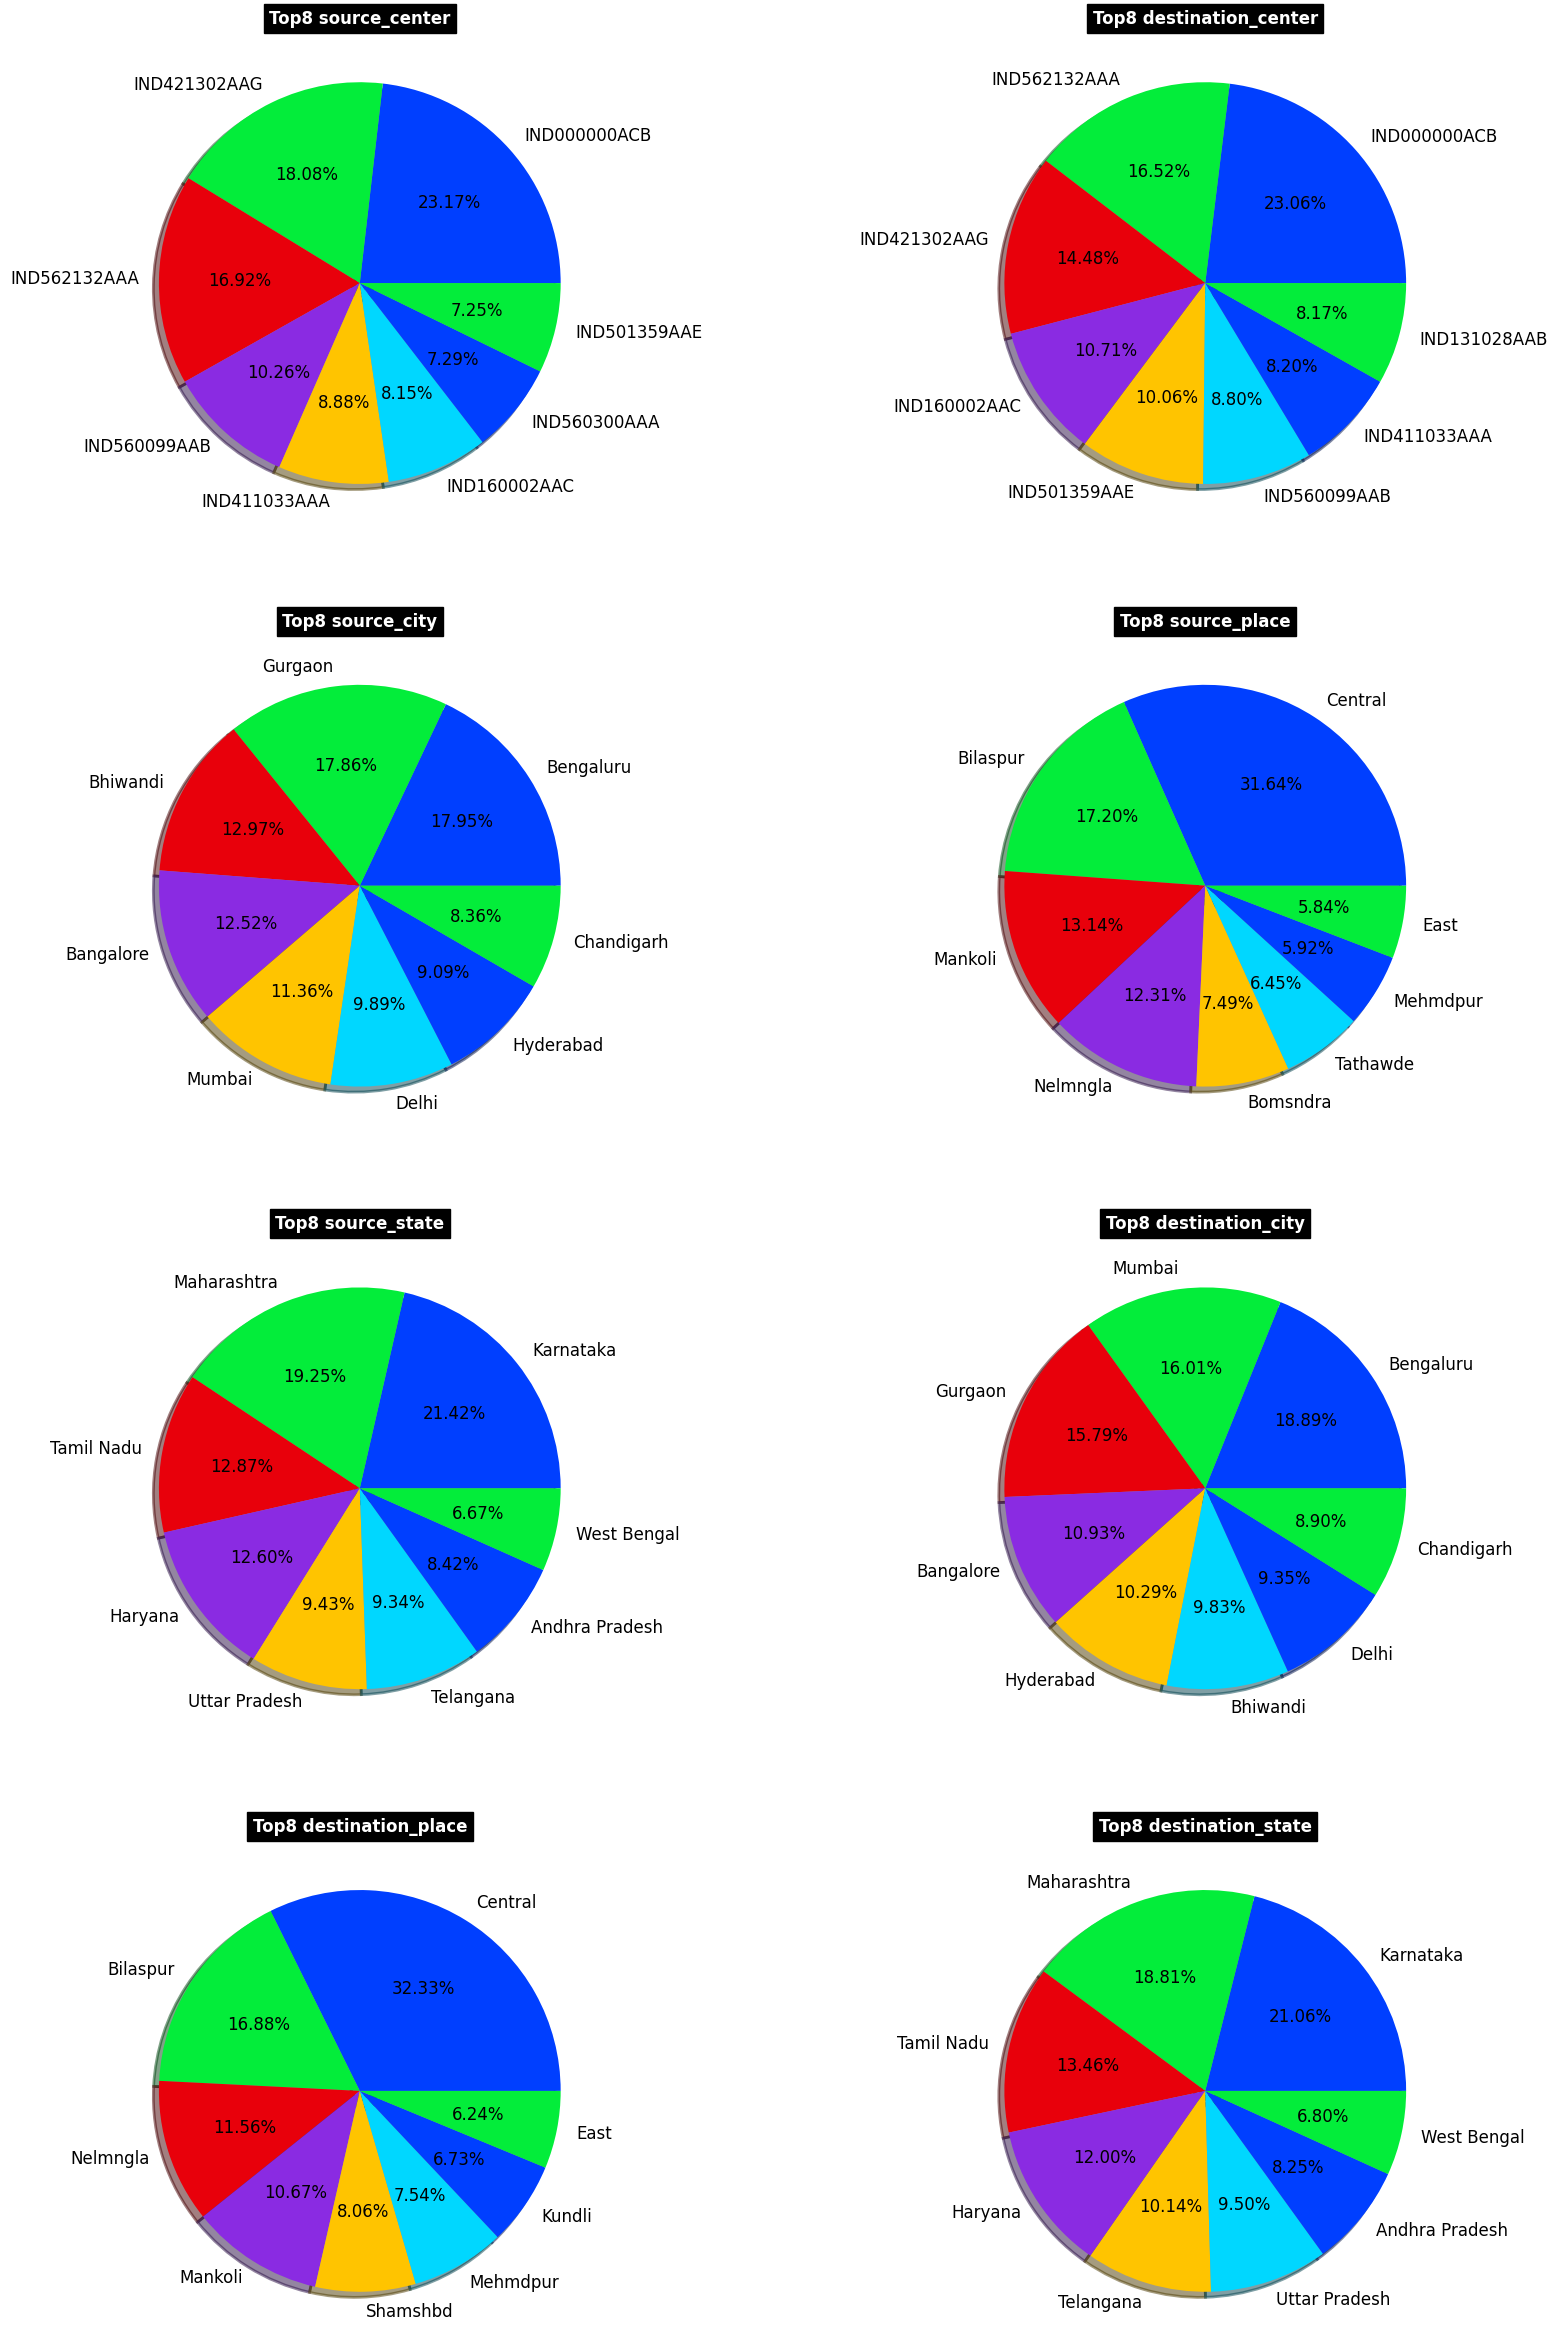

In [ ]:
plt.figure(figsize=(20,30))
for i in obj_col:
 plt.subplot(4,2,obj_col.index(i)+1)
 plt.title(f"Top8 {i}",{'weight':'bold','backgroundcolor':'black','color':'white'})
 top8_data = df[i].value_counts().head(8)
 plt.pie(top8_data,labels=top8_data.index,autopct='%.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.show

Insights:

1. **Source Center Analysis**:
   - **IND000000ACB** is the leading source center, contributing to **23.17%** of the data, followed by **IND421302AAG** with **18.08%**.

2. **Destination Center Analysis**:
   - **IND000000ACB** also ranks as the top destination center with **23.06%** of the data, followed by **IND562132AAA** with **16.52%**.

3. **Source City Insights**:
   - **Bengaluru** and **Gurgaon** dominates as the top source city, accounting for almost **18%** of trips each.

4. **Source Place Insights**:
   - **Central** emerges as the top source place, contributing to **31.64%** of trips.

5. **Source State Analysis**:
   - **Karnataka** leads as the most prominent source state with **21.42%** of trips, followed by **Maharashtra** with **19.25%**.

6. **Destination City Insights**:
   - **Bangalore** remains the top destination city, with **18.89%** of trips, followed by **Mumbai** and **Gurgaon** with almost **16%** each.

7. **Destination Place Insights**:
   - **Central** is the most common destination place, accounting for **32.33%** of trips, followed by **Bilaspur** with **16.88%**.

8. **Destination State Analysis**:
   - **Karnataka** share the top spot as the most popular destination states with **21.06%**,followed by **Maharashtra** contributing **18.81%** of trips.


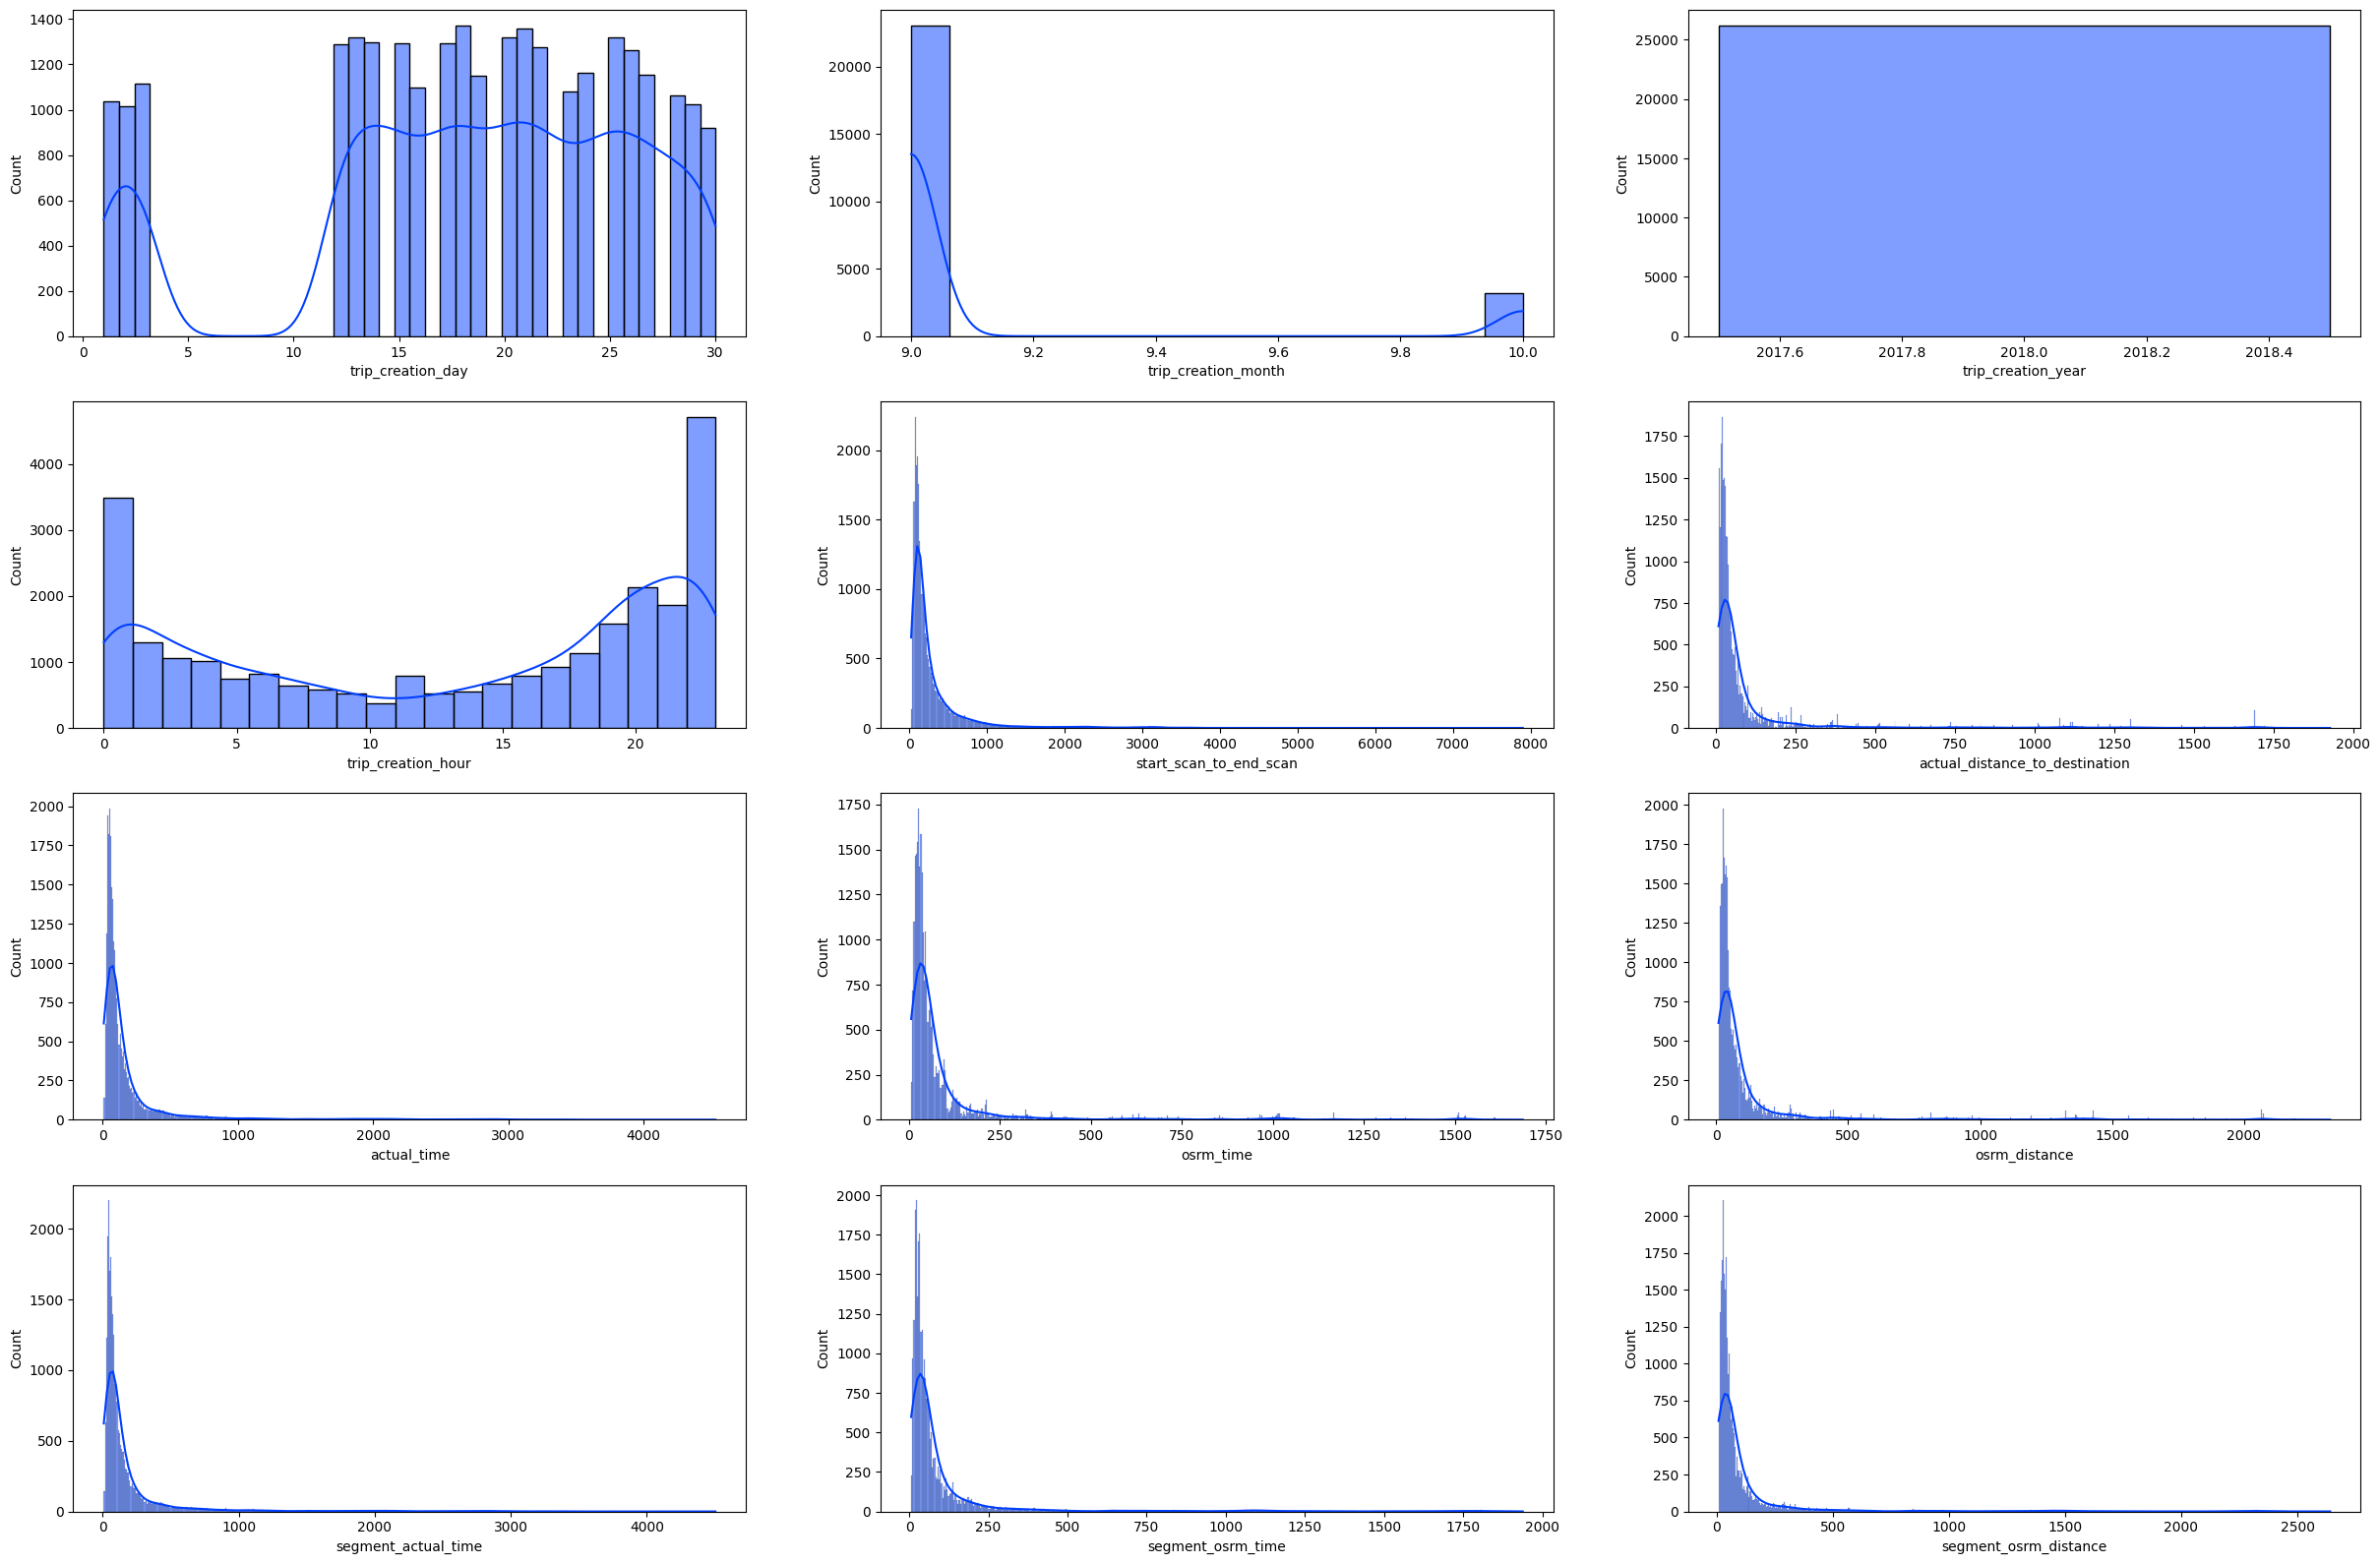

In [ ]:
plt.figure(figsize=(30,25))
count=1
for i in df.select_dtypes(include=np.number):
  plt.subplot(5,3,count)
  sns.histplot(data = df, x=i,kde=True)
  count = count+1
plt.show()

* All columns are Right-Skewed.

## *Bivariate Analysis*

In [ ]:
df.head()

trip_uuid source_center destination_center      data  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1  trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2  trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3  trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4  trip-153671043369099517  IND000000ACB       IND160002AAC  training   

  route_type         trip_creation_time  trip_creation_day  \
0        FTL 2018-09-12 00:00:16.535741                 12   
1        FTL 2018-09-12 00:00:16.535741                 12   
2    Carting 2018-09-12 00:00:22.886430                 12   
3    Carting 2018-09-12 00:00:22.886430                 12   
4        FTL 2018-09-12 00:00:33.691250                 12   

   trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                    9                2018                   0  ...   
1                    9                2018                   0  ...   
2                    9                2018                   0  ...   
3                    9                2018                   0  ...   
4                    9                2018                   0  ...   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   
3 2018-09-12 00:00:22.886430 2018-09-12 02:03:09.655591   
4 2018-09-14 03:40:17.106733 2018-09-14 17:34:55.442454   

  start_scan_to_end_scan actual_distance_to_destination actual_time osrm_time  \
0                 1260.0                     383.759164       732.0     329.0   
1                  999.0                     440.973689       830.0     388.0   
2                   58.0                      24.644021        47.0      26.0   
3                  122.0                      48.542890        96.0      42.0   
4                  834.0                     237.439610       611.0     212.0   

  osrm_distance segment_actual_time  segment_osrm_time  segment_osrm_distance  
0      446.5496               728.0              534.0               670.6205  
1      544.8027               820.0              474.0               649.8528  
2       28.1994                46.0               26.0                28.1995  
3       56.9116                95.0               39.0                55.9899  
4      281.2109               608.0              231.0               317.7408  

[5 rows x 26 columns]

In [ ]:
for i in df.columns:
  print(f"{i}",df[i].nunique())

trip_uuid 14787
source_center 1496
destination_center 1466
data 2
route_type 2
trip_creation_time 14787
trip_creation_day 22
trip_creation_month 2
trip_creation_year 1
trip_creation_hour 24
source_city 1260
source_place 1177
source_state 30
destination_city 1256
destination_place 1154
destination_state 30
od_start_time 26222
od_end_time 26222
start_scan_to_end_scan 1914
actual_distance_to_destination 26193
actual_time 1657
osrm_time 560
osrm_distance 25871
segment_actual_time 1676
segment_osrm_time 1102
segment_osrm_distance 25948


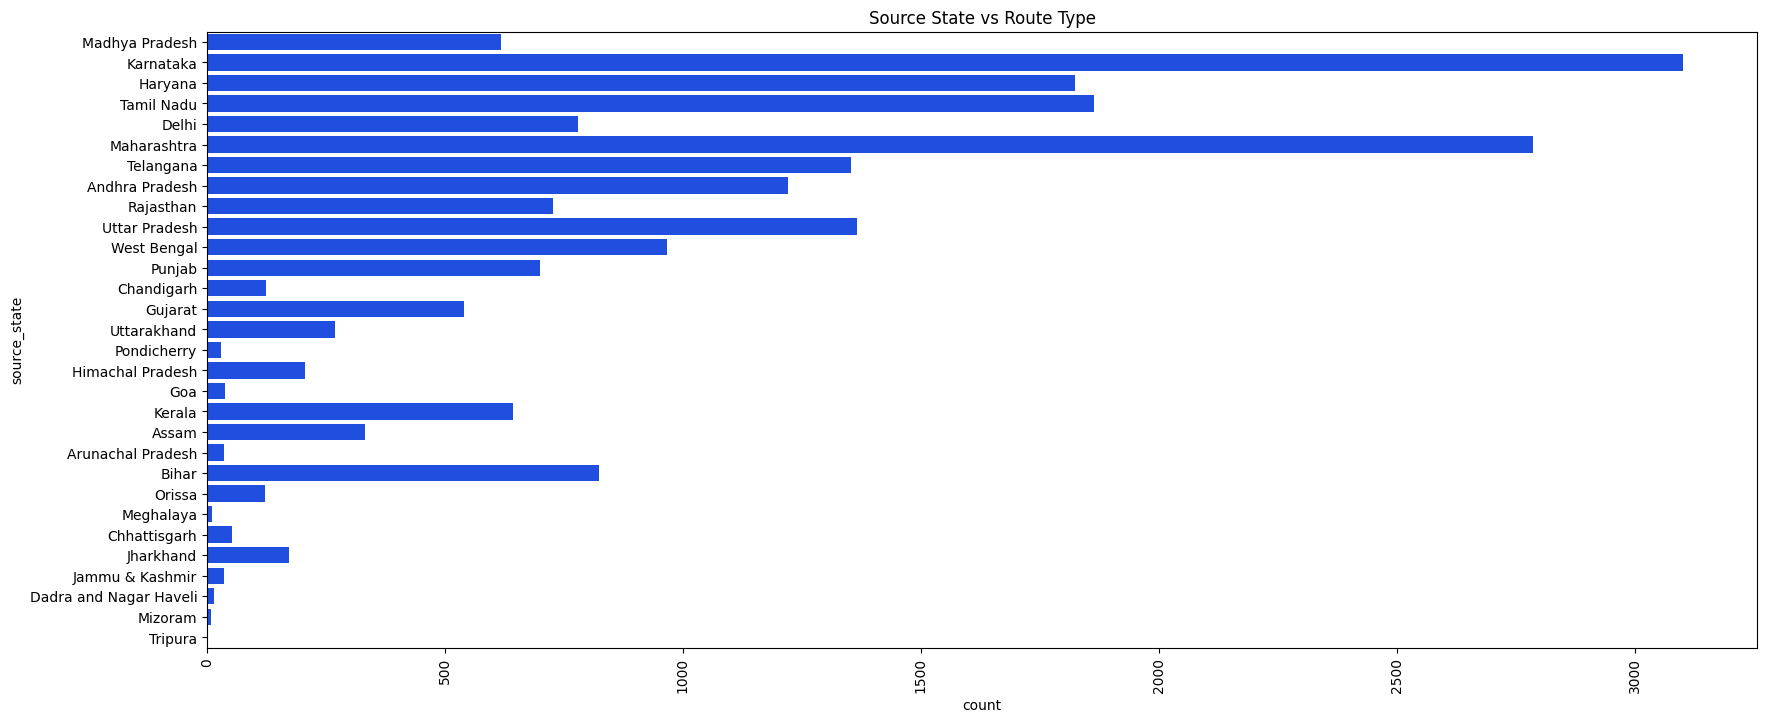

In [ ]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(20,8))
sns.countplot(data=df,y='source_state')
plt.title('Source State vs Route Type')
plt.xticks(rotation=90)
plt.show()

* Delhivery is most popular in Karnataka and Maharashtra states.

In [ ]:
df.select_dtypes(include=np.number).columns


Index(['trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'trip_creation_hour', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance'],
      dtype='object')

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']

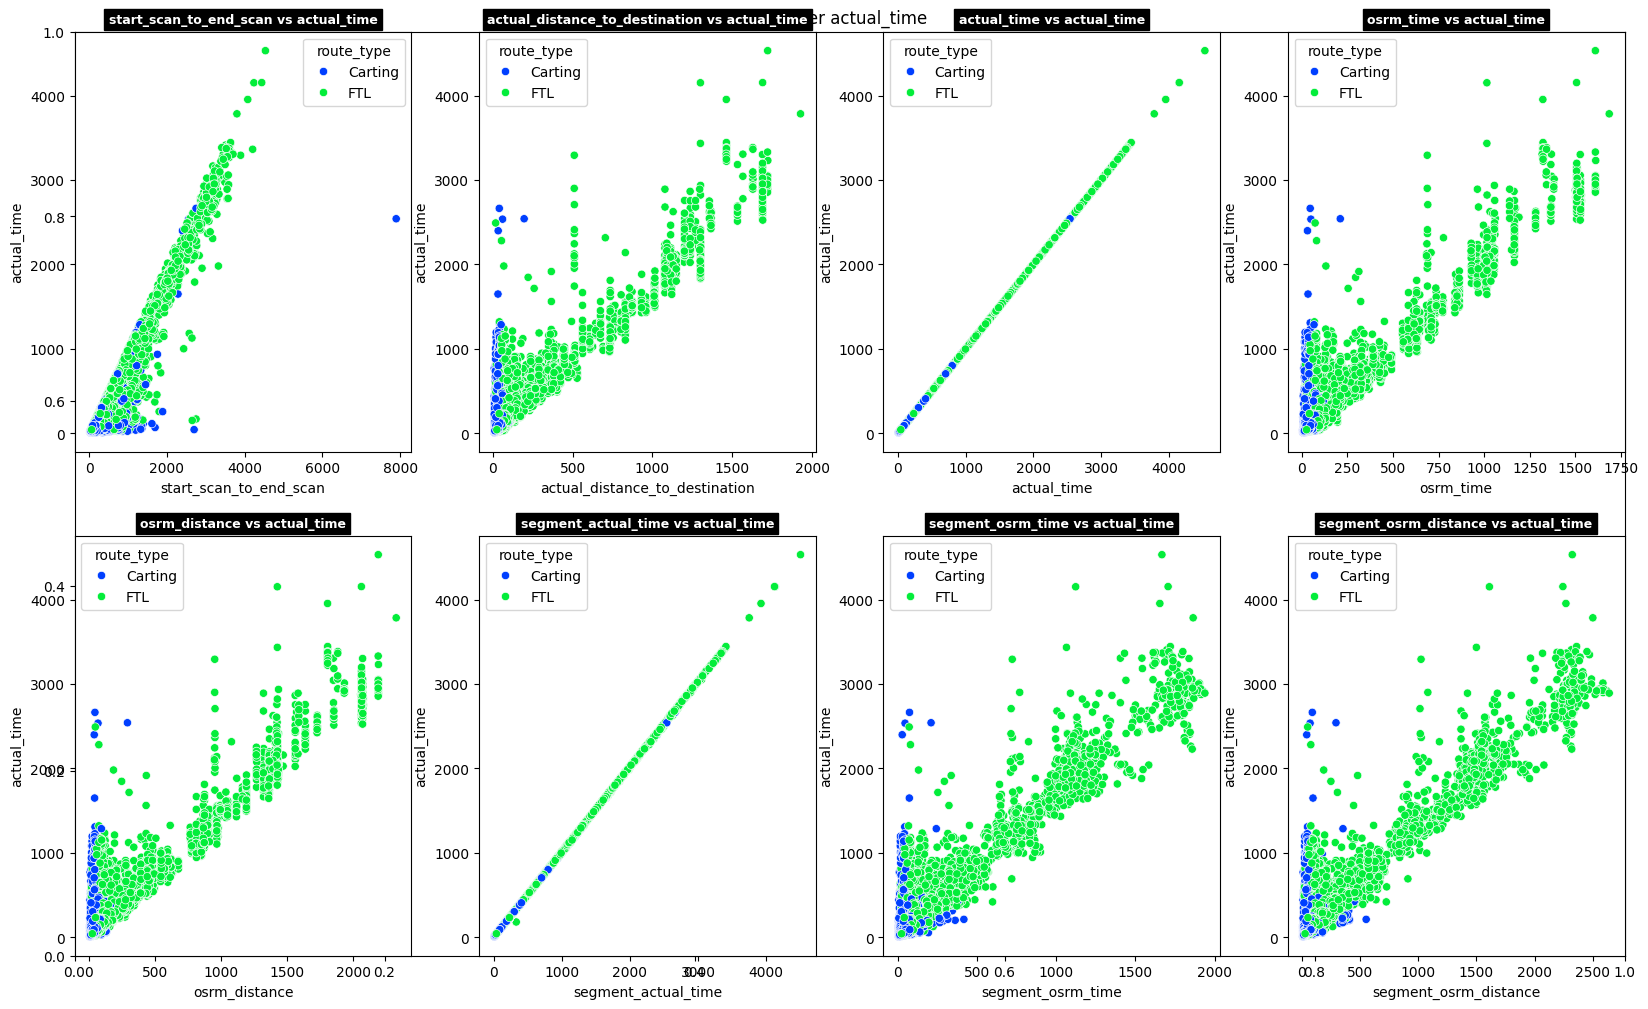

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(20,12))
plt.title('As per actual_time')
for i in num_cols:
  plt.subplot(2,4,num_cols.index(i)+1)
  sns.scatterplot(data=df,x=i,y='actual_time',hue='route_type')
  plt.title(f'{i} vs actual_time',{'backgroundcolor':'black','color':'white','fontsize':9,'weight':'bold'})
plt.show()

* All products are delivered lessthan the estimated Time taken to deliver the product.
* As the distance increases the delivery time increases proportionally.
* Actual delivered time meets almost Calculated time from a short path.

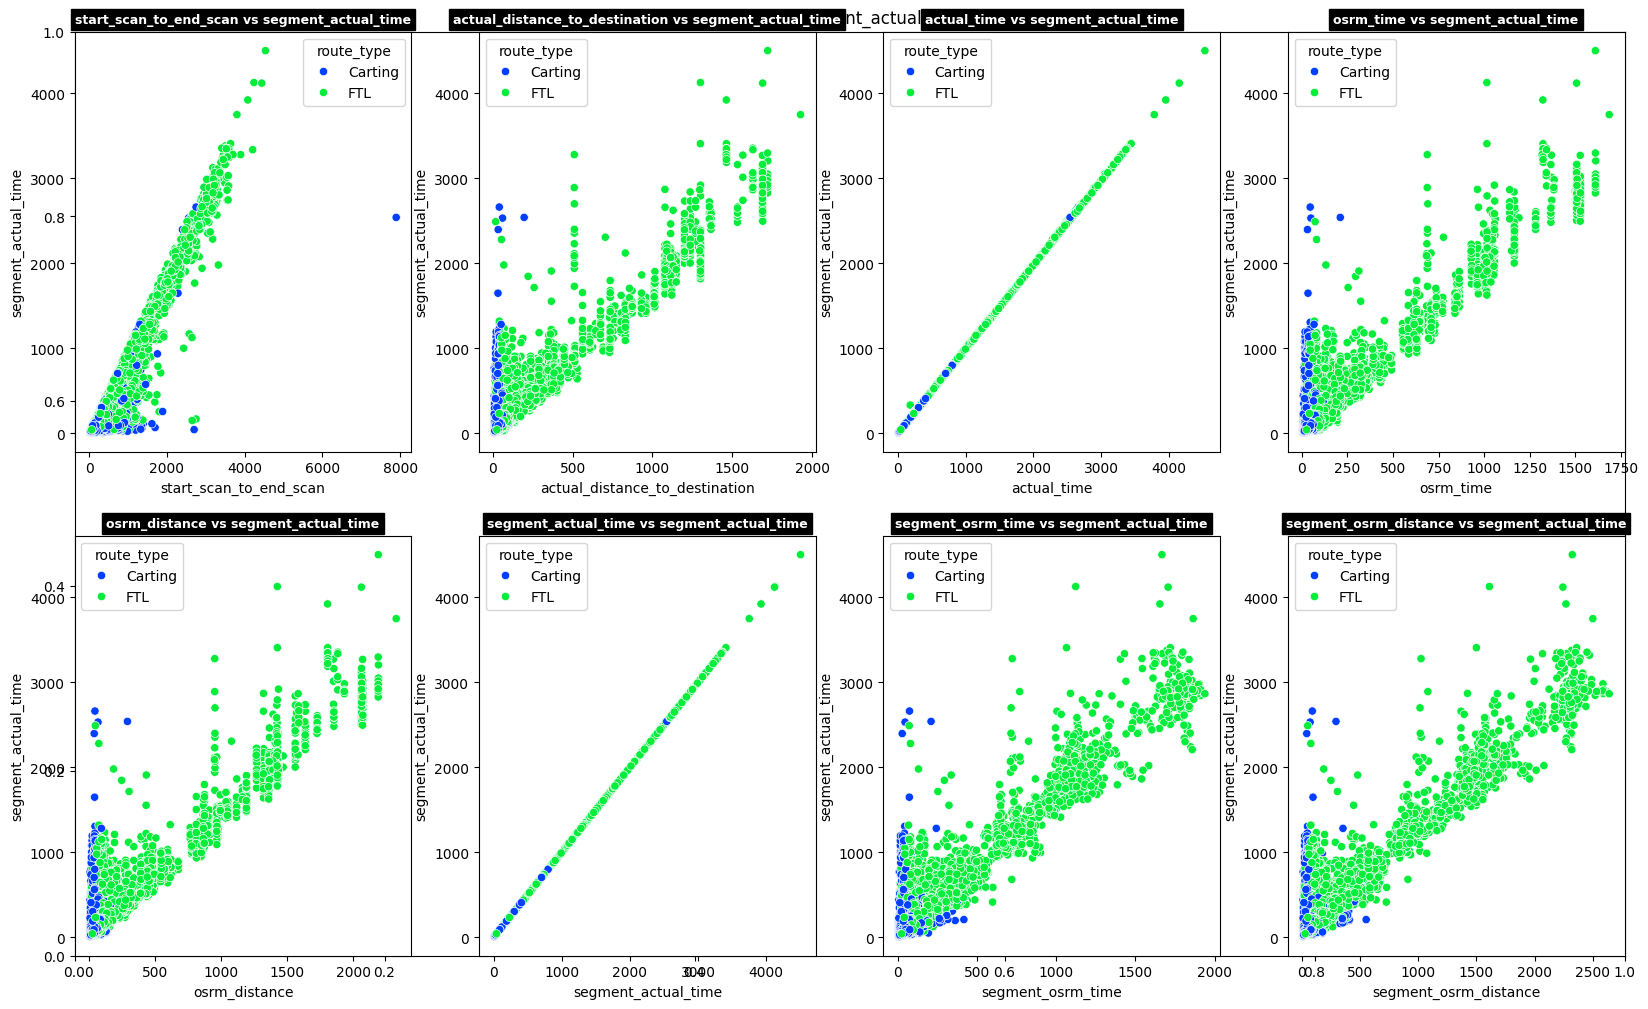

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(20,12))
plt.title('As per segment_actual_time')
for i in num_cols:
  plt.subplot(2,4,num_cols.index(i)+1)
  sns.scatterplot(data=df,x=i,y='segment_actual_time',hue='route_type')
  plt.title(f'{i} vs segment_actual_time',{'backgroundcolor':'black','color':'white','fontsize':9,'weight':'bold'})
plt.show()

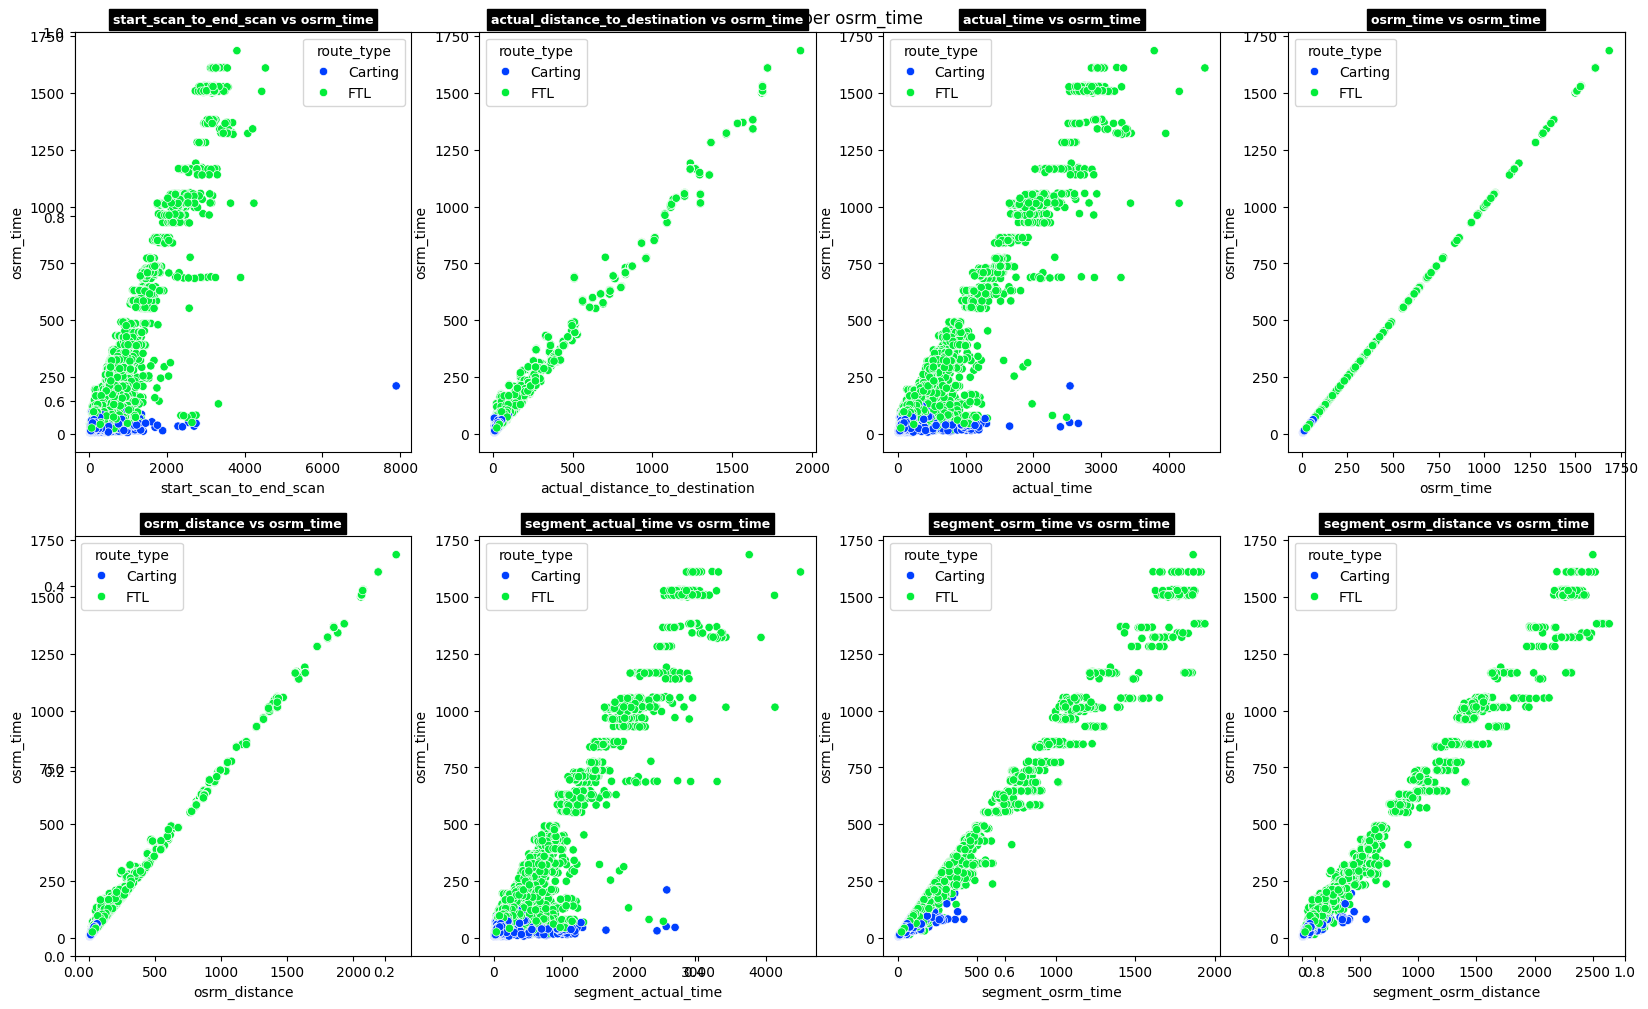

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(20,12))
plt.title('As per osrm_time')
for i in num_cols:
  plt.subplot(2,4,num_cols.index(i)+1)
  sns.scatterplot(data=df,x=i,y='osrm_time',hue='route_type')
  plt.title(f'{i} vs osrm_time',{'backgroundcolor':'black','color':'white','fontsize':9,'weight':'bold'})
plt.show()

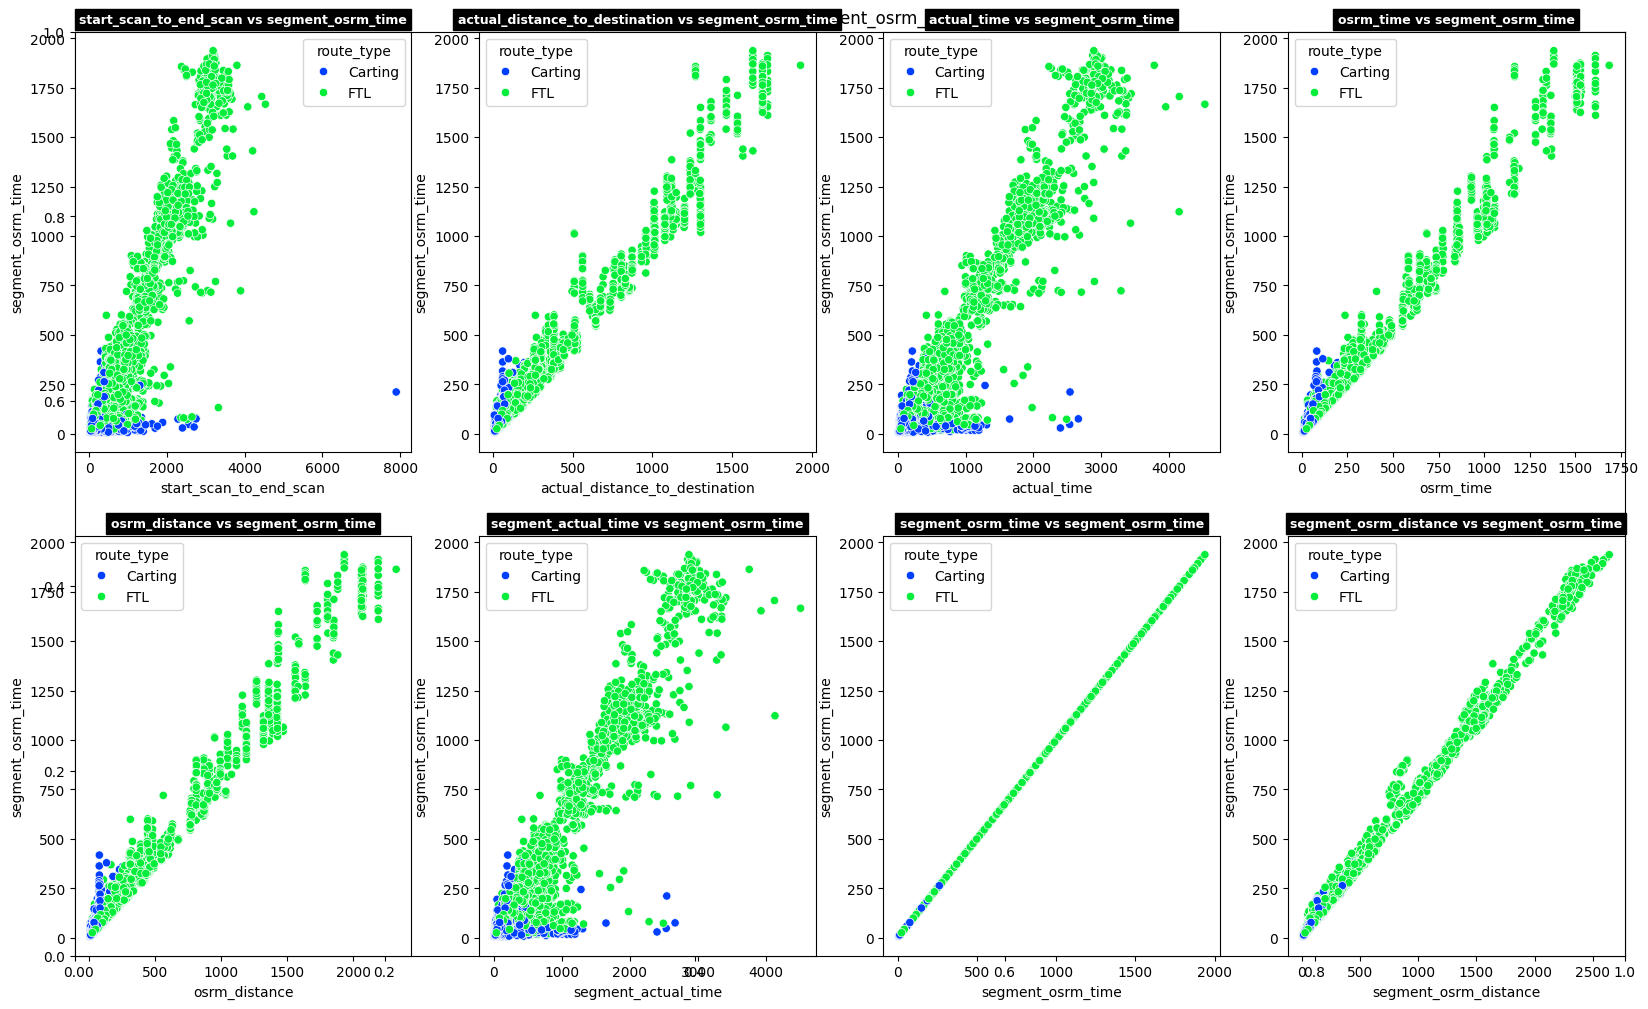

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(20,12))
plt.title('As per segment_osrm_time')
for i in num_cols:
  plt.subplot(2,4,num_cols.index(i)+1)
  sns.scatterplot(data=df,x=i,y='segment_osrm_time',hue='route_type')
  plt.title(f'{i} vs segment_osrm_time',{'backgroundcolor':'black','color':'white','fontsize':9,'weight':'bold'})
plt.show()

In [ ]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'destination_center', 'od_start_time',
       'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_city', 'source_place', 'source_state',
       'destination_city', 'destination_place', 'destination_state',
       'trip_creation_day', 'trip_creation_month', 'trip_creation_year',
       'trip_creation_hour', 'od_total_time(mins)'],
      dtype='object')

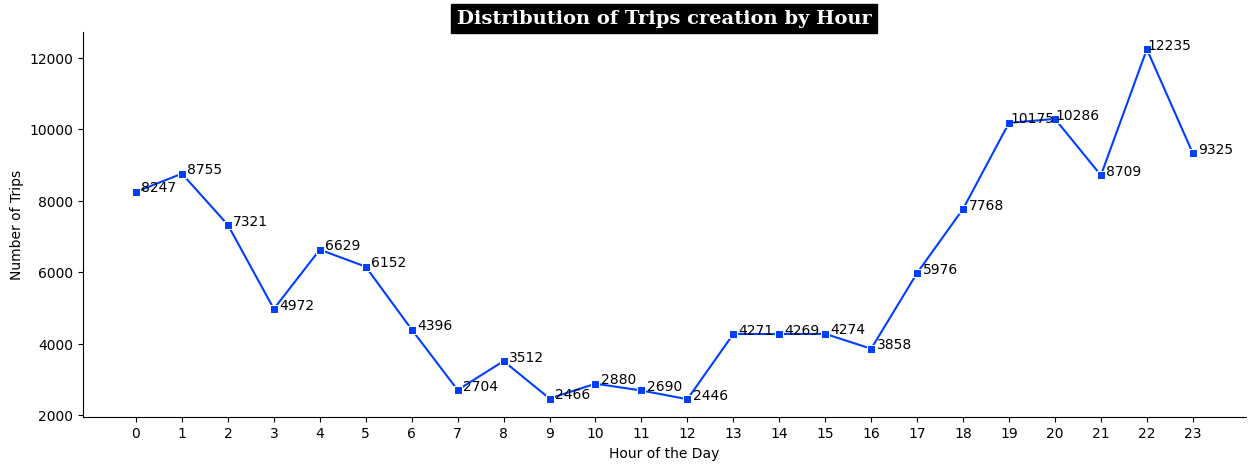

In [ ]:
trip_creation_by_hour = data.groupby(by='trip_creation_hour')['trip_uuid'].count().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=trip_creation_by_hour, x='trip_creation_hour', y='trip_uuid', marker='s')
plt.xticks(np.arange(0, 24))

for i, count in enumerate(trip_creation_by_hour['trip_uuid']):
    plt.text(trip_creation_by_hour['trip_creation_hour'][i]+0.5, count, count, ha='center')

plt.title('Distribution of Trips creation by Hour',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

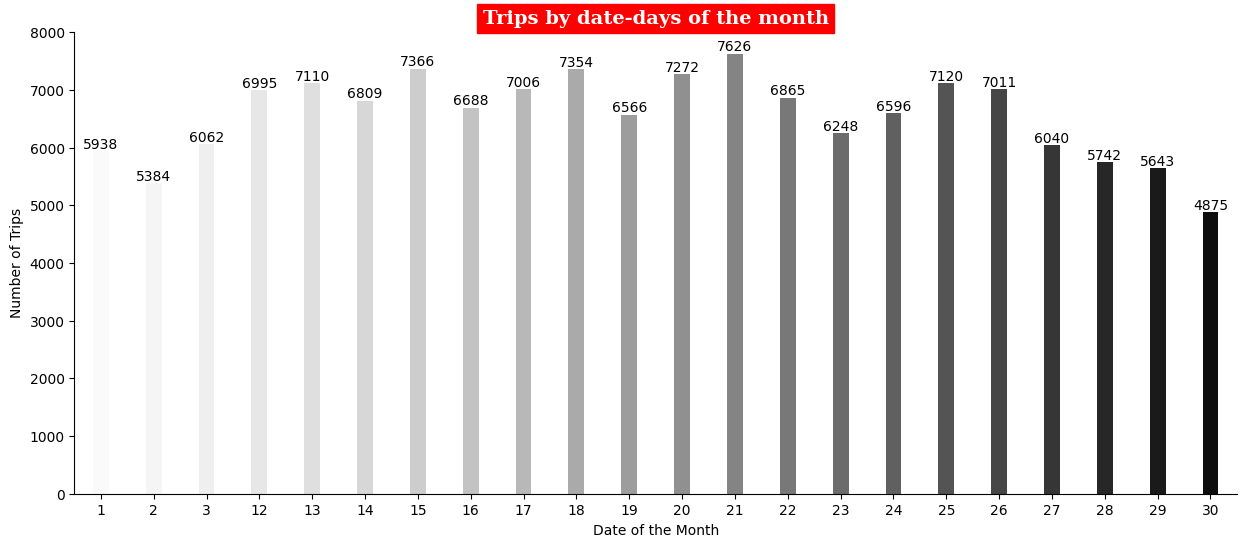

In [ ]:
trips_by_dateday = data.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()

plt.figure(figsize = (15, 6))
sns.barplot(data =data,x = trips_by_dateday['trip_creation_day'],y = trips_by_dateday['trip_uuid'], palette='Greys',width=0.3)
for i, count in enumerate(trips_by_dateday['trip_uuid']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Trips by date-days of the month',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')
sns.despine()
plt.show()

Check for Outliers

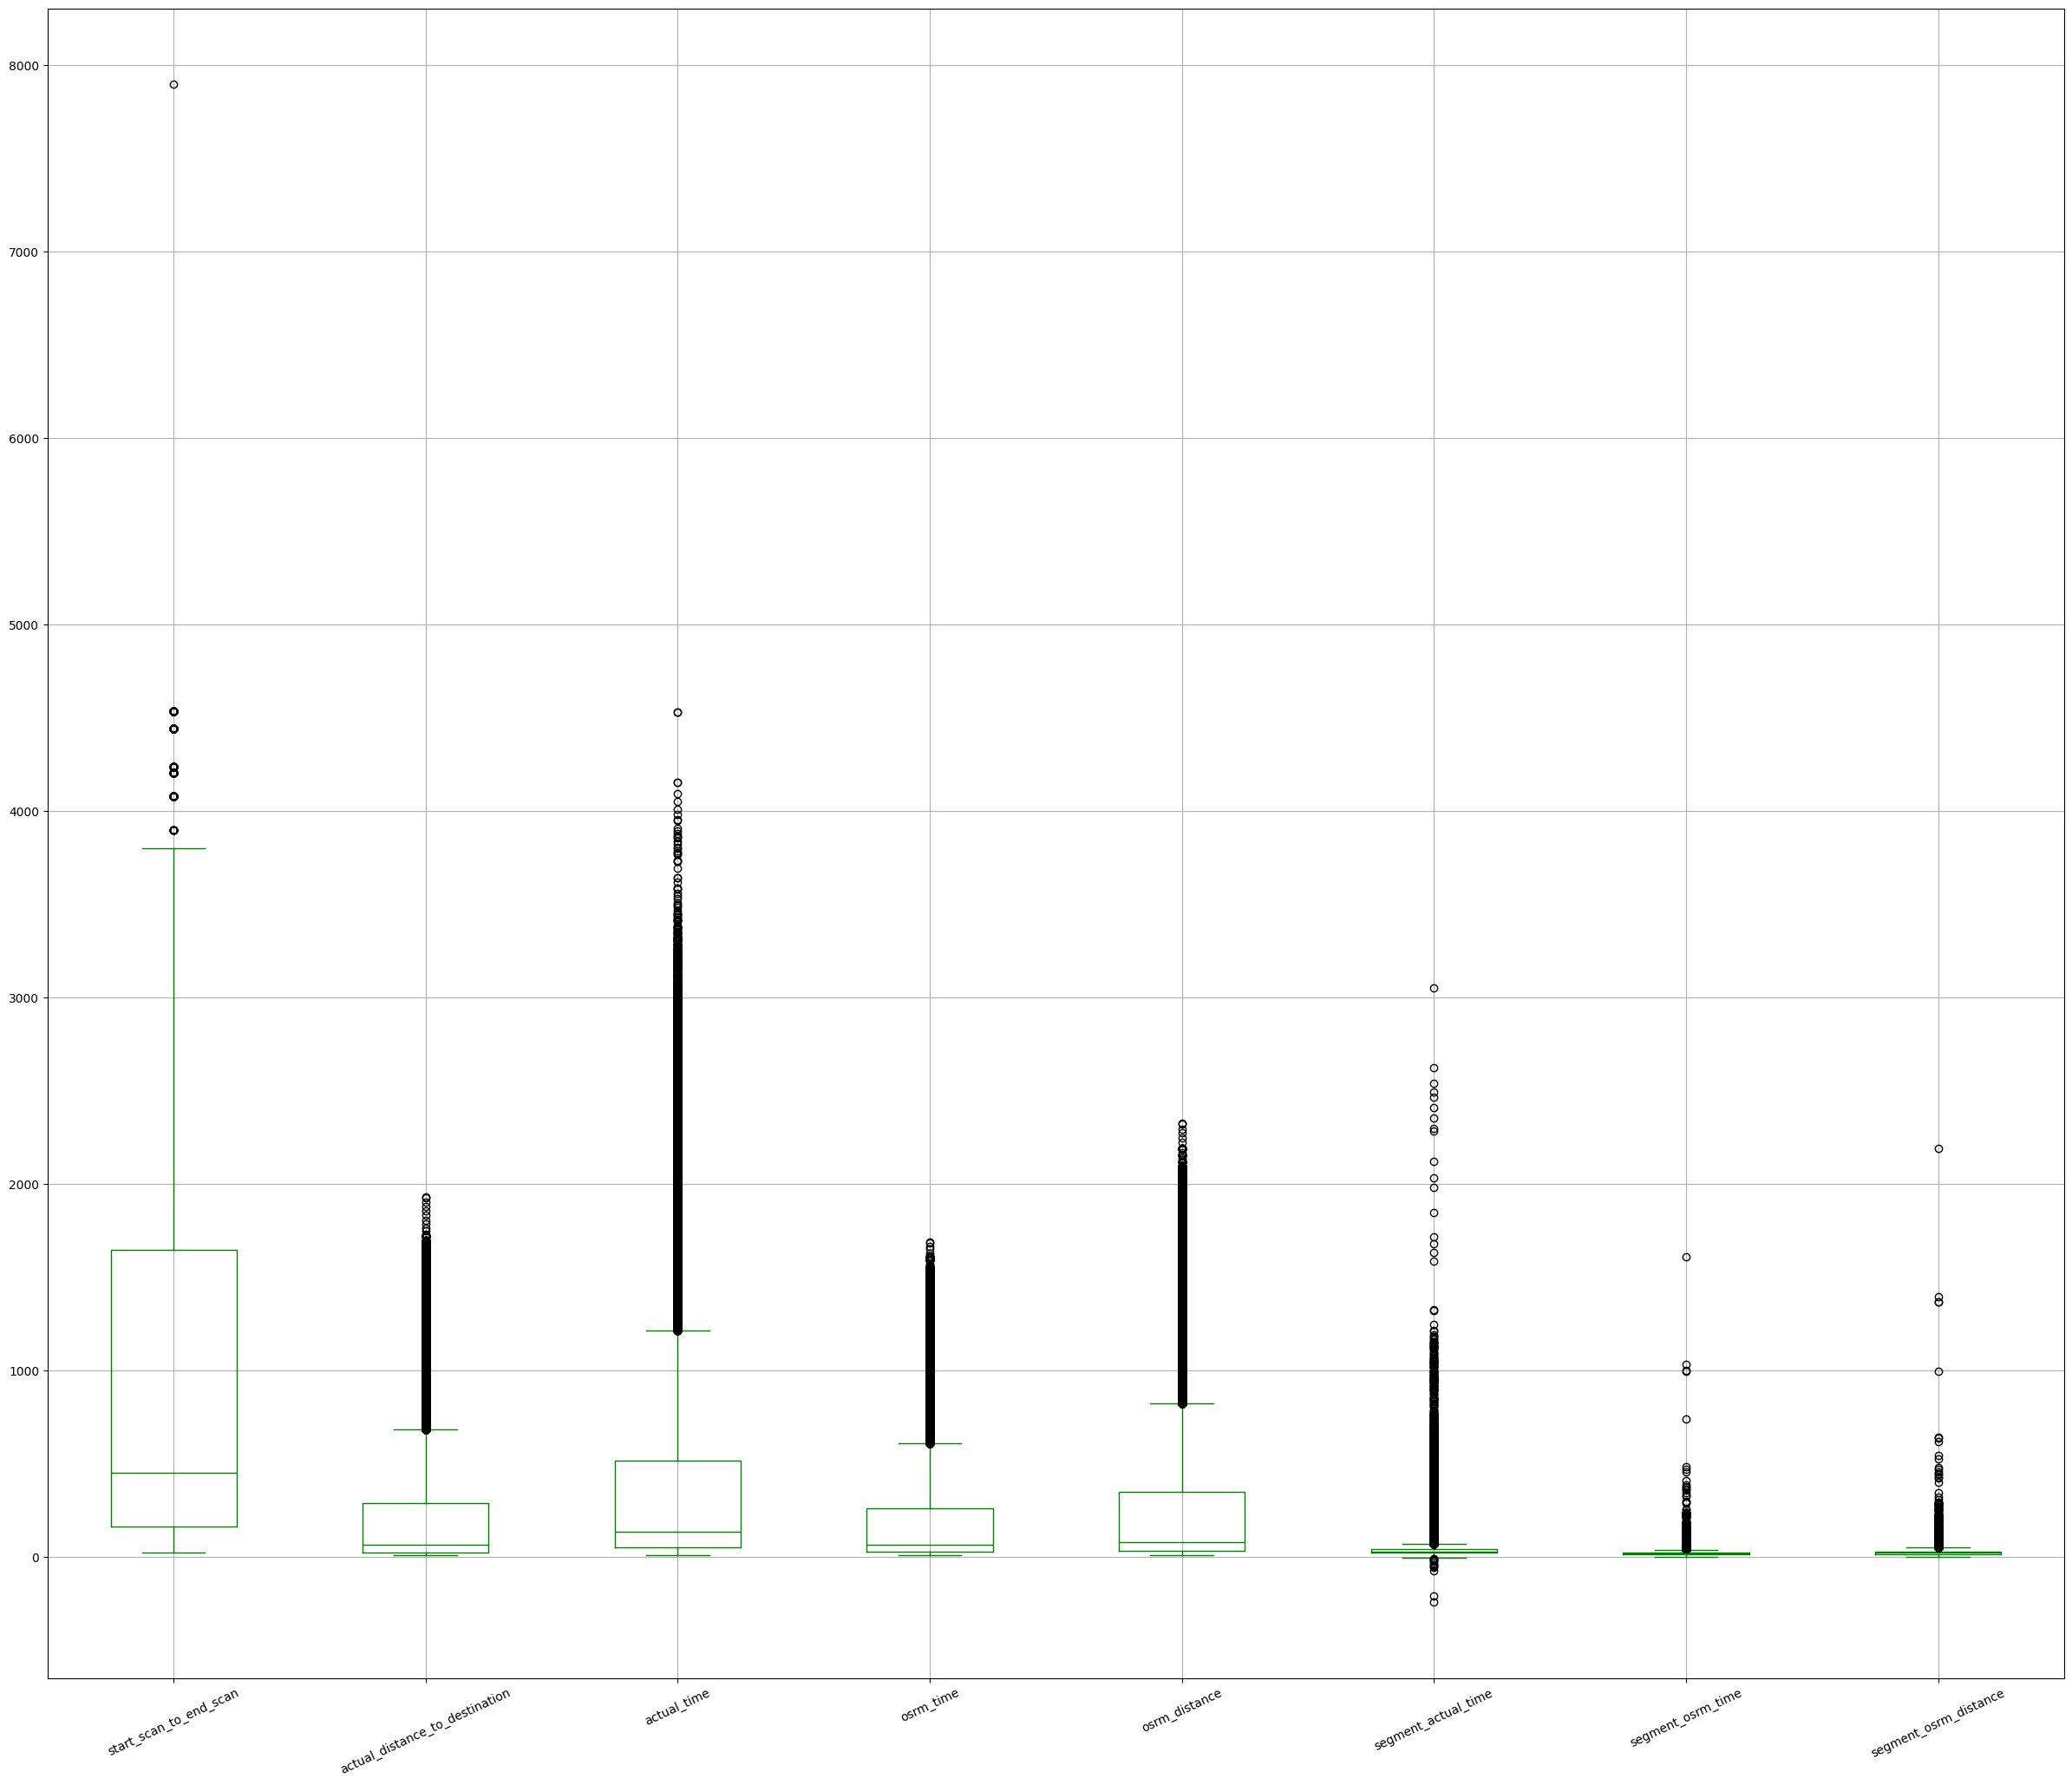

In [ ]:
num_cols=['start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(30, 25))
data[num_cols].boxplot(rot=25, figsize=(35,20), color = 'g')
plt.grid('off')
plt.show()

Outlier Treatment.

start_scan_to_end_scan
0                      1260.0
1                       999.0
2                        58.0
3                       122.0
4                       834.0
...                       ...
26217                    62.0
26218                    91.0
26219                    44.0
26220                   287.0
26221                    66.0

[26222 rows x 1 columns]

Clipped data of start_scan_to_end_scan


start_scan_to_end_scan
0                       632.5
1                       632.5
2                        58.0
3                       122.0
4                       632.5
...                       ...
26217                    62.0
26218                    91.0
26219                    44.0
26220                   287.0
26221                    66.0

[26222 rows x 1 columns]


Filtered data of start_scan_to_end_scan


start_scan_to_end_scan
0                      1260.0
1                       999.0
2                        58.0
3                       122.0
4                       834.0
...                       ...
26217                    62.0
26218                    91.0
26219                    44.0
26220                   287.0
26221                    66.0

[26222 rows x 1 columns]

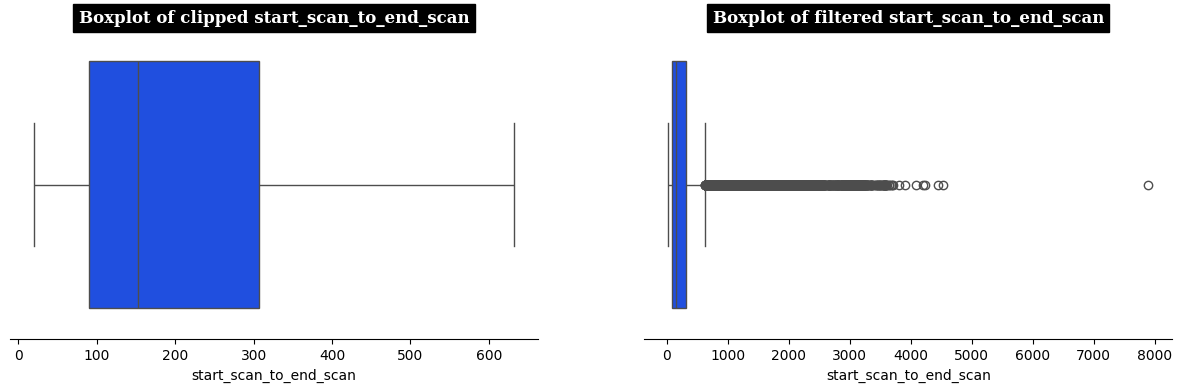

actual_distance_to_destination
0                          383.759164
1                          440.973689
2                           24.644021
3                           48.542890
4                          237.439610
...                               ...
26217                       33.627182
26218                       33.673835
26219                       12.661945
26220                       40.546740
26221                       25.534793

[26222 rows x 1 columns]

Clipped data of actual_distance_to_destination


actual_distance_to_destination
0                          131.412259
1                          131.412259
2                           24.644021
3                           48.542890
4                          131.412259
...                               ...
26217                       33.627182
26218                       33.673835
26219                       12.661945
26220                       40.546740
26221                       25.534793

[26222 rows x 1 columns]


Filtered data of actual_distance_to_destination


actual_distance_to_destination
0                          383.759164
1                          440.973689
2                           24.644021
3                           48.542890
4                          237.439610
...                               ...
26217                       33.627182
26218                       33.673835
26219                       12.661945
26220                       40.546740
26221                       25.534793

[26222 rows x 1 columns]

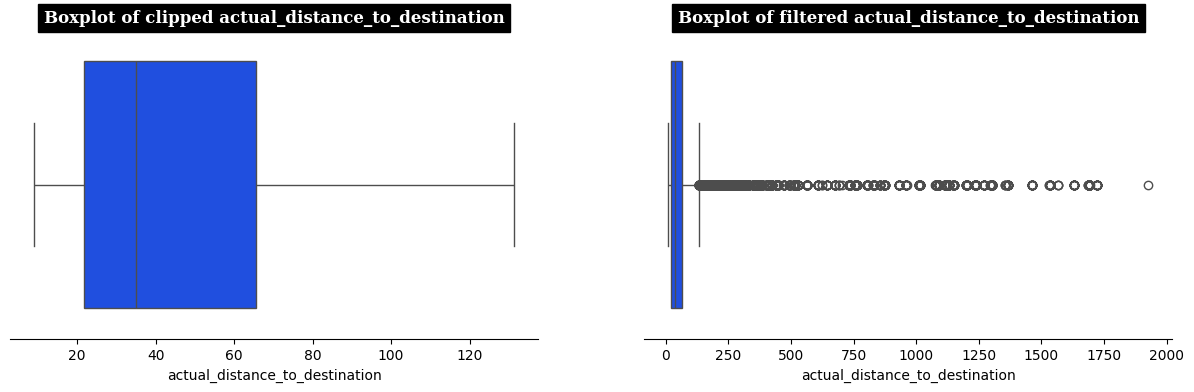

actual_time
0            732.0
1            830.0
2             47.0
3             96.0
4            611.0
...            ...
26217         51.0
26218         90.0
26219         30.0
26220        233.0
26221         42.0

[26222 rows x 1 columns]

Clipped data of actual_time


actual_time
0            341.0
1            341.0
2             47.0
3             96.0
4            341.0
...            ...
26217         51.0
26218         90.0
26219         30.0
26220        233.0
26221         42.0

[26222 rows x 1 columns]


Filtered data of actual_time


actual_time
0            732.0
1            830.0
2             47.0
3             96.0
4            611.0
...            ...
26217         51.0
26218         90.0
26219         30.0
26220        233.0
26221         42.0

[26222 rows x 1 columns]

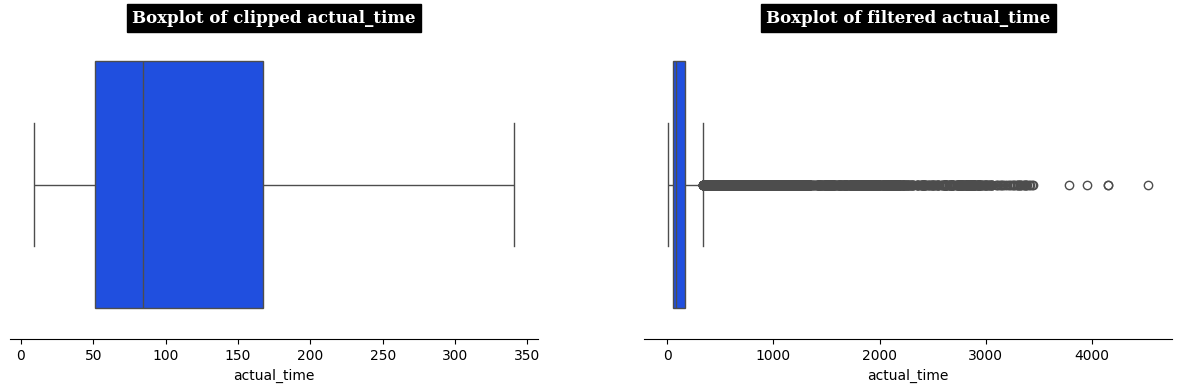

osrm_time
0          329.0
1          388.0
2           26.0
3           42.0
4          212.0
...          ...
26217       41.0
26218       48.0
26219       14.0
26220       42.0
26221       26.0

[26222 rows x 1 columns]

Clipped data of osrm_time


osrm_time
0          142.5
1          142.5
2           26.0
3           42.0
4          142.5
...          ...
26217       41.0
26218       48.0
26219       14.0
26220       42.0
26221       26.0

[26222 rows x 1 columns]


Filtered data of osrm_time


osrm_time
0          329.0
1          388.0
2           26.0
3           42.0
4          212.0
...          ...
26217       41.0
26218       48.0
26219       14.0
26220       42.0
26221       26.0

[26222 rows x 1 columns]

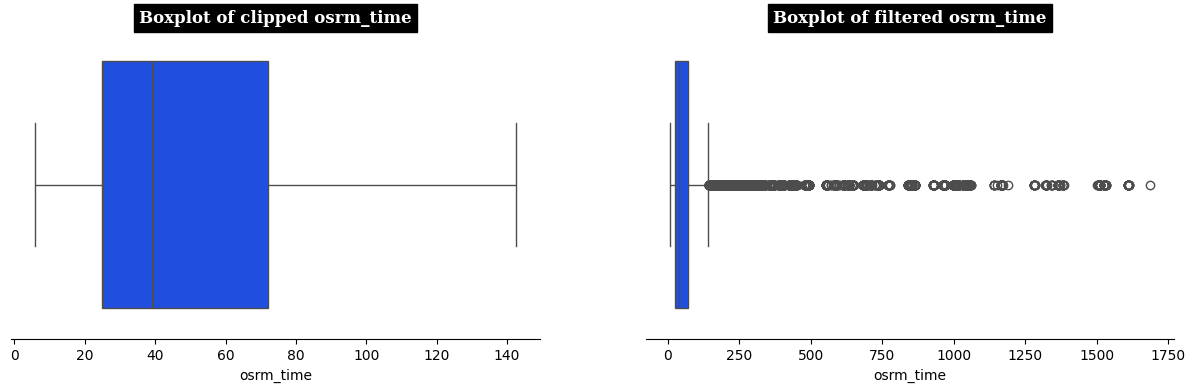

osrm_distance
0           446.5496
1           544.8027
2            28.1994
3            56.9116
4           281.2109
...              ...
26217        42.5213
26218        40.6080
26219        16.0185
26220        52.5303
26221        28.0484

[26222 rows x 1 columns]

Clipped data of osrm_distance


osrm_distance
0          172.03115
1          172.03115
2           28.19940
3           56.91160
4          172.03115
...              ...
26217       42.52130
26218       40.60800
26219       16.01850
26220       52.53030
26221       28.04840

[26222 rows x 1 columns]


Filtered data of osrm_distance


osrm_distance
0           446.5496
1           544.8027
2            28.1994
3            56.9116
4           281.2109
...              ...
26217        42.5213
26218        40.6080
26219        16.0185
26220        52.5303
26221        28.0484

[26222 rows x 1 columns]

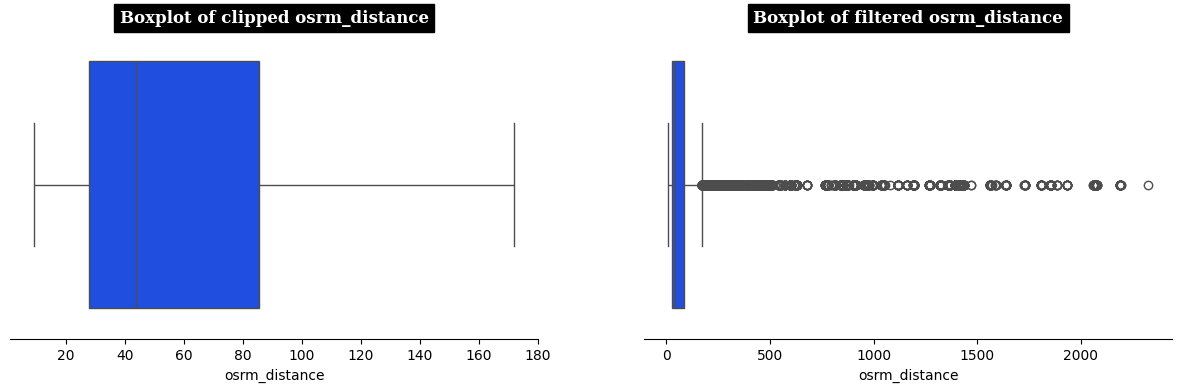

segment_actual_time
0                    728.0
1                    820.0
2                     46.0
3                     95.0
4                    608.0
...                    ...
26217                 49.0
26218                 89.0
26219                 29.0
26220                233.0
26221                 41.0

[26222 rows x 1 columns]

Clipped data of segment_actual_time


segment_actual_time
0                    340.0
1                    340.0
2                     46.0
3                     95.0
4                    340.0
...                    ...
26217                 49.0
26218                 89.0
26219                 29.0
26220                233.0
26221                 41.0

[26222 rows x 1 columns]


Filtered data of segment_actual_time


segment_actual_time
0                    728.0
1                    820.0
2                     46.0
3                     95.0
4                    608.0
...                    ...
26217                 49.0
26218                 89.0
26219                 29.0
26220                233.0
26221                 41.0

[26222 rows x 1 columns]

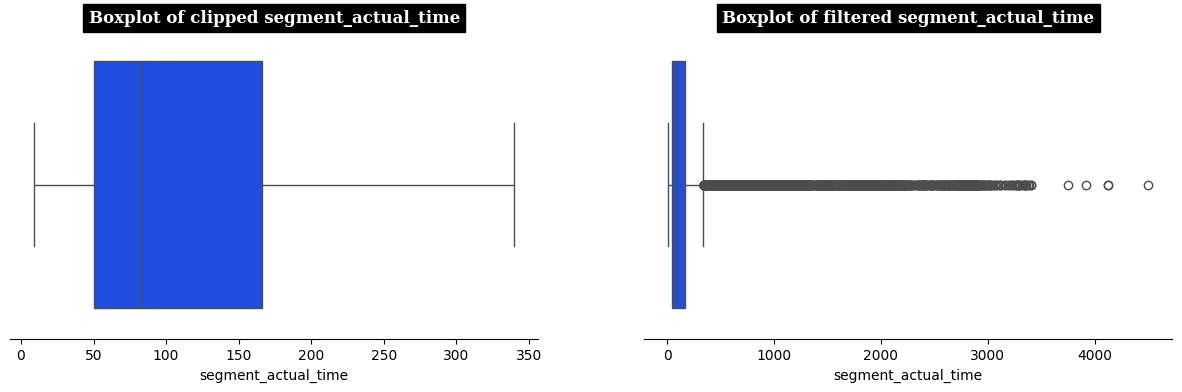

segment_osrm_time
0                  534.0
1                  474.0
2                   26.0
3                   39.0
4                  231.0
...                  ...
26217               42.0
26218               77.0
26219               14.0
26220               42.0
26221               25.0

[26222 rows x 1 columns]

Clipped data of segment_osrm_time


segment_osrm_time
0                  160.0
1                  160.0
2                   26.0
3                   39.0
4                  160.0
...                  ...
26217               42.0
26218               77.0
26219               14.0
26220               42.0
26221               25.0

[26222 rows x 1 columns]


Filtered data of segment_osrm_time


segment_osrm_time
0                  534.0
1                  474.0
2                   26.0
3                   39.0
4                  231.0
...                  ...
26217               42.0
26218               77.0
26219               14.0
26220               42.0
26221               25.0

[26222 rows x 1 columns]

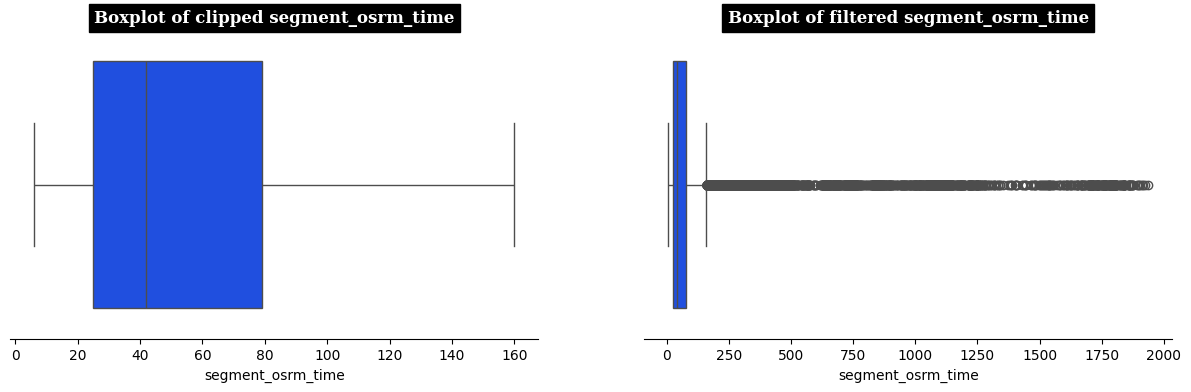

segment_osrm_distance
0                   670.6205
1                   649.8528
2                    28.1995
3                    55.9899
4                   317.7408
...                      ...
26217                42.1431
26218                78.5869
26219                16.0184
26220                52.5303
26221                28.0484

[26222 rows x 1 columns]

Clipped data of segment_osrm_distance


segment_osrm_distance
0                 184.915287
1                 184.915287
2                  28.199500
3                  55.989900
4                 184.915287
...                      ...
26217              42.143100
26218              78.586900
26219              16.018400
26220              52.530300
26221              28.048400

[26222 rows x 1 columns]


Filtered data of segment_osrm_distance


segment_osrm_distance
0                   670.6205
1                   649.8528
2                    28.1995
3                    55.9899
4                   317.7408
...                      ...
26217                42.1431
26218                78.5869
26219                16.0184
26220                52.5303
26221                28.0484

[26222 rows x 1 columns]

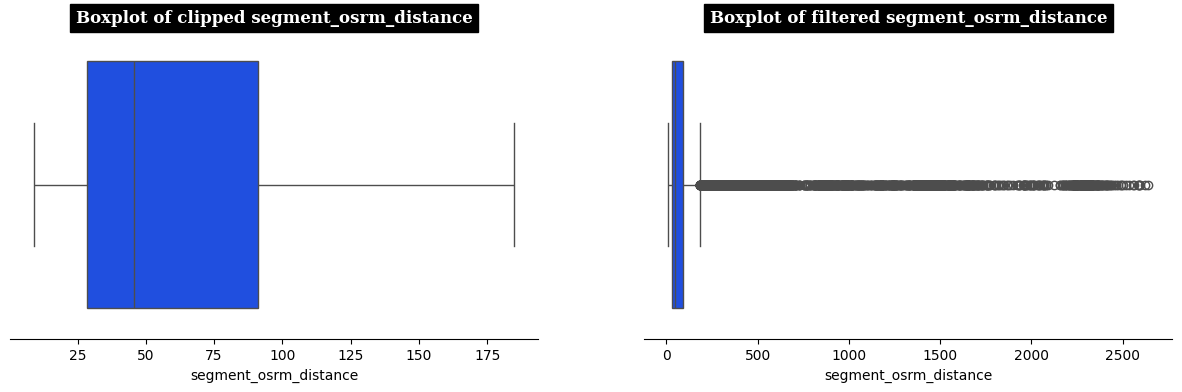

In [ ]:
for i, col in enumerate(df[num_cols]):

    data = df[col]
    display(data.to_frame())


    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    clipped_data = np.clip(data, lower_bound, upper_bound)
    print(f'Clipped data of {col}')
    display(clipped_data.to_frame())
    print()

    # Plot boxplot of the clipped data
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    sns.boxplot(x=clipped_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor='black', color='w')

    filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
    print(f'Filtered data of {col}')
    display(filtered_data.to_frame())
    print()

    plt.subplot(122)
    sns.boxplot(x=filtered_data)
    sns.despine(left=True)
    plt.yticks([])
    plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, backgroundcolor='black', color='w')

    plt.show()

In [ ]:
for i, col in enumerate(df[num_cols]):
    print(f'{i},{col}')

0,start_scan_to_end_scan
1,actual_distance_to_destination
2,actual_time
3,osrm_time
4,osrm_distance
5,segment_actual_time
6,segment_osrm_time
7,segment_osrm_distance


* Here we see that the data after removing outliers has outliers. It has to be understood that q1 and q3 dont have to be always 25th percentile and 75th percentile. Try changing q1 and q3 to 10th percentile to 90th percentile and plot and see...
* Clipped data replaces the outlier values with specified values.
* Here, I have proceeded with both clipped and filtered data(with reduced outliers) for further analysis.

## *MultiVariate Analysis*

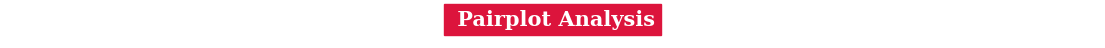

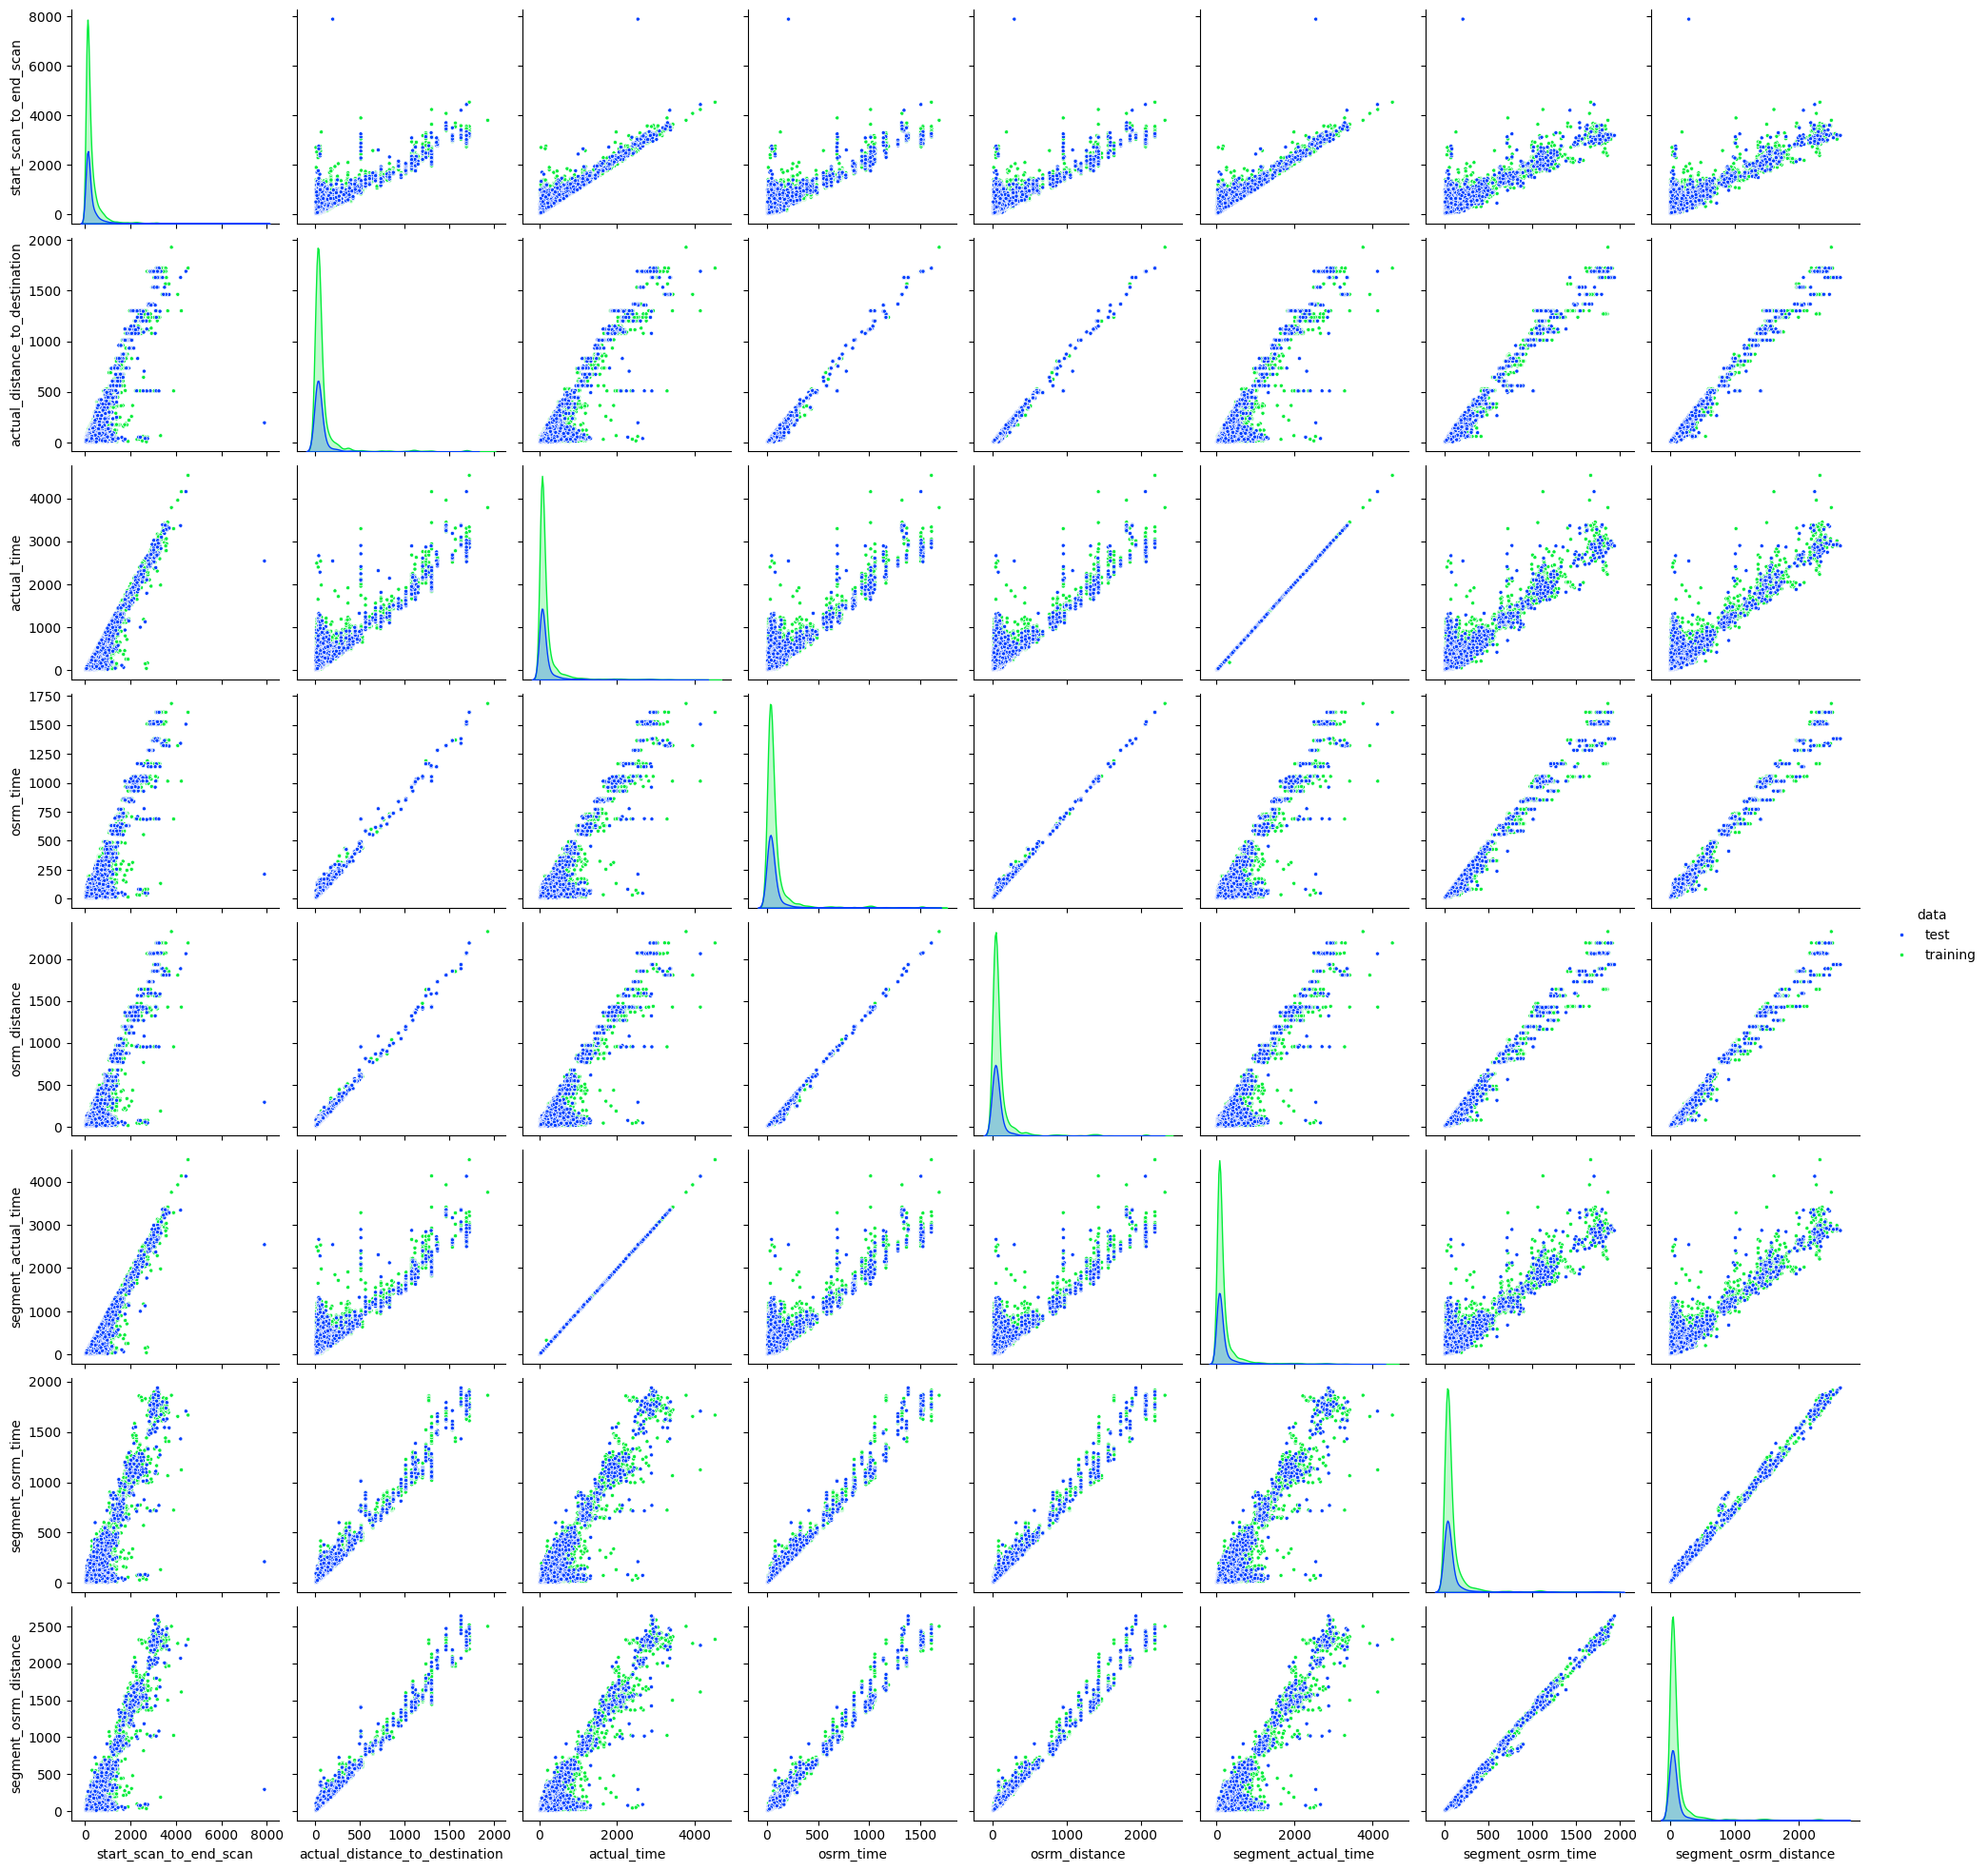

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='crimson',color='w')
sns.pairplot(data = df,vars = num_cols,hue='data',markers = '.')
plt.show()

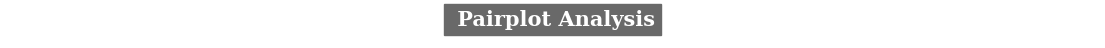

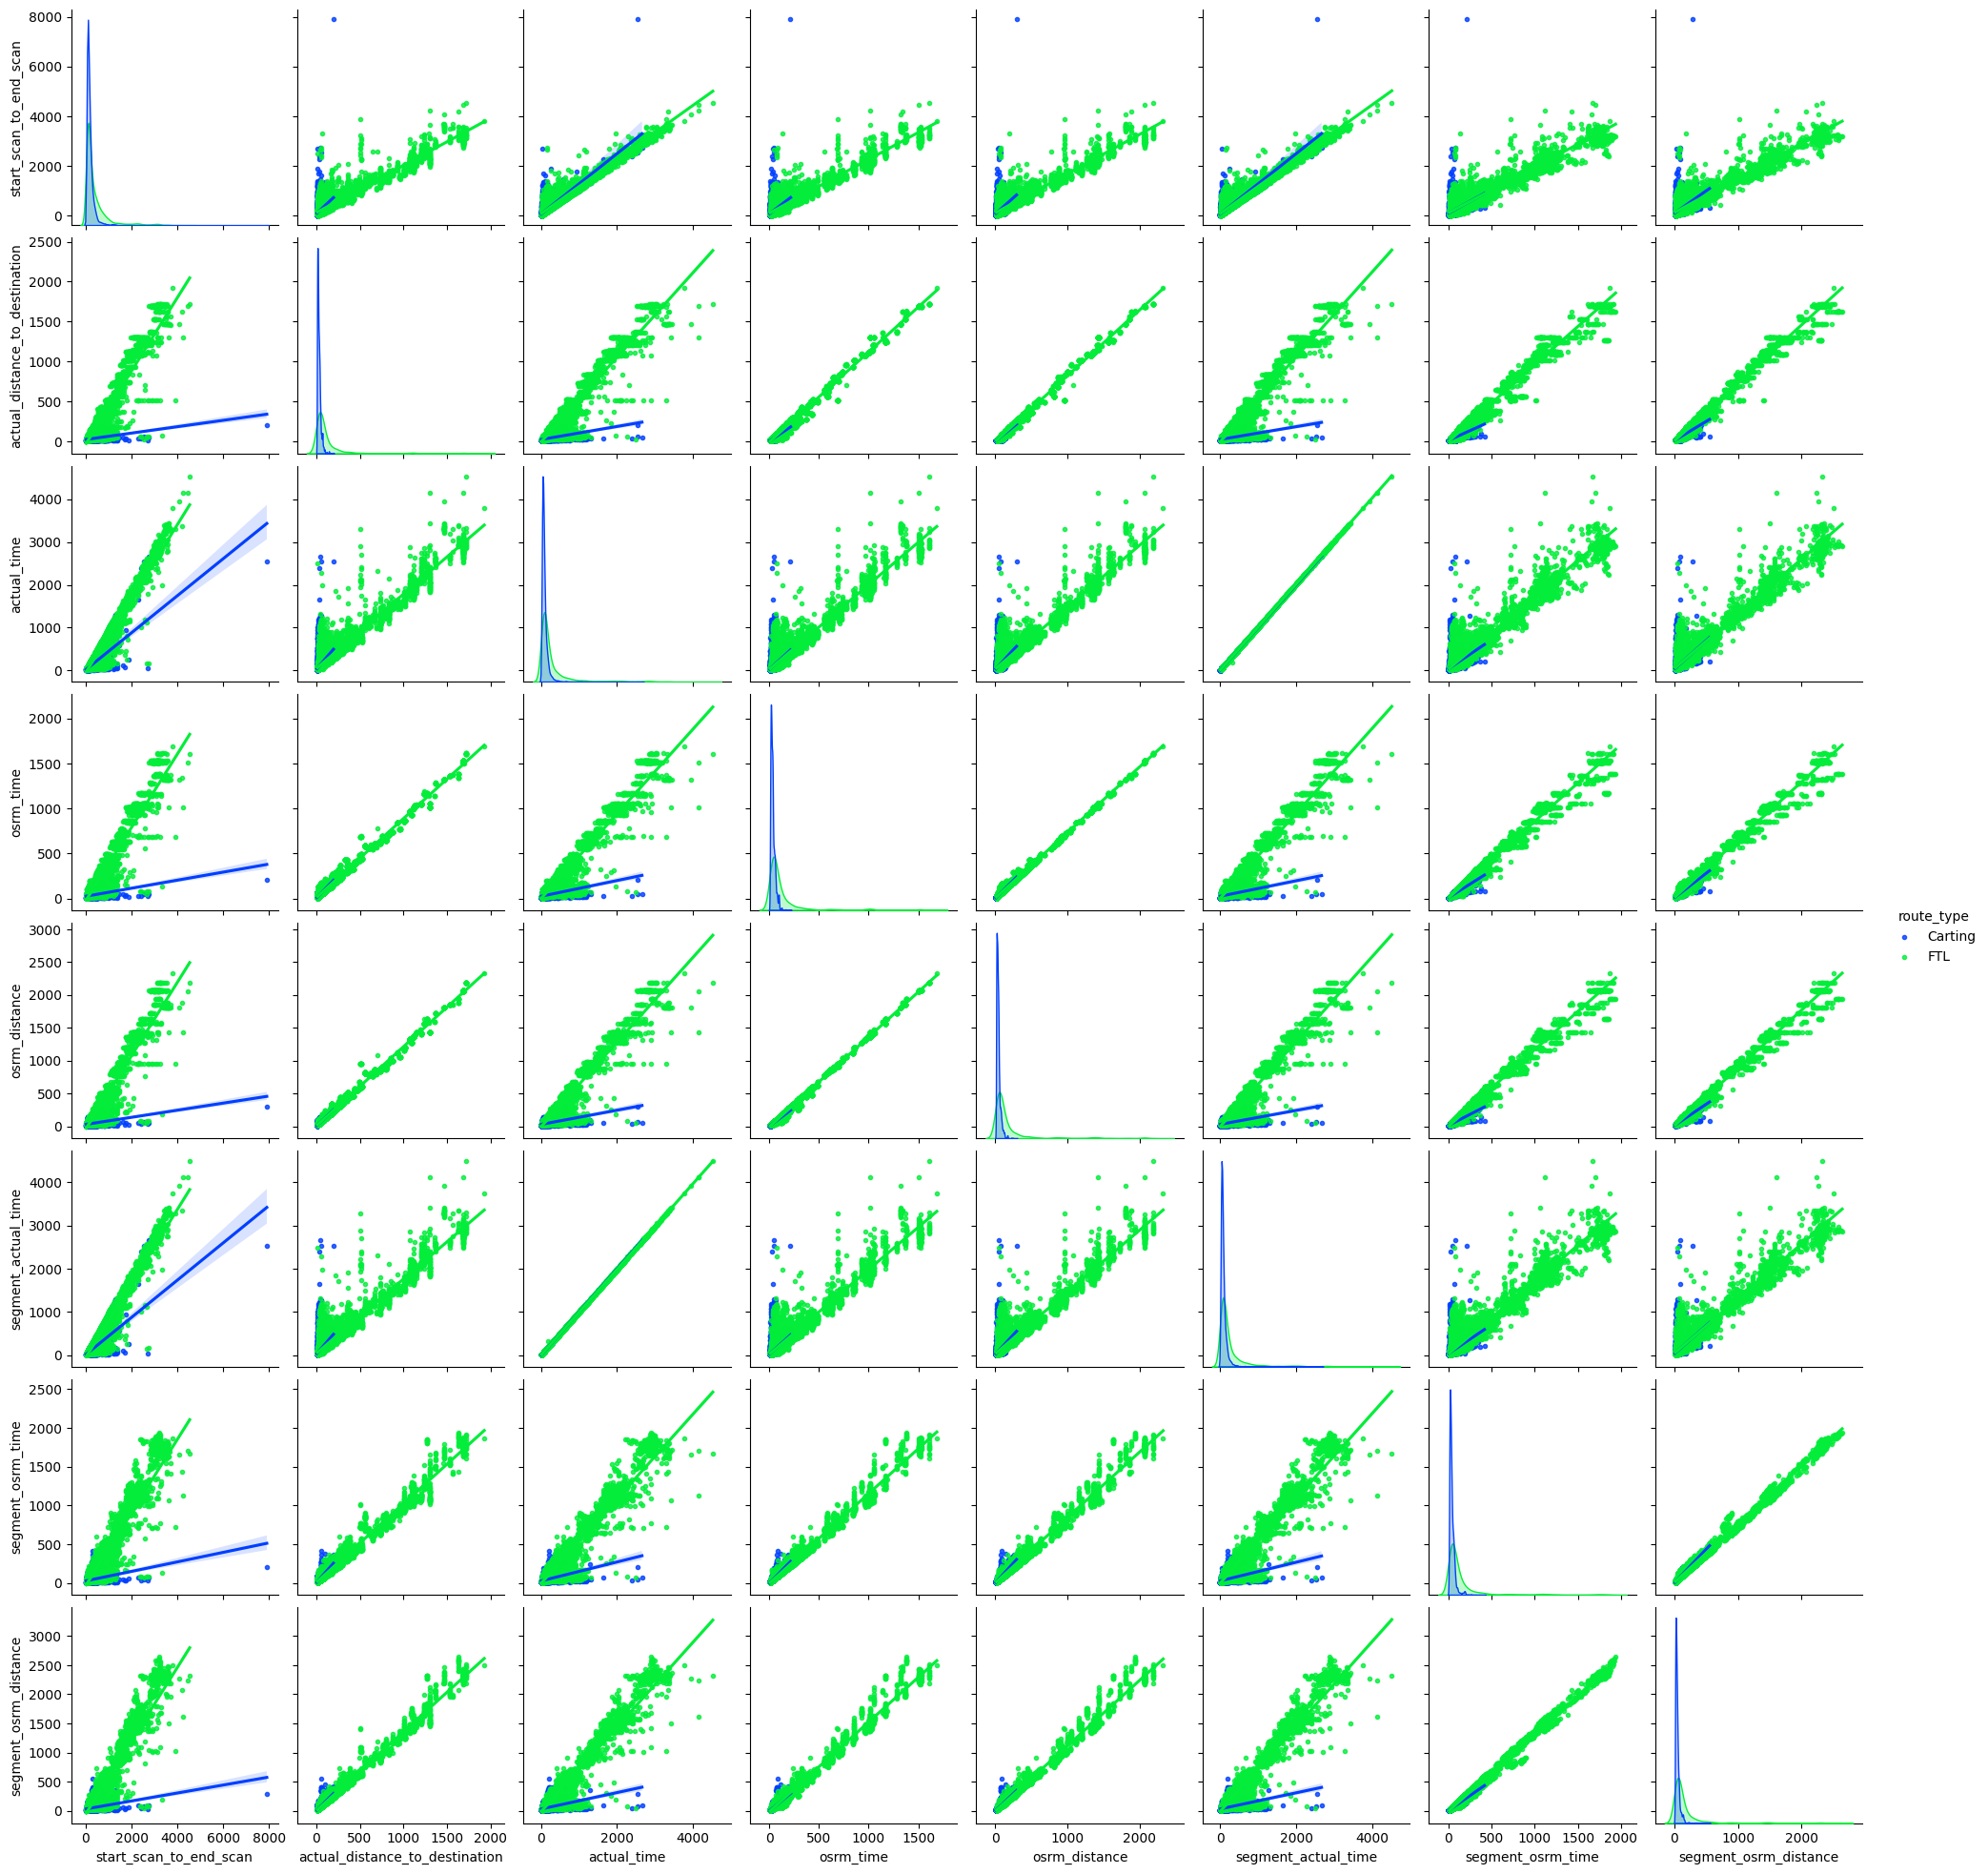

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.title(f' Pairplot Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='dimgrey',color='w')
sns.pairplot(data = df,vars=num_cols,kind = 'reg',hue='route_type',markers ='.')
plt.show()

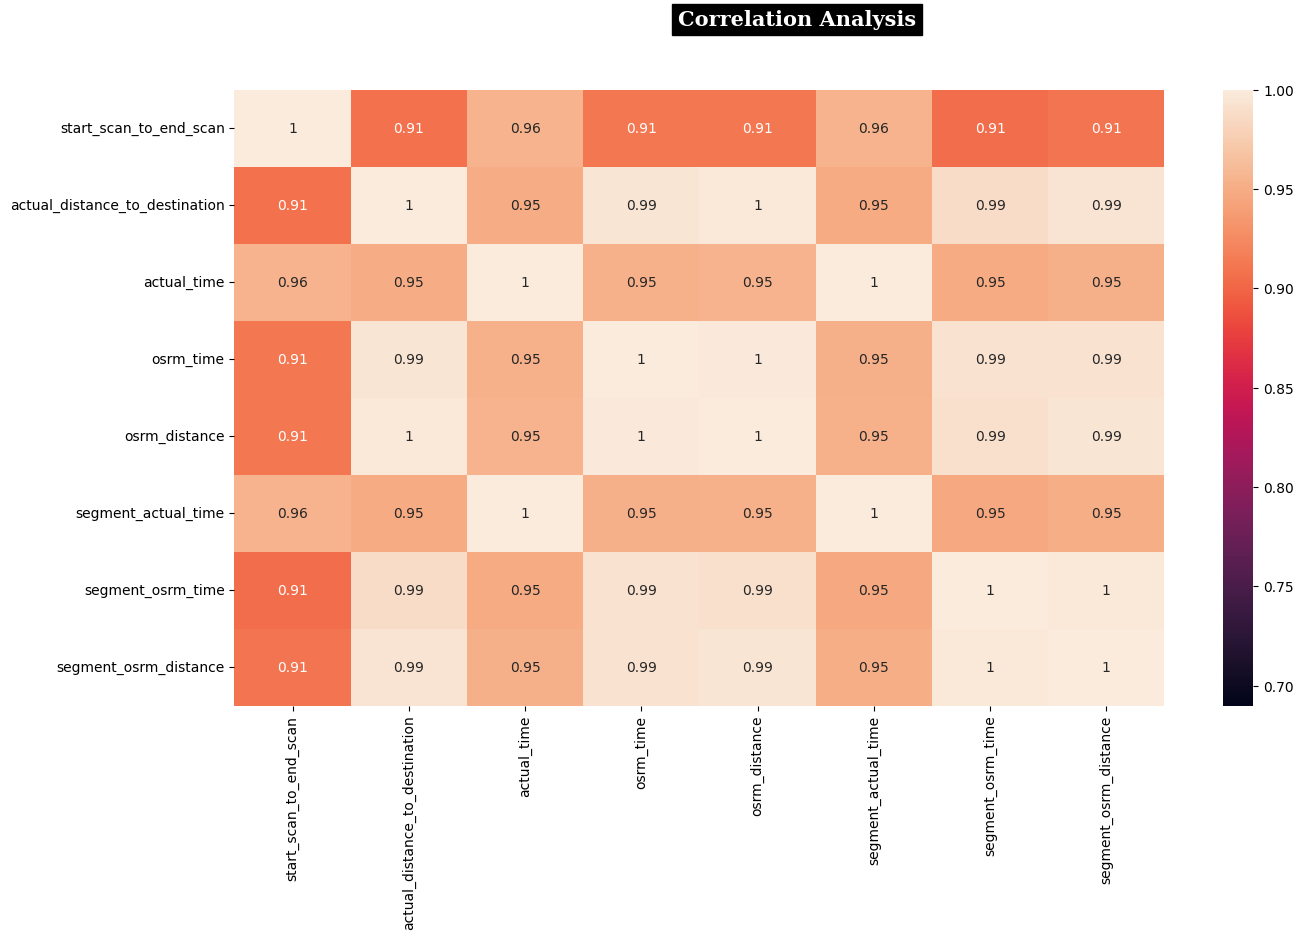

In [ ]:
plt.figure(figsize = (15,8))
plt.suptitle(f'Correlation Analysis',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
sns.heatmap(data = df[num_cols].corr(),vmin=0.69, annot = True)
plt.show()

Insights:
* Very High Correlation exists between all the numerical columns.

# **Feature Engineering**

## *Encoding,Normalization and Standardization*

For better prediction lets do **One-hot encoding** on data, route-type columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

In [ ]:
categorical_cols=['data','route_type']

In [ ]:
ohe = OneHotEncoder(sparse_output=False)
encoded_cat_cols = ohe.fit_transform(df[categorical_cols])

categorical_encoded_df = pd.DataFrame(encoded_cat_cols, columns=ohe.get_feature_names_out(categorical_cols))
display(categorical_encoded_df)

encoded_df = pd.concat([df,categorical_encoded_df],axis=1)
encoded_df

data_test  data_training  route_type_Carting  route_type_FTL
0            0.0            1.0                 0.0             1.0
1            0.0            1.0                 0.0             1.0
2            0.0            1.0                 1.0             0.0
3            0.0            1.0                 1.0             0.0
4            0.0            1.0                 0.0             1.0
...          ...            ...                 ...             ...
26217        1.0            0.0                 1.0             0.0
26218        1.0            0.0                 1.0             0.0
26219        1.0            0.0                 1.0             0.0
26220        1.0            0.0                 0.0             1.0
26221        1.0            0.0                 0.0             1.0

[26222 rows x 4 columns]

trip_uuid source_center destination_center      data  \
0      trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1      trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2      trip-153671042288605164  IND561203AAB       IND562101AAA  training   
3      trip-153671042288605164  IND572101AAA       IND561203AAB  training   
4      trip-153671043369099517  IND000000ACB       IND160002AAC  training   
...                        ...           ...                ...       ...   
26217  trip-153861115439069069  IND628204AAA       IND627657AAA      test   
26218  trip-153861115439069069  IND628613AAA       IND627005AAA      test   
26219  trip-153861115439069069  IND628801AAA       IND628204AAA      test   
26220  trip-153861118270144424  IND583119AAA       IND583101AAA      test   
26221  trip-153861118270144424  IND583201AAA       IND583119AAA      test   

      route_type         trip_creation_time  trip_creation_day  \
0            FTL 2018-09-12 00:00:16.535741                 12   
1            FTL 2018-09-12 00:00:16.535741                 12   
2        Carting 2018-09-12 00:00:22.886430                 12   
3        Carting 2018-09-12 00:00:22.886430                 12   
4            FTL 2018-09-12 00:00:33.691250                 12   
...          ...                        ...                ...   
26217    Carting 2018-10-03 23:59:14.390954                  3   
26218    Carting 2018-10-03 23:59:14.390954                  3   
26219    Carting 2018-10-03 23:59:14.390954                  3   
26220        FTL 2018-10-03 23:59:42.701692                  3   
26221        FTL 2018-10-03 23:59:42.701692                  3   

       trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                        9                2018                   0  ...   
1                        9                2018                   0  ...   
2                        9                2018                   0  ...   
3                        9                2018                   0  ...   
4                        9                2018                   0  ...   
...                    ...                 ...                 ...  ...   
26217                   10                2018                  23  ...   
26218                   10                2018                  23  ...   
26219                   10                2018                  23  ...   
26220                   10                2018                  23  ...   
26221                   10                2018                  23  ...   

      actual_time osrm_time osrm_distance segment_actual_time  \
0           732.0     329.0      446.5496               728.0   
1           830.0     388.0      544.8027               820.0   
2            47.0      26.0       28.1994                46.0   
3            96.0      42.0       56.9116                95.0   
4           611.0     212.0      281.2109               608.0   
...           ...       ...           ...                 ...   
26217        51.0      41.0       42.5213                49.0   
26218        90.0      48.0       40.6080                89.0   
26219        30.0      14.0       16.0185                29.0   
26220       233.0      42.0       52.5303               233.0   
26221        42.0      26.0       28.0484                41.0   

      segment_osrm_time segment_osrm_distance data_test data_training  \
0                 534.0              670.6205       0.0           1.0   
1                 474.0              649.8528       0.0           1.0   
2                  26.0               28.1995       0.0           1.0   
3                  39.0               55.9899       0.0           1.0   
4                 231.0              317.7408       0.0           1.0   
...                 ...                   ...       ...           ...   
26217              42.0               42.1431       1.0           0.0   
26218              77.0              

**Minmax Scaler**
* Most appropriate since the data is not gaussian

In [ ]:
# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(df[num_cols])

# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=num_cols)
min_max_scaled_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    0.157400                        0.195344     0.159850   
1                    0.124270                        0.225168     0.181517   
2                    0.004824                        0.008154     0.008402   
3                    0.012947                        0.020611     0.019235   
4                    0.103326                        0.119075     0.133098   
...                       ...                             ...          ...   
26217                0.005331                        0.012836     0.009286   
26218                0.009012                        0.012861     0.017908   
26219                0.003046                        0.001908     0.004643   
26220                0.033892                        0.016443     0.049525   
26221                0.005839                        0.008618     0.007296   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       0.192262       0.188801             0.159956           0.273292   
1       0.227381       0.231204             0.180423           0.242236   
2       0.011905       0.008254             0.008231           0.010352   
3       0.021429       0.020646             0.019132           0.017081   
4       0.122619       0.117446             0.133259           0.116460   
...          ...            ...                  ...                ...   
26217   0.020833       0.014435             0.008899           0.018634   
26218   0.025000       0.013610             0.017798           0.036749   
26219   0.004762       0.002998             0.004449           0.004141   
26220   0.021429       0.018755             0.049833           0.018634   
26221   0.011905       0.008189             0.007119           0.009834   

       segment_osrm_distance  
0                   0.251362  
1                   0.243471  
2                   0.007267  
3                   0.017827  
4                   0.117282  
...                      ...  
26217               0.012565  
26218               0.026413  
26219               0.002639  
26220               0.016512  
26221               0.007210  

[26222 rows x 8 columns]

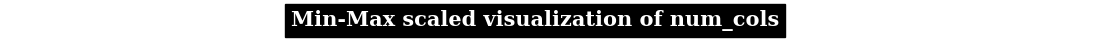

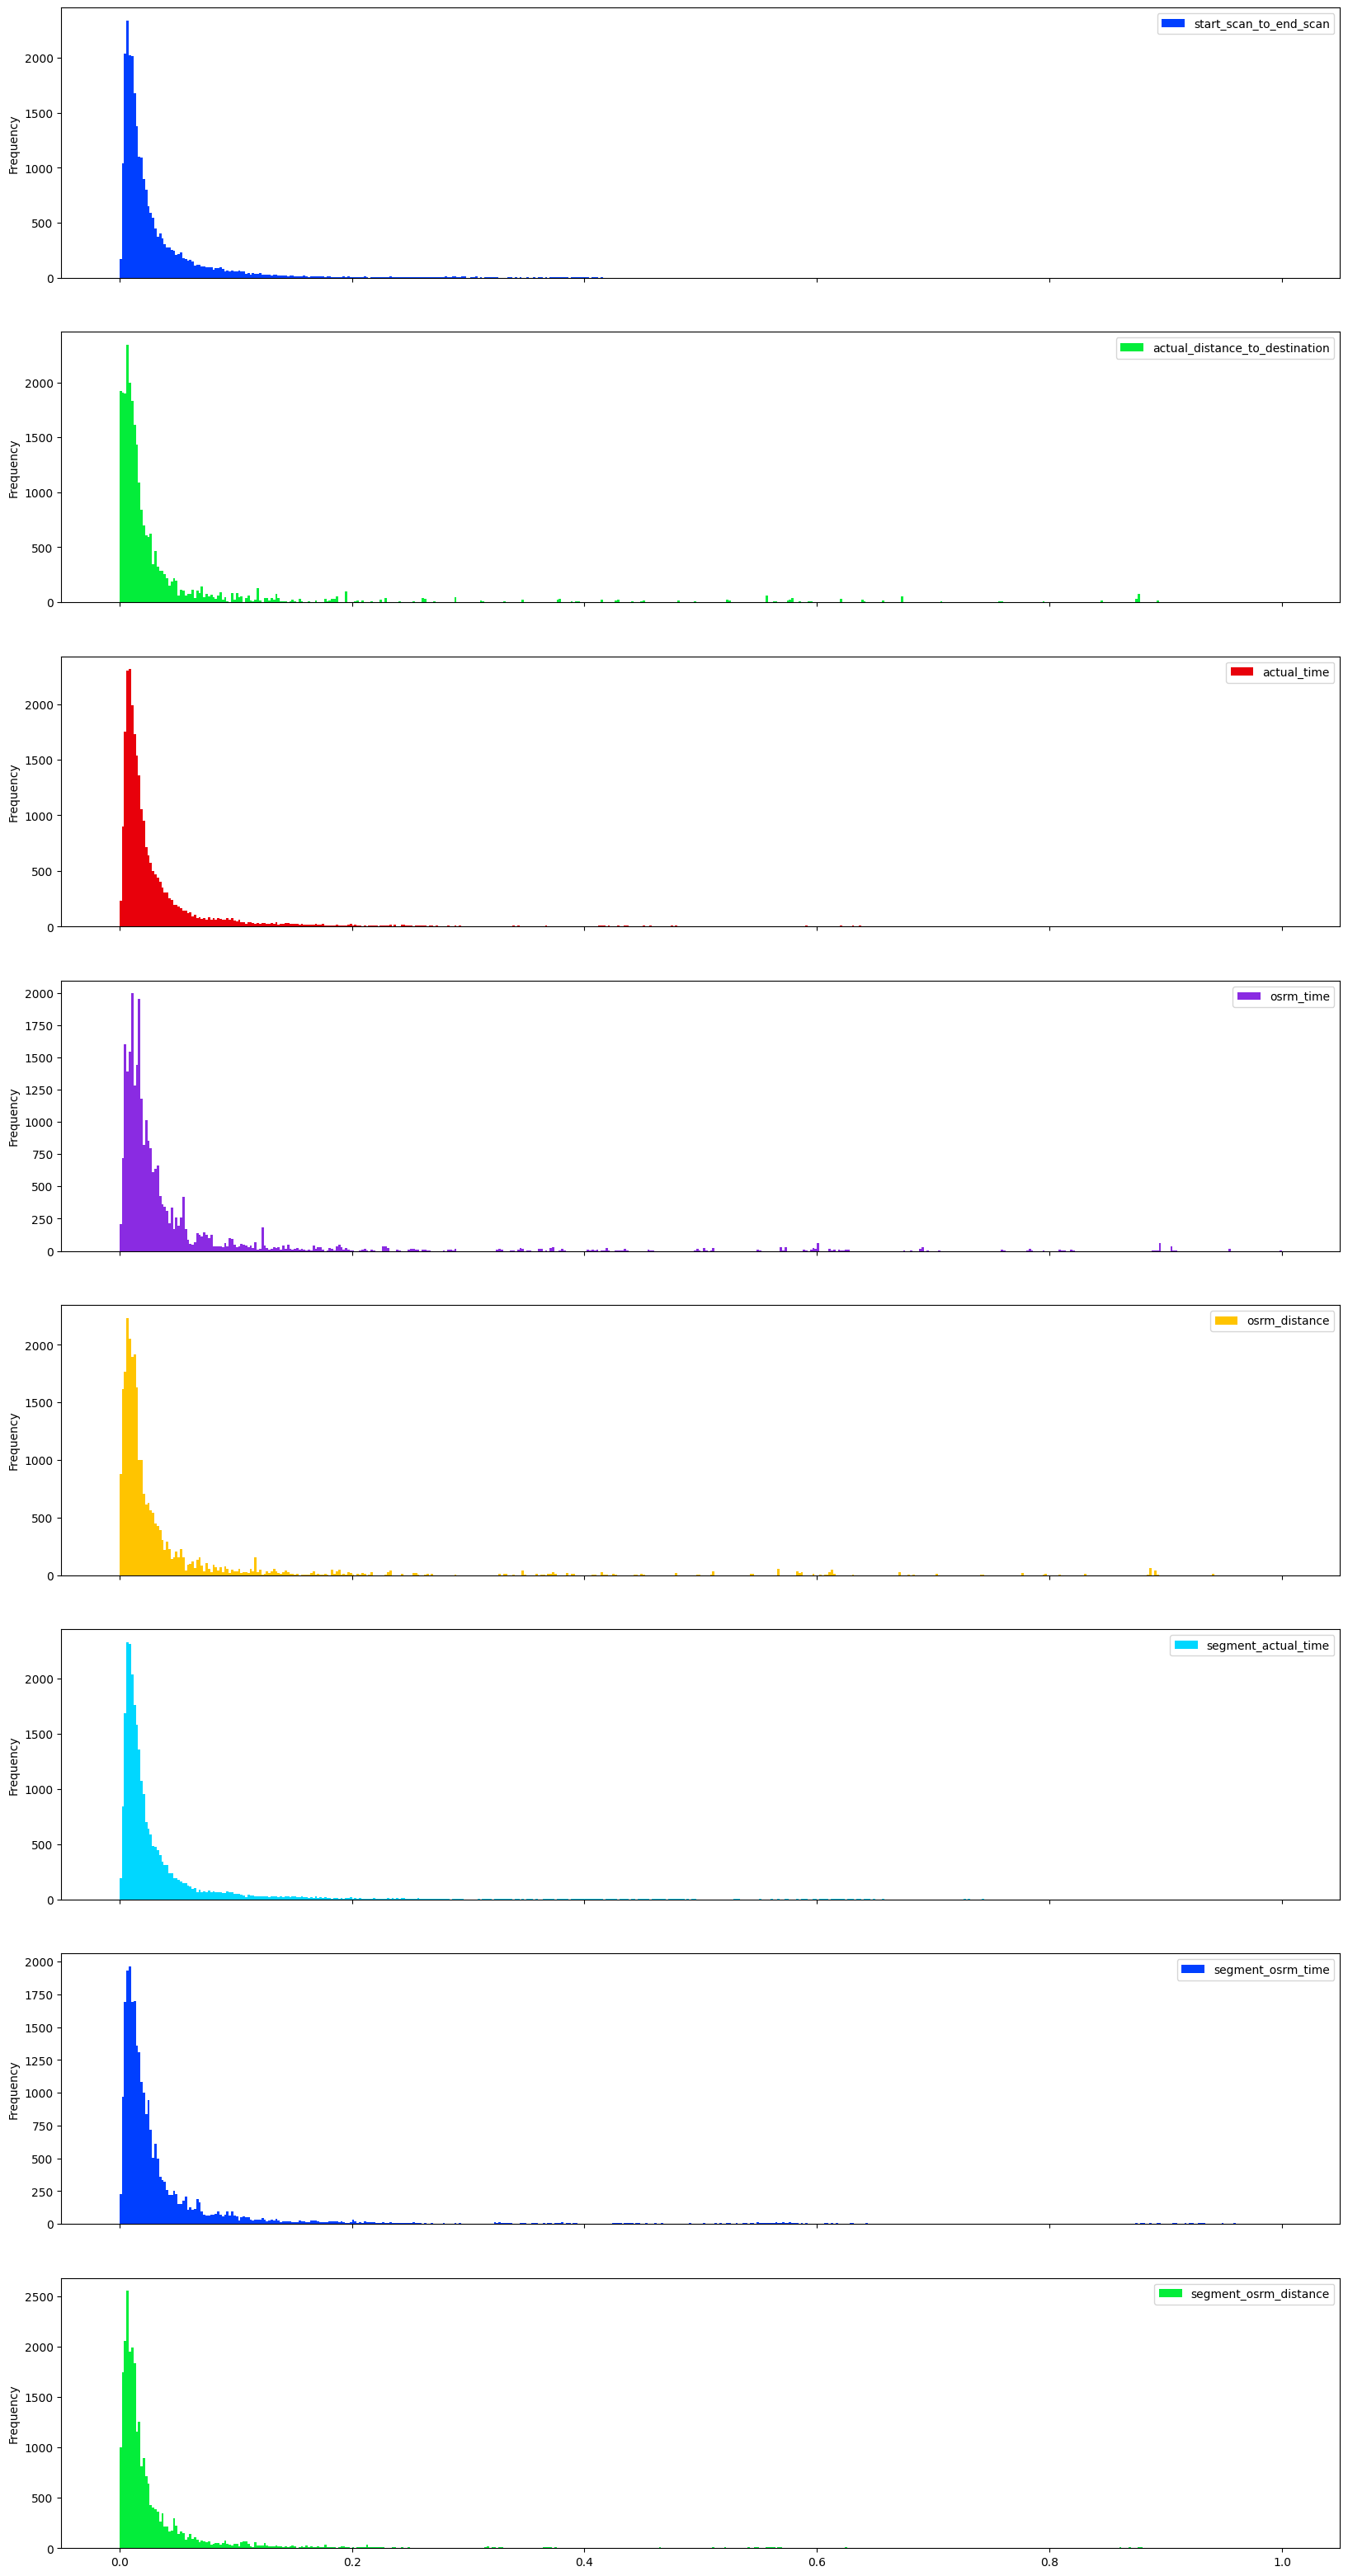

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Min-Max scaled visualization of num_cols',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='k',color='w')
min_max_scaled_df.plot(kind='hist', figsize=(20,40),subplots=True,bins=500)
plt.show()

**StandardScaler**
* Just so to know ... cant do this as `data is not gaussian`
* Standardization works only with data which follows normal distribution

In [ ]:
# Standardizing the numerical features using StandardScaler
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df[num_cols])

# Converting the scaled features back to a dataframe
std_scaled_df = pd.DataFrame(std_scaled, columns=num_cols)
std_scaled_df

start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    2.179615                        1.387132     1.376824   
1                    1.587924                        1.659649     1.630892   
2                   -0.545338                       -0.323361    -0.399059   
3                   -0.400249                       -0.209529    -0.272025   
4                    1.213866                        0.690201     1.063128   
...                       ...                             ...          ...   
26217               -0.536270                       -0.280573    -0.388689   
26218               -0.470527                       -0.280351    -0.287581   
26219               -0.577077                       -0.380432    -0.443132   
26220               -0.026192                       -0.247615     0.083151   
26221               -0.527202                       -0.319118    -0.412022   

       osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       1.283824       1.303247             1.384047           1.999119   
1       1.601797       1.689429             1.624794           1.721596   
2      -0.349151      -0.341071            -0.400624          -0.350573   
3      -0.262922      -0.228219            -0.272399          -0.290443   
4       0.653269       0.653386             1.070029           0.597629   
...          ...            ...                  ...                ...   
26217  -0.268311      -0.284779            -0.392773          -0.276567   
26218  -0.230586      -0.292300            -0.288100          -0.114679   
26219  -0.413824      -0.388948            -0.445109          -0.406077   
26220  -0.262922      -0.245439             0.088722          -0.276567   
26221  -0.349151      -0.341665            -0.413708          -0.355198   

       segment_osrm_distance  
0                   1.901293  
1                   1.828847  
2                  -0.339727  
3                  -0.242783  
4                   0.670308  
...                      ...  
26217              -0.291086  
26218              -0.163955  
26219              -0.382219  
26220              -0.254851  
26221              -0.340254  

[26222 rows x 8 columns]

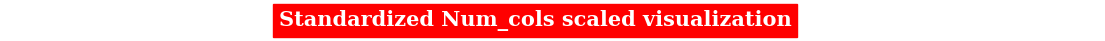

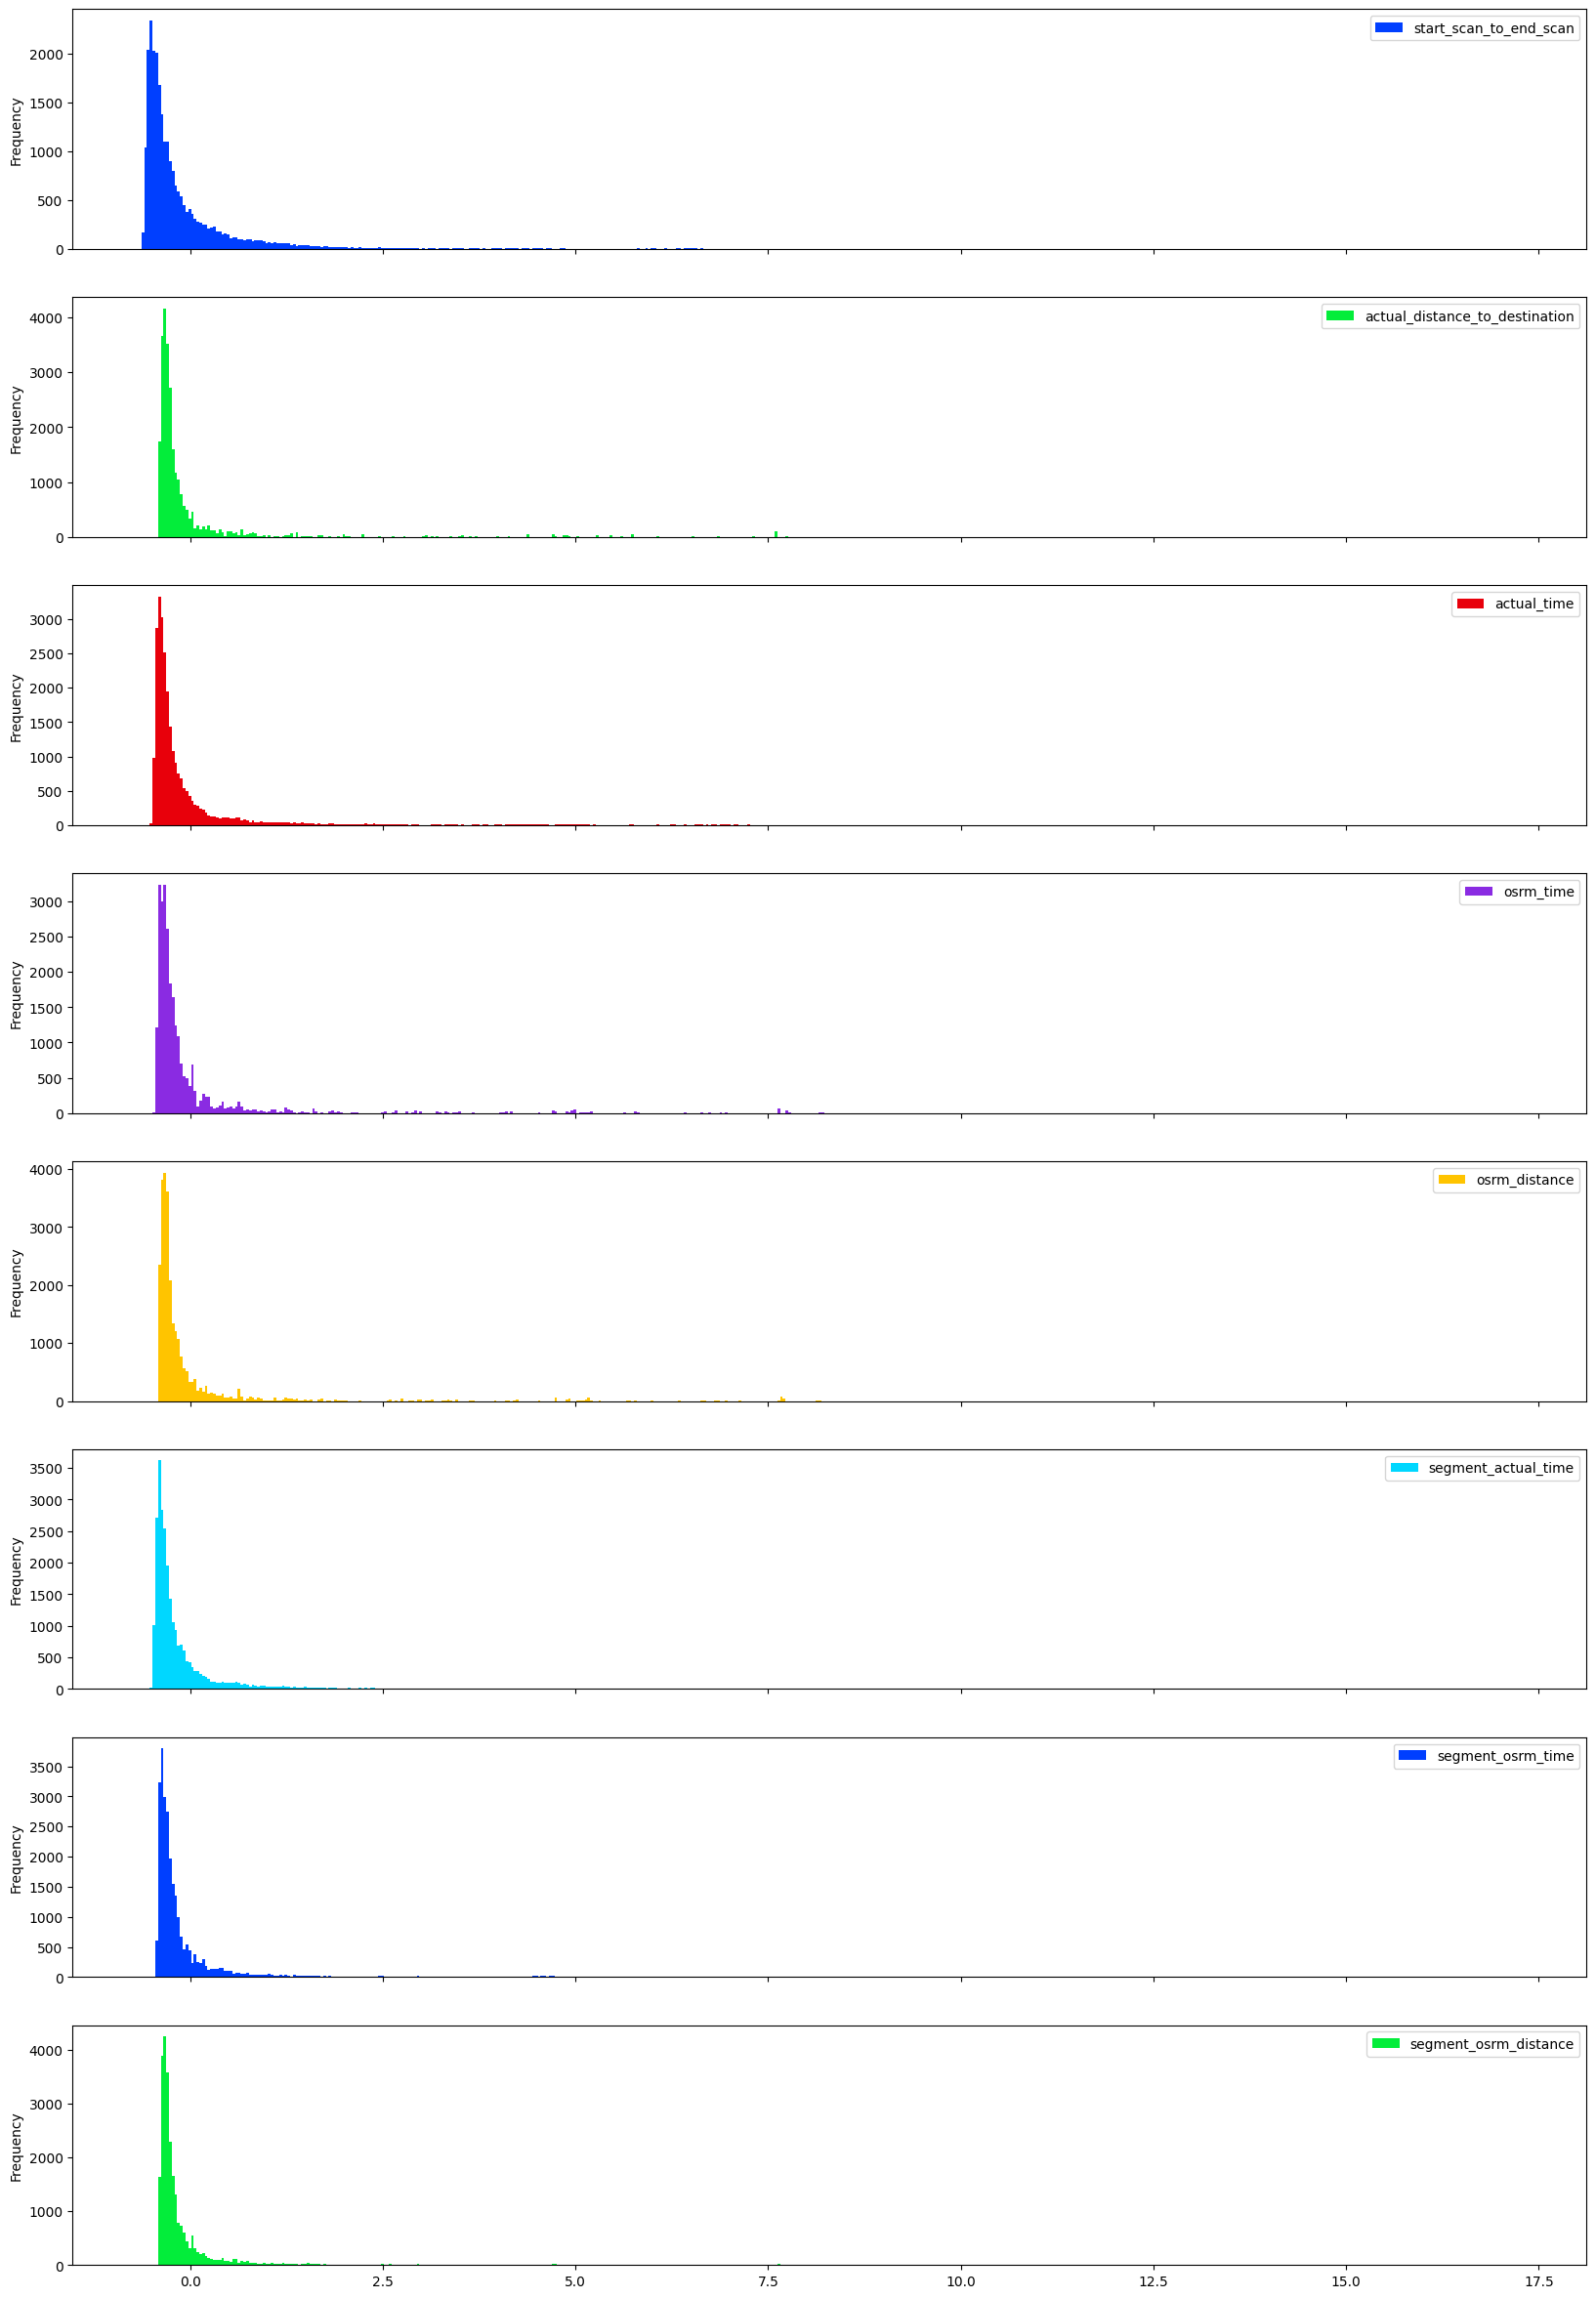

In [ ]:
plt.figure(figsize=(14,0.05))
plt.axis('off')
plt.suptitle(f'Standardized Num_cols scaled visualization',fontfamily='serif',fontweight='bold',fontsize=15,backgroundcolor='r',color='w')
std_scaled_df.plot(kind='hist', figsize=(20,30),subplots=True,bins=500)
plt.show()

# **Hypothesis Testing**

## *Hypothesis Testing FrameWork:*

**Step-1: Setup Null and Alternate Hypothesis**

**Step-2: Define Test Statistics, Distribution under H0**

 * We know that the test statistic while performing a T-Test follows Tdistribution, Chi-square distribution for Chi-square test for independence and F-Distribution for both One-way and Two-Way Anova.

 * If data doesnot follows normal distribution we go with
  *  T-test alternative: Mannwhitney_u test (Non - Parametric test)
  * One-way Anova Alternative: KS-Test

**Step-3: Check for basic Assumptions of the hypothesis**
* Normality check
 * Visual - QQplot/probplot and histplot
 * statistical - shapiro-wilk test
* Variance Check
 * Visual - kdeplot
 * statistical - levene's test

**Step-4: Decide the kind of test.**
 * We will be performing Two tailed test for indpependent variables

**STEP-5: Compute the p-value and fix value of alpha.**
 * We set our alpha to be 0.05 (i.e) confidence level = 95%

**STEP-6: Compare p-value and alpha.**

* Based on p-value, we will accept or reject H0.
 * p-val > alpha : Accept Ho
 * p-val < alpha : Reject Ho

## *Normality Test for all columns*

In [ ]:
from scipy.stats import shapiro

In [ ]:
for i in num_cols:
  print("_"*100)
  print(f"Normality test for {i}")
  print("*"*40)
  print("H0: {i} follows normal Distribution")
  print("H1: {i} does not follows normal Distribution")
  print("*"*40)
  test_stats,p_value = shapiro(df[i])
  print(f"The test statistic for {i} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f"{i} \033[1mdoes not follow\033[0m normal distribution")
  else:
    print("With lessthan 95% Confidence, Rejecting Null Hypothesis")
    print(f"{i} \033[1mfollow\033[0m normal distribution")

____________________________________________________________________________________________________
Normality test for start_scan_to_end_scan
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for start_scan_to_end_scan is 0.5304338308747462 and with p-value of 5.161369599523079e-122
With morethan 95% Confidence, Rejecting Null Hypothesis
start_scan_to_end_scan does not follow normal distribution
____________________________________________________________________________________________________
Normality test for actual_distance_to_destination
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for actual_distance_to_destination is 0.3652899182462307 and with p-value of 1.3741460781540623e-130
With morethan 95% Confidence, Reje

## *Normality check for all normalized columns*

In [ ]:
for i in num_cols:
  print("_"*100)
  print(f"Normality test for {i}")
  print("*"*40)
  print("H0: {i} follows normal Distribution")
  print("H1: {i} does not follows normal Distribution")
  print("*"*40)
  test_stats,p_value = shapiro(min_max_scaled_df[i])
  print(f"The test statistic for {i} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f"{i} \033[1mdoes not follow\033[0m normal distribution")
  else:
    print("With lessthan 95% Confidence, Rejecting Null Hypothesis")
    print(f"{i} \033[1mfollow\033[0m normal distribution")

____________________________________________________________________________________________________
Normality test for start_scan_to_end_scan
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for start_scan_to_end_scan is 0.5304338308747465 and with p-value of 5.161369599523079e-122
With morethan 95% Confidence, Rejecting Null Hypothesis
start_scan_to_end_scan does not follow normal distribution
____________________________________________________________________________________________________
Normality test for actual_distance_to_destination
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for actual_distance_to_destination is 0.3652899182462306 and with p-value of 1.3741460781540623e-130
With morethan 95% Confidence, Reje

## *Hypothesis testing/ Visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values after merging the rows on the basis of trip_uuid)*

In [ ]:
df.head(3)

trip_uuid source_center destination_center      data  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1  trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2  trip-153671042288605164  IND561203AAB       IND562101AAA  training   

  route_type         trip_creation_time  trip_creation_day  \
0        FTL 2018-09-12 00:00:16.535741                 12   
1        FTL 2018-09-12 00:00:16.535741                 12   
2    Carting 2018-09-12 00:00:22.886430                 12   

   trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                    9                2018                   0  ...   
1                    9                2018                   0  ...   
2                    9                2018                   0  ...   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   

  start_scan_to_end_scan actual_distance_to_destination actual_time osrm_time  \
0                 1260.0                     383.759164       732.0     329.0   
1                  999.0                     440.973689       830.0     388.0   
2                   58.0                      24.644021        47.0      26.0   

  osrm_distance segment_actual_time  segment_osrm_time  segment_osrm_distance  
0      446.5496               728.0              534.0               670.6205  
1      544.8027               820.0              474.0               649.8528  
2       28.1994                46.0               26.0                28.1995  

[3 rows x 26 columns]

In [ ]:
df['actual_time'].unique()

array([ 732.,  830.,   47., ...,  717., 1802., 2863.])

In [ ]:
df['segment_actual_time'].unique()

array([ 728.,  820.,   46., ..., 1608., 1781., 2830.])

As both the columns are numerical, we can use two sample t-test and correlation.

Assumption of Two Sample T-Test
* Both samples are independent.
* Both populations are normally distributed.
* The population variances are equal (use Levene’s test to check homogeneity of variance).
* Samples are randomly selected.

Lets check for the assumption whether followed or not?

### Random sampling

In [ ]:
df.shape

(26222, 26)

In [ ]:
from scipy.stats import boxcox

In [ ]:
np.random.seed(101)
actual_time_sample = np.random.choice(df['actual_time'],size=2000)
segment_actual_time_sample = np.random.choice(df['segment_actual_time'],size=2000)
acutal_time_sample_boxcox = boxcox(actual_time_sample)
segment_actual_time_sample_boxcox = boxcox(segment_actual_time_sample)


### 1. Normality Check

#### Visual Check

Group Aggregated Data

In [ ]:
def check_visual_normality(samp_data1,samp_data2,col1,col2):
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  plt.title(f"Distribution of {col1}",{'backgroundcolor':'black','color':'white'})
  sns.histplot(data=samp_data1,kde=True)
  plt.subplot(1,2,2)
  plt.title(f"Distribution of {col2}",{'backgroundcolor':'black','color':'white'})
  sns.histplot(data=samp_data2,kde=True)
  plt.show()

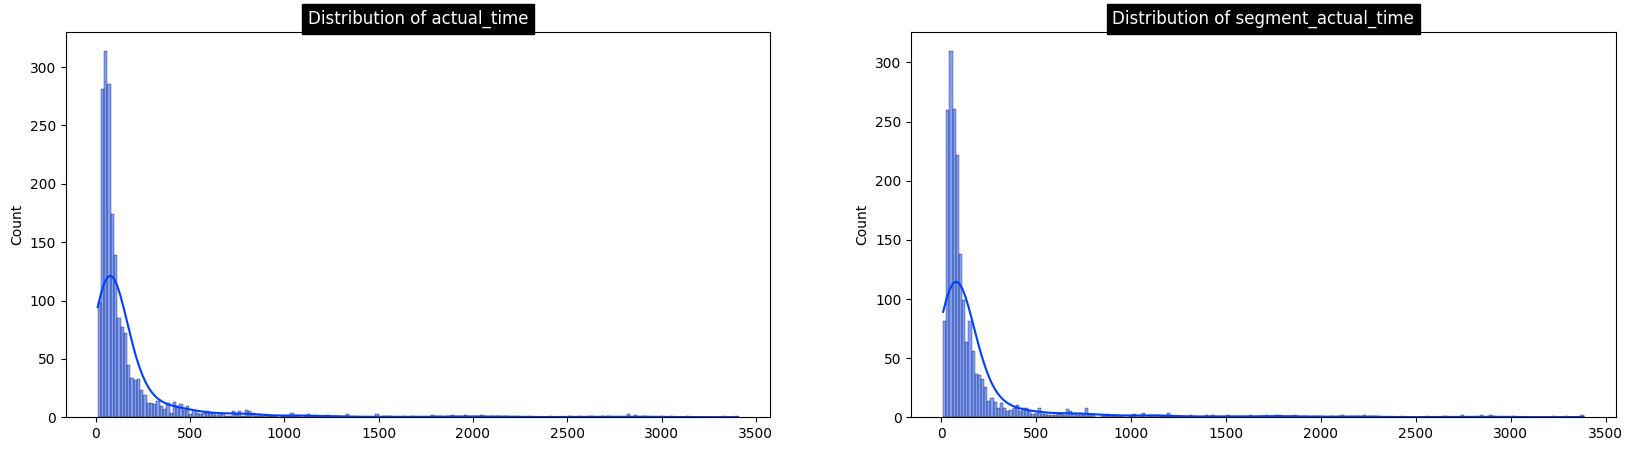

In [ ]:
check_visual_normality(actual_time_sample,segment_actual_time_sample,'actual_time','segment_actual_time')

BoxCox Transform Data

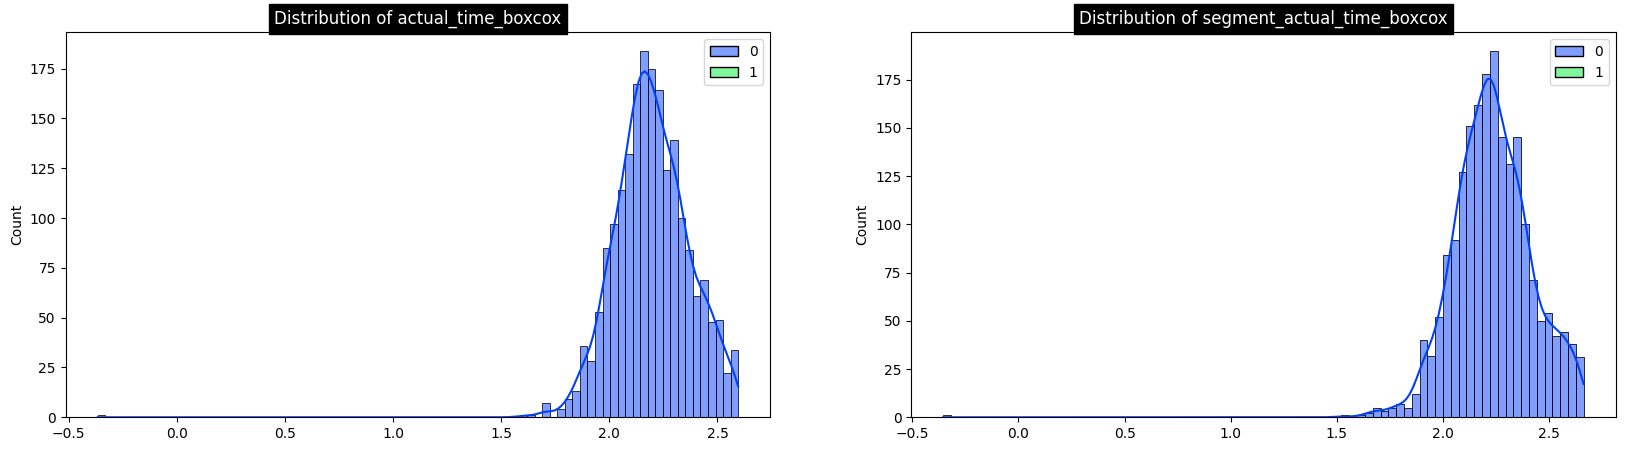

In [ ]:
check_visual_normality(acutal_time_sample_boxcox,segment_actual_time_sample_boxcox,'actual_time_boxcox','segment_actual_time_boxcox')

Both the acutal time and segment actual time does look like Follows normal distribution before and after boxcox transformation.

#### Statistical Check

In [ ]:
from scipy.stats import shapiro

In [ ]:
def check_shapiro(samp_data,col_name):
  print("_"*100)
  print(f"Normality test for {col_name}")
  print("*"*40)
  print("H0: {i} follows normal Distribution")
  print("H1: {i} does not follows normal Distribution")
  print("*"*40)
  test_stats,p_value = shapiro(samp_data)
  print(f"The test statistic for {col_name} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f"{col_name} \033[1mdoes not follow\033[0m normal distribution")
  else:
    print("With lessthan 95% Confidence, failed to Reject Null Hypothesis")
    print(f"{col_name} \033[1mfollow\033[0m normal distribution")

In [ ]:
check_shapiro(actual_time_sample,'acutal_time')
check_shapiro(segment_actual_time_sample,'segment_acutal_time')
check_shapiro(acutal_time_sample_boxcox[0],'acutal_time')
check_shapiro(segment_actual_time_sample_boxcox[0],'acutal_time')

____________________________________________________________________________________________________
Normality test for acutal_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for acutal_time is 0.4290728330514493 and with p-value of 4.871572814743538e-62
With morethan 95% Confidence, Rejecting Null Hypothesis
acutal_time does not follow normal distribution
____________________________________________________________________________________________________
Normality test for segment_acutal_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for segment_acutal_time is 0.4284414023114871 and with p-value of 4.648875922911329e-62
With morethan 95% Confidence, Rejecting Null Hypothesis
segment_acutal_time does not follow 

**Even with morethan 95% confidence it is proven that none of the data follow normal distribution.**

### 2. Variance Check

#### Visual Check

In [ ]:
def check_visual_variance(samp_data1,samp_data2,col1,col2):
  sns.kdeplot(data=samp_data1)
  sns.kdeplot(data=samp_data2)
  plt.legend([col1,col2])

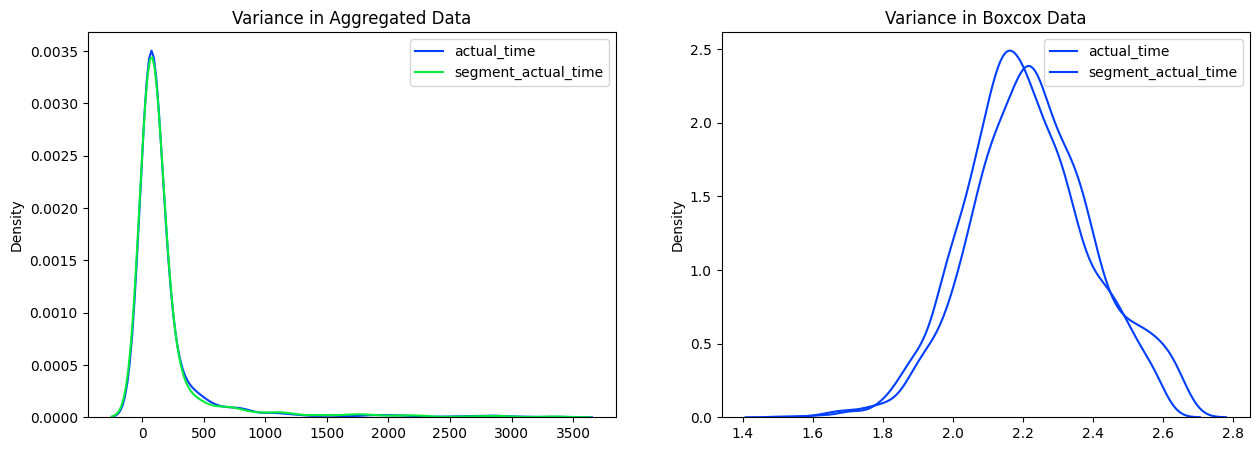

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Variance in Aggregated Data')
check_visual_variance(actual_time_sample,segment_actual_time_sample,'actual_time','segment_actual_time')
plt.subplot(1,2,2)
plt.title('Variance in Boxcox Data')
check_visual_variance(acutal_time_sample_boxcox,segment_actual_time_sample_boxcox,'actual_time','segment_actual_time')
plt.show()

* Both columns in aggregated and boxcox data looks likes to have equal variance.

#### Statistical Check

In [ ]:
from scipy.stats import levene

In [ ]:
def check_levene(samp_data1,samp_data2,col1,col2):
  print("_"*100)
  print(f"Variance test for {col1} and {col2}")
  print("*"*40)
  print(f"H0: {col1} and {col2} have equal Variance.")
  print(f"H1: {col1} and {col2} do not have equal Variance.")
  print("*"*40)
  test_stats,p_value = levene(samp_data1,samp_data2)
  print(f"The test statistic for {col1} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f" {col1} and {col2} do not have equal Variance.")
  else:
    print("With lessthan 95% Confidence, failed to Reject Null Hypothesis")
    print(f"{col1} and {col2} have equal Variance.")

In [ ]:
check_levene(actual_time_sample,segment_actual_time_sample,'actual_time','segment_actual_time')
check_levene(acutal_time_sample_boxcox[0],segment_actual_time_sample_boxcox[0],'actual_time','segment_actual_time')

____________________________________________________________________________________________________
Variance test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time have equal Variance.
H1: actual_time and segment_actual_time do not have equal Variance.
****************************************
The test statistic for actual_time is 0.10915471342859397 and with p-value of 0.7411258536251614
With lessthan 95% Confidence, failed to Reject Null Hypothesis
actual_time and segment_actual_time have equal Variance.
____________________________________________________________________________________________________
Variance test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time have equal Variance.
H1: actual_time and segment_actual_time do not have equal Variance.
****************************************
The test statistic for actual_time is 5.31095112992

Hence, it is morethan 95% confident that both the columns do not have equal variance.

### Final T-Test for independence

Although both assumption are not met by both data.Lets try T-test, then will continue with mannwhitneyu test.

In [ ]:
from scipy.stats import ttest_ind,mannwhitneyu

In [ ]:
def check_ttest_ind(samp_data1,samp_data2,col1,col2):
  print("_"*100)
  print(f"T- test for {col1} and {col2}")
  print("*"*40)
  print(f"H0: {col1} and {col2} means are equal")
  print(f"H1: {col1} and {col2} means are not equal")
  print("*"*40)
  test_stats,p_value = ttest_ind(samp_data1,samp_data2)
  print(f"The test statistic for {col1} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f" {col1} and {col2} means are not equal.")
  else:
    print("With lessthan 95% Confidence, failed to Reject Null Hypothesis")
    print(f"{col1} and {col2} means are equal.")

In [ ]:
check_ttest_ind(actual_time_sample,segment_actual_time_sample,'actual_time','segment_actual_time')
check_ttest_ind(acutal_time_sample_boxcox[0],segment_actual_time_sample_boxcox[0],'actual_time','segment_actual_time')

____________________________________________________________________________________________________
T- test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time means are equal
H1: actual_time and segment_actual_time means are not equal
****************************************
The test statistic for actual_time is -0.25190797256032643 and with p-value of 0.8011251451458112
With lessthan 95% Confidence, failed to Reject Null Hypothesis
actual_time and segment_actual_time means are equal.
____________________________________________________________________________________________________
T- test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time means are equal
H1: actual_time and segment_actual_time means are not equal
****************************************
The test statistic for actual_time is -6.56436921583639 and with p-value of 5.89505097810193

**As data does provide strong evidence of a actual time difference on segment actual time, hence we conclude that acutal time does not meet segment actual time.**

### Mannwhitneyu Test

In [ ]:
def check_mannwhitneyu(samp_data1,samp_data2,col1,col2):
  print("_"*100)
  print(f"Mannwhitneyu test for {col1} and {col2}")
  print("*"*40)
  print(f"H0: {col1} and {col2} means are equal")
  print(f"H1: {col1} and {col2} means are not equal")
  print("*"*40)
  test_stats,p_value = mannwhitneyu(samp_data1,samp_data2)
  print(f"The test statistic for {col1} is {test_stats} and with p-value of {p_value}")
  if(p_value<0.05):
    print("With morethan 95% Confidence, Rejecting Null Hypothesis")
    print(f" {col1} and {col2} means are not equal.")
  else:
    print("With lessthan 95% Confidence, failed to Reject Null Hypothesis")
    print(f"{col1} and {col2} means are equal.")

In [ ]:
check_mannwhitneyu(actual_time_sample,segment_actual_time_sample,'actual_time','segment_actual_time')
check_mannwhitneyu(acutal_time_sample_boxcox[0],segment_actual_time_sample_boxcox[0],'actual_time','segment_actual_time')

____________________________________________________________________________________________________
Mannwhitneyu test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time means are equal
H1: actual_time and segment_actual_time means are not equal
****************************************
The test statistic for actual_time is 2029224.0 and with p-value of 0.4235742772102201
With lessthan 95% Confidence, failed to Reject Null Hypothesis
actual_time and segment_actual_time means are equal.
____________________________________________________________________________________________________
Mannwhitneyu test for actual_time and segment_actual_time
****************************************
H0: actual_time and segment_actual_time means are equal
H1: actual_time and segment_actual_time means are not equal
****************************************
The test statistic for actual_time is 1765178.0 and with p-value of 1.2753131208020

**Hence Delivery time in actual and segment actual time do have a relation.**

## *Hypothesis testing/ Visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)*

In [ ]:
df.head(3)

trip_uuid source_center destination_center      data  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1  trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2  trip-153671042288605164  IND561203AAB       IND562101AAA  training   

  route_type         trip_creation_time  trip_creation_day  \
0        FTL 2018-09-12 00:00:16.535741                 12   
1        FTL 2018-09-12 00:00:16.535741                 12   
2    Carting 2018-09-12 00:00:22.886430                 12   

   trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                    9                2018                   0  ...   
1                    9                2018                   0  ...   
2                    9                2018                   0  ...   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   

  start_scan_to_end_scan actual_distance_to_destination actual_time osrm_time  \
0                 1260.0                     383.759164       732.0     329.0   
1                  999.0                     440.973689       830.0     388.0   
2                   58.0                      24.644021        47.0      26.0   

  osrm_distance segment_actual_time  segment_osrm_time  segment_osrm_distance  
0      446.5496               728.0              534.0               670.6205  
1      544.8027               820.0              474.0               649.8528  
2       28.1994                46.0               26.0                28.1995  

[3 rows x 26 columns]

In [ ]:
df['osrm_distance'].unique()

array([446.5496, 544.8027,  28.1994, ...,  16.0185,  52.5303,  28.0484])

In [ ]:
df['segment_osrm_distance'].unique()

array([670.6205, 649.8528,  28.1995, ...,  16.0184,  52.5303,  28.0484])

As both the columns are numerical, we can use two sample t-test and correlation.

Assumption of Two Sample T-Test Independence
* Both samples are independent.
* Both populations are normally distributed.
* The population variances are equal (use Levene’s test to check homogeneity of variance).
* Samples are randomly selected.

Lets check for the assumption whether followed or not?

### Random sampling

In [ ]:
df.shape

(26222, 26)

In [ ]:
np.random.seed(102)
osrm_distance_sample = np.random.choice(df['osrm_distance'],size=2000)
segment_osrm_distance_sample = np.random.choice(df['segment_osrm_distance'],size=2000)
osrm_distance_sample_boxcox = boxcox(osrm_distance_sample)
segment_osrm_distance_sample_boxcox = boxcox(segment_osrm_distance_sample)


### 1. Normality Check

#### Visual Check

Group Aggregated Data

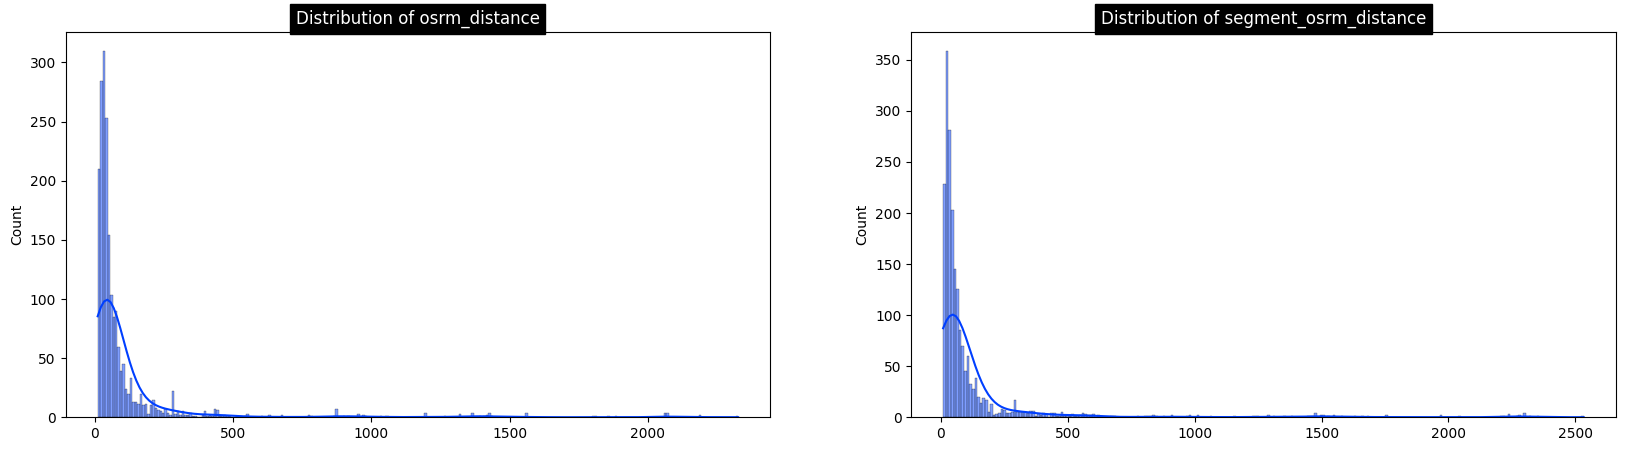

In [ ]:
check_visual_normality(osrm_distance_sample,segment_osrm_distance_sample,'osrm_distance','segment_osrm_distance')

BoxCox Transform Data

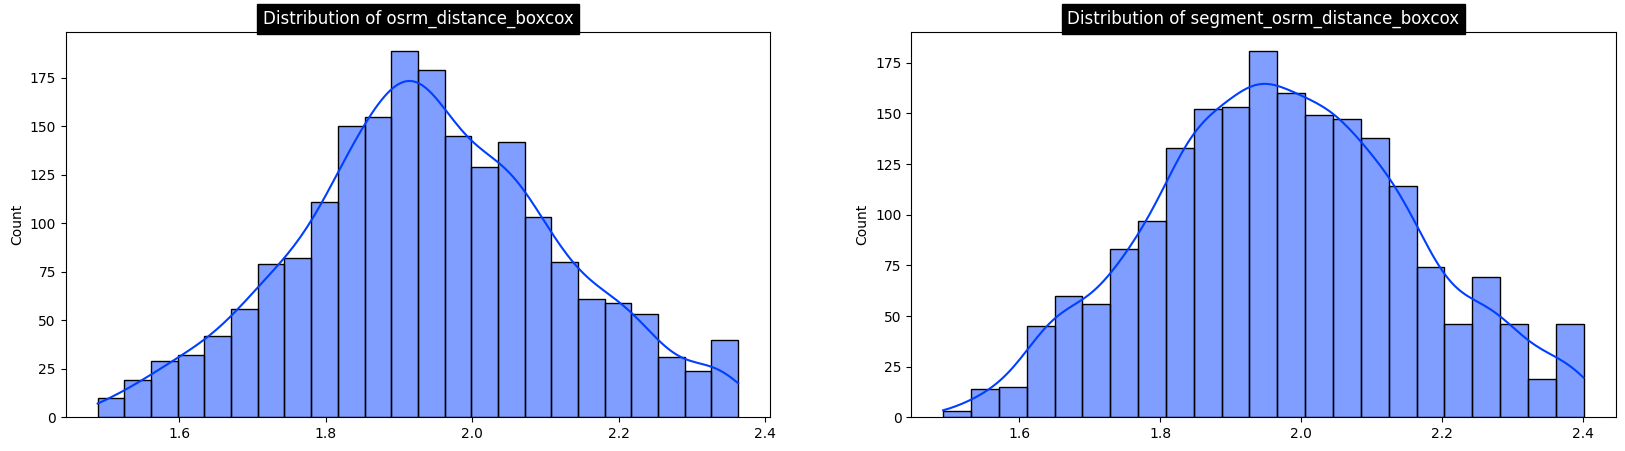

In [ ]:
check_visual_normality(osrm_distance_sample_boxcox[0],segment_osrm_distance_sample_boxcox[0],'osrm_distance_boxcox','segment_osrm_distance_boxcox')

Both the osrm_distance and segment_osrm_distance does not look like normal distribution before and but looks alike following normal distribution after boxcox transformation.

#### Statistical Check

In [ ]:
check_shapiro(osrm_distance_sample,'acutal_time')
check_shapiro(segment_osrm_distance_sample,'segment_acutal_time')
check_shapiro(osrm_distance_sample_boxcox[0],'acutal_time')
check_shapiro(segment_osrm_distance_sample_boxcox[0],'acutal_time')

____________________________________________________________________________________________________
Normality test for acutal_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for acutal_time is 0.35996691685889004 and with p-value of 3.706963409604554e-64
With morethan 95% Confidence, Rejecting Null Hypothesis
acutal_time does not follow normal distribution
____________________________________________________________________________________________________
Normality test for segment_acutal_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for segment_acutal_time is 0.36297395751190986 and with p-value of 4.5400867727729876e-64
With morethan 95% Confidence, Rejecting Null Hypothesis
segment_acutal_time does not foll

**Even with morethan 95% confidence it is proven that none of the data follow normal distribution.**

### 2. Variance Check

#### Visual Check

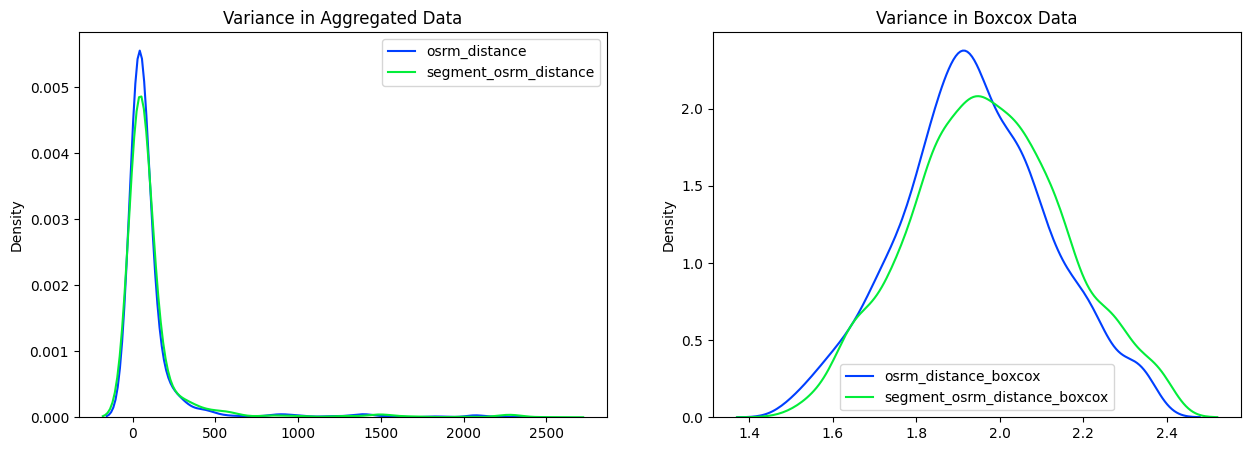

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Variance in Aggregated Data')
check_visual_variance(osrm_distance_sample,segment_osrm_distance_sample,'osrm_distance','segment_osrm_distance')
plt.subplot(1,2,2)
plt.title('Variance in Boxcox Data')
check_visual_variance(osrm_distance_sample_boxcox[0],segment_osrm_distance_sample_boxcox[0],'osrm_distance_boxcox','segment_osrm_distance_boxcox')
plt.show()

* Both columns in aggregated and boxcox data looks like does not have equal variance.

#### Statistical Check

In [ ]:
check_levene(osrm_distance_sample,segment_osrm_distance_sample,'osrm_distance','segment_osrm_distance')
check_levene(osrm_distance_sample_boxcox[0],segment_osrm_distance_sample_boxcox[0],'osrm_distance_boxcox','segment_osrm_distance_boxcox')

____________________________________________________________________________________________________
Variance test for osrm_distance and segment_osrm_distance
****************************************
H0: osrm_distance and segment_osrm_distance have equal Variance.
H1: osrm_distance and segment_osrm_distance do not have equal Variance.
****************************************
The test statistic for osrm_distance is 2.3200525500917033 and with p-value of 0.12779480077523486
With lessthan 95% Confidence, failed to Reject Null Hypothesis
osrm_distance and segment_osrm_distance have equal Variance.
____________________________________________________________________________________________________
Variance test for osrm_distance_boxcox and segment_osrm_distance_boxcox
****************************************
H0: osrm_distance_boxcox and segment_osrm_distance_boxcox have equal Variance.
H1: osrm_distance_boxcox and segment_osrm_distance_boxcox do not have equal Variance.
********************

Hence,
* There is an equal variance between osrm_distance and segment_osrm distance as per normal data.
* It is morethan 95% confident that both the columns do not have equal variance as per boxcox data.

### Final T-Test for independence

Although both assumption are not met by both data.Lets try T-test, then will continue with mannwhitneyu test.

In [ ]:
check_ttest_ind(osrm_distance_sample,segment_osrm_distance_sample,'osrm_distance','segment_osrm_distance')
check_ttest_ind(osrm_distance_sample_boxcox[0],segment_osrm_distance_sample_boxcox[0],'osrm_distance_boxcox','segment_osrm_distance_boxcox')

____________________________________________________________________________________________________
T- test for osrm_distance and segment_osrm_distance
****************************************
H0: osrm_distance and segment_osrm_distance means are equal
H1: osrm_distance and segment_osrm_distance means are not equal
****************************************
The test statistic for osrm_distance is -1.5974697198649255 and with p-value of 0.11024006942576345
With lessthan 95% Confidence, failed to Reject Null Hypothesis
osrm_distance and segment_osrm_distance means are equal.
____________________________________________________________________________________________________
T- test for osrm_distance_boxcox and segment_osrm_distance_boxcox
****************************************
H0: osrm_distance_boxcox and segment_osrm_distance_boxcox means are equal
H1: osrm_distance_boxcox and segment_osrm_distance_boxcox means are not equal
****************************************
The test statistic f

**As data does provide strong evidence of osrm distance is same as segment osrm distance w.r.t to sample data, but is different as per boxcox data.**

### Mannwhitneyu Test

In [ ]:
check_mannwhitneyu(osrm_distance_sample,segment_osrm_distance_sample,'osrm_distance','segment_osrm_distance')
check_mannwhitneyu(osrm_distance_sample_boxcox[0],segment_osrm_distance_sample_boxcox[0],'osrm_distance_boxcox','segment_osrm_distance_boxcox')

____________________________________________________________________________________________________
Mannwhitneyu test for osrm_distance and segment_osrm_distance
****************************************
H0: osrm_distance and segment_osrm_distance means are equal
H1: osrm_distance and segment_osrm_distance means are not equal
****************************************
The test statistic for osrm_distance is 1925037.5 and with p-value of 0.04010533388540338
With morethan 95% Confidence, Rejecting Null Hypothesis
 osrm_distance and segment_osrm_distance means are not equal.
____________________________________________________________________________________________________
Mannwhitneyu test for osrm_distance_boxcox and segment_osrm_distance_boxcox
****************************************
H0: osrm_distance_boxcox and segment_osrm_distance_boxcox means are equal
H1: osrm_distance_boxcox and segment_osrm_distance_boxcox means are not equal
****************************************
The test sta

**Hence Delivery time in osrm_distance and segment_osrm_distance do not have a proper relation and are differing.**

## *Hypothesis testing/ Visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)*

In [ ]:
df.head(3)

trip_uuid source_center destination_center      data  \
0  trip-153671041653548748  IND209304AAA       IND000000ACB  training   
1  trip-153671041653548748  IND462022AAA       IND209304AAA  training   
2  trip-153671042288605164  IND561203AAB       IND562101AAA  training   

  route_type         trip_creation_time  trip_creation_day  \
0        FTL 2018-09-12 00:00:16.535741                 12   
1        FTL 2018-09-12 00:00:16.535741                 12   
2    Carting 2018-09-12 00:00:22.886430                 12   

   trip_creation_month  trip_creation_year  trip_creation_hour  ...  \
0                    9                2018                   0  ...   
1                    9                2018                   0  ...   
2                    9                2018                   0  ...   

               od_start_time                od_end_time  \
0 2018-09-12 16:39:46.858469 2018-09-13 13:40:23.123744   
1 2018-09-12 00:00:16.535741 2018-09-12 16:39:46.858469   
2 2018-09-12 02:03:09.655591 2018-09-12 03:01:59.598855   

  start_scan_to_end_scan actual_distance_to_destination actual_time osrm_time  \
0                 1260.0                     383.759164       732.0     329.0   
1                  999.0                     440.973689       830.0     388.0   
2                   58.0                      24.644021        47.0      26.0   

  osrm_distance segment_actual_time  segment_osrm_time  segment_osrm_distance  
0      446.5496               728.0              534.0               670.6205  
1      544.8027               820.0              474.0               649.8528  
2       28.1994                46.0               26.0                28.1995  

[3 rows x 26 columns]

In [ ]:
df['osrm_time'].unique()

array([ 329.,  388.,   26.,   42.,  212., 1528.,   15.,   46.,   44.,
         27.,   12.,   11.,   13.,   18.,   16.,    8.,   17.,    9.,
         48.,   88.,   91.,  244.,  184.,   73.,   36.,   47.,   97.,
        132.,   21.,   33.,   63.,   14.,   34.,   30.,   45.,   10.,
         80.,   29.,   65.,   57.,   51.,  119.,   23.,  134.,   20.,
         19.,   64.,   41.,   38.,   53.,   35.,   28.,   75.,  144.,
        286.,  968.,   39.,   76.,  997.,  165.,  189.,  480.,   62.,
         32.,  102.,   24.,  215.,   66.,   37.,   68.,   54.,   77.,
        235.,  234.,   25.,   69.,   40.,   83.,   87.,  113.,   82.,
        115.,   58.,   22.,   67.,   60.,   50.,  298.,  435.,  292.,
       1166.,  168.,  335.,  138.,  159.,  227.,  100.,  108.,   59.,
        646.,   31.,  126.,   95.,   52.,  148.,   86.,  389.,   90.,
         43.,   55.,  711.,  242.,  850.,  130.,   92.,  263., 1016.,
        249.,  120.,  320.,  216.,  738.,  204.,  171.,   56.,  247.,
        186., 1009.,

In [ ]:
df['segment_osrm_time'].unique()

array([ 534.,  474.,   26., ..., 1537.,  641.,  666.])

As both the columns are numerical, we can use two sample t-test and correlation.

Assumption of Two Sample T-Test Independence
* Both samples are independent.
* Both populations are normally distributed.
* The population variances are equal (use Levene’s test to check homogeneity of variance).
* Samples are randomly selected.

Lets check for the assumption whether followed or not?

### Random sampling

In [ ]:
df.shape

(26222, 26)

In [ ]:
np.random.seed(102)
osrm_time_sample = np.random.choice(df['osrm_time'],size=2000)
segment_osrm_time_sample = np.random.choice(df['segment_osrm_time'],size=2000)
osrm_time_sample_boxcox = boxcox(osrm_time_sample)
segment_osrm_time_sample_boxcox = boxcox(segment_osrm_time_sample)


### 1. Normality Check

#### Visual Check

Group Aggregated Data

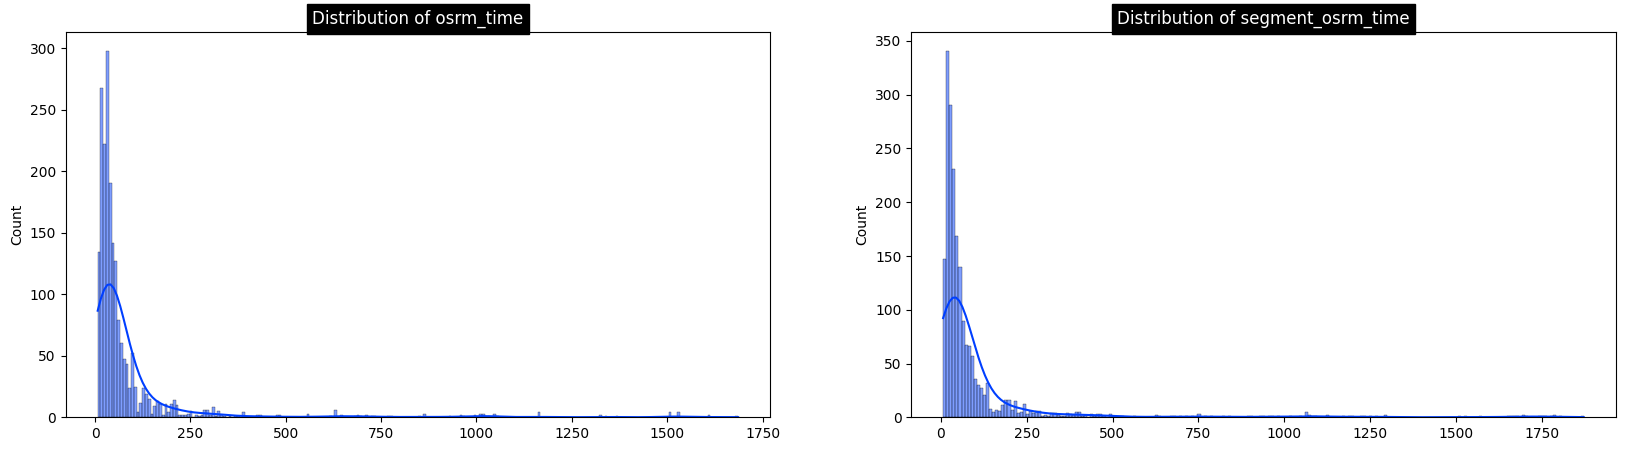

In [ ]:
check_visual_normality(osrm_time_sample,segment_osrm_time_sample,'osrm_time','segment_osrm_time')

BoxCox Transform Data

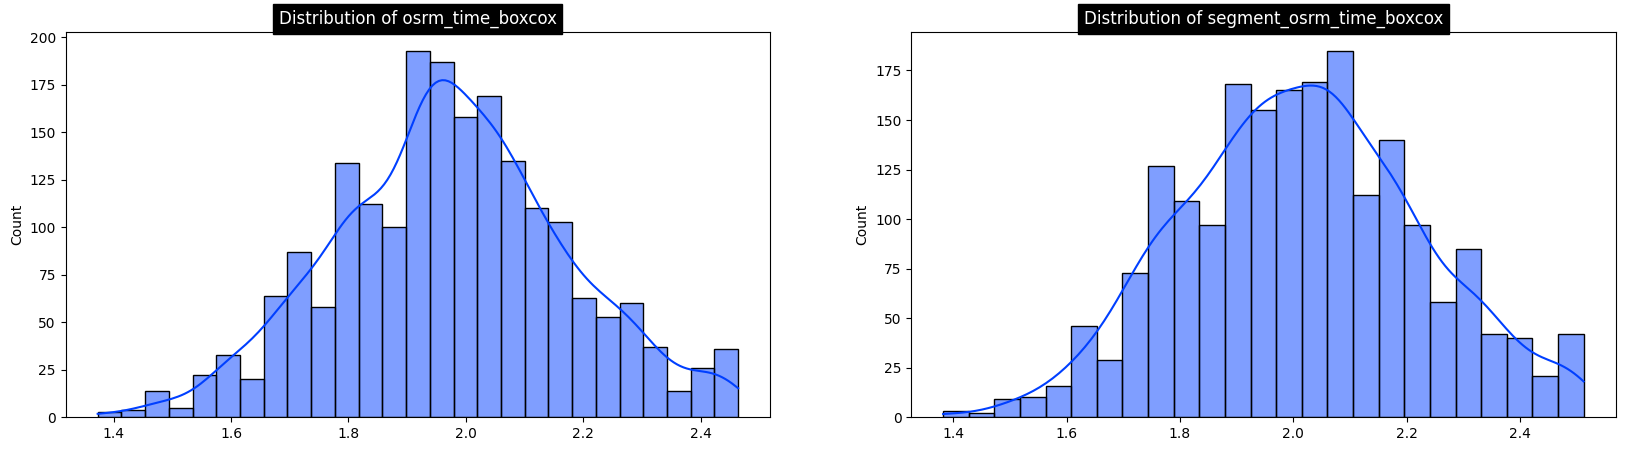

In [ ]:
check_visual_normality(osrm_time_sample_boxcox[0],segment_osrm_time_sample_boxcox[0],'osrm_time_boxcox','segment_osrm_time_boxcox')

Both the osrm_time and segment_osrm_time does not look like normal distribution before and but looks alike following normal distribution after boxcox transformation.

#### Statistical Check

In [ ]:
check_shapiro(osrm_time_sample,'osrm_time')
check_shapiro(segment_osrm_time_sample,'segment_osrm_time')
check_shapiro(osrm_time_sample_boxcox[0],'osrm_time_boxcox')
check_shapiro(segment_osrm_time_sample_boxcox[0],'segment_osrm_time_boxcox')

____________________________________________________________________________________________________
Normality test for osrm_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for osrm_time is 0.37542035068208934 and with p-value of 1.0599691274992673e-63
With morethan 95% Confidence, Rejecting Null Hypothesis
osrm_time does not follow normal distribution
____________________________________________________________________________________________________
Normality test for segment_osrm_time
****************************************
H0: {i} follows normal Distribution
H1: {i} does not follows normal Distribution
****************************************
The test statistic for segment_osrm_time is 0.38170391403026516 and with p-value of 1.635189759931948e-63
With morethan 95% Confidence, Rejecting Null Hypothesis
segment_osrm_time does not follow normal di

**Even with morethan 95% confidence it is proven that none of the data follow normal distribution even before and after boxcox transformation.**

### 2. Variance Check

#### Visual Check

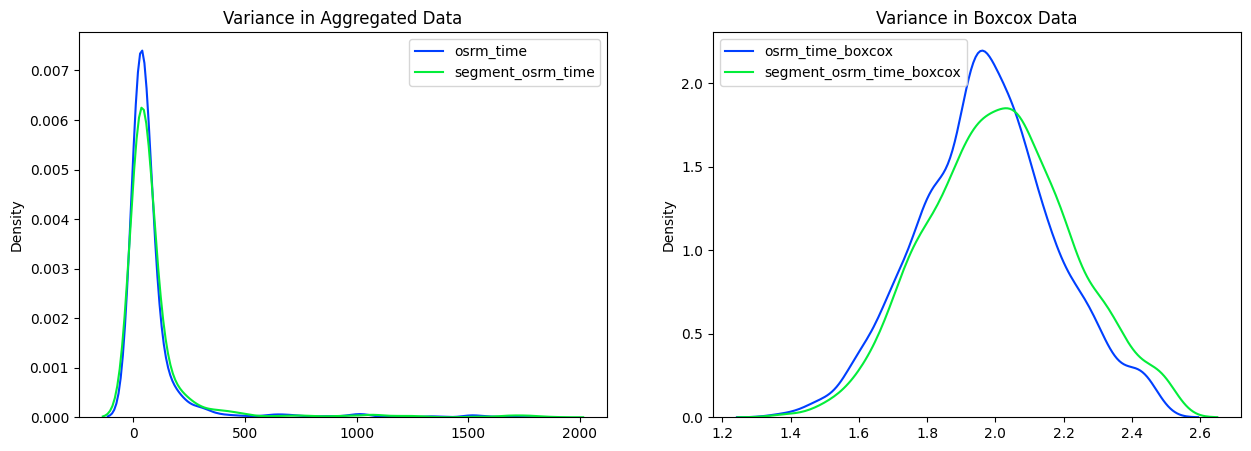

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Variance in Aggregated Data')
check_visual_variance(osrm_time_sample,segment_osrm_time_sample,'osrm_time','segment_osrm_time')
plt.subplot(1,2,2)
plt.title('Variance in Boxcox Data')
check_visual_variance(osrm_time_sample_boxcox[0],segment_osrm_time_sample_boxcox[0],'osrm_time_boxcox','segment_osrm_time_boxcox')
plt.show()

* The columns in aggregated looks like to have equal variance and boxcox data looks likes does not have equal variance.

#### Statistical Check

In [ ]:
check_levene(osrm_time_sample,segment_osrm_time_sample,'osrm_time','segment_osrm_time')
check_levene(osrm_time_sample_boxcox[0],segment_osrm_time_sample_boxcox[0],'osrm_time_boxcox','segment_osrm_time_boxcox')

____________________________________________________________________________________________________
Variance test for osrm_time and segment_osrm_time
****************************************
H0: osrm_time and segment_osrm_time have equal Variance.
H1: osrm_time and segment_osrm_time do not have equal Variance.
****************************************
The test statistic for osrm_time is 4.330896689827372 and with p-value of 0.03749002205587517
With morethan 95% Confidence, Rejecting Null Hypothesis
 osrm_time and segment_osrm_time do not have equal Variance.
____________________________________________________________________________________________________
Variance test for osrm_time_boxcox and segment_osrm_time_boxcox
****************************************
H0: osrm_time_boxcox and segment_osrm_time_boxcox have equal Variance.
H1: osrm_time_boxcox and segment_osrm_time_boxcox do not have equal Variance.
****************************************
The test statistic for osrm_time_boxcox

Hence, it is morethan 95% confident that both the columns do not have equal variance before and after boxcox transformation.

### Final T-Test for independence

Although both assumption are not met by both data.Lets try T-test, then will continue with mannwhitneyu test.

In [ ]:
check_ttest_ind(osrm_time_sample,segment_osrm_time_sample,'osrm_time','segment_osrm_time')
check_ttest_ind(osrm_time_sample_boxcox[0],segment_osrm_time_sample_boxcox[0],'osrm_time_boxcox','segment_osrm_time_boxcox')

____________________________________________________________________________________________________
T- test for osrm_time and segment_osrm_time
****************************************
H0: osrm_time and segment_osrm_time means are equal
H1: osrm_time and segment_osrm_time means are not equal
****************************************
The test statistic for osrm_time is -2.13914112750388 and with p-value of 0.03248464050668145
With morethan 95% Confidence, Rejecting Null Hypothesis
 osrm_time and segment_osrm_time means are not equal.
____________________________________________________________________________________________________
T- test for osrm_time_boxcox and segment_osrm_time_boxcox
****************************************
H0: osrm_time_boxcox and segment_osrm_time_boxcox means are equal
H1: osrm_time_boxcox and segment_osrm_time_boxcox means are not equal
****************************************
The test statistic for osrm_time_boxcox is -6.0376437520115 and with p-value of 1.70

**As data does provide strong evidence of osrm time differs w.r.t segment osrm time, hence we conclude that osrm time and segment osrm time are not equal.**

### Mannwhitneyu Test

In [ ]:
check_mannwhitneyu(osrm_time_sample,segment_osrm_time_sample,'osrm_time','segment_osrm_time')
check_mannwhitneyu(osrm_time_sample_boxcox[0],segment_osrm_time_sample_boxcox[0],'osrm_time_boxcox','segment_osrm_time_boxcox')

____________________________________________________________________________________________________
Mannwhitneyu test for osrm_time and segment_osrm_time
****************************************
H0: osrm_time and segment_osrm_time means are equal
H1: osrm_time and segment_osrm_time means are not equal
****************************************
The test statistic for osrm_time is 1915348.0 and with p-value of 0.020439577252857003
With morethan 95% Confidence, Rejecting Null Hypothesis
 osrm_time and segment_osrm_time means are not equal.
____________________________________________________________________________________________________
Mannwhitneyu test for osrm_time_boxcox and segment_osrm_time_boxcox
****************************************
H0: osrm_time_boxcox and segment_osrm_time_boxcox means are equal
H1: osrm_time_boxcox and segment_osrm_time_boxcox means are not equal
****************************************
The test statistic for osrm_time_boxcox is 1790342.0 and with p-value o

**Hence Delivery time in osrm and segment osrm time are not equal.**

# **Insights and Recommendation**

## *Insights*

### EDA Summary and Insights

#### 1. **Timeframe and Trip Distribution**
   - The dataset spans from **September 12, 2018, to October 8, 2018** (26 days).
   - A significant majority (**88%**) of the trips occurred in **October**, with the remaining trips in **September**. This concentration suggests a possible increase in demand during October, potentially driven by seasonal factors, promotional periods, or business cycles.
   - The data exhibits a **right-skewed distribution**, indicating that the majority of trips are short in duration or distance, with a few long-duration or long-distance outliers.
   - **Trip Distribution Across the Month**:
     - **Start and end of the month** show lower trip volumes compared to mid-month, though the difference is not drastic.
     - **Anomaly**: No trips occurred between **4th and 11th** of the month, which stands out as unusual. This gap requires further investigation, as it could be due to operational issues, customer behavior, or other external factors influencing trip generation during this period.
     
     **Recommendation**: Investigate the reasons for the lack of trips between the 4th and 11th, as understanding the root cause can help optimize trip scheduling, increase demand in these periods, and avoid potential operational inefficiencies.

#### 2. **Feature Correlation and Data Distribution**
   - **Positive Correlation**: The majority of features show **strong positive correlations**, which is expected in logistics data. For instance, variables like **trip distance, duration, route type**, and **source/destination locations** are naturally related.
   - **Right-skewed Distribution**: This implies the presence of extreme outliers, possibly in **trip distance** or **delivery time**. These outliers may represent rare, long-distance trips or delays, which need to be accounted for when modeling.

   - **Recommendation**: Consider addressing outliers using techniques like **log transformation** or **robust scaling** to make the data more suitable for modeling.

#### 3. **Route Type Insights**
   - A large proportion of shipments are routed via **Full Truck Load (FTL)** rather than smaller carting shipments. This indicates a preference for larger, more consolidated shipments.
   - **FTL vs. Carting**: The predominance of FTL routes suggests potential efficiencies in terms of cost and time, as FTL is typically more efficient for large shipments.

   - **Recommendation**: Further promote the use of **FTL route handling** to increase operational efficiency. Strategies like **incentivizing FTL shipments**, optimizing routes, and utilizing **backhaul opportunities** could help further increase the share of FTL shipments.

#### 4. **Geographical Insights**
   - **Busiest Source States**: **Tamil Nadu, Haryana, Maharashtra, and Karnataka** emerge as the top source states, indicating high demand and significant logistics activities originating from these regions.
   - **Busiest Source Cities**: **Gurgaon**, **Bangalore**, and **Bhiwandi** are identified as the most active source cities.
   - **Busiest Destination Cities**: **Gurgaon**, **Mumbai**, **Bangalore**, and **Hyderabad** are also the busiest destination cities.
   - **Busiest Corridor**: The **Mumbai (Maharashtra)** to **Bangalore (Karnataka)** corridor is the most traveled route, suggesting a high demand for shipments along this corridor.

   - **Recommendation**: Focus on **optimizing routes** and **operations** for these key corridors and cities to improve delivery times and reduce costs. Special attention should be given to **high-traffic corridors** like Mumbai to Bangalore, ensuring that these routes are well-maintained and efficient.

#### 5. **Delivery Time and Distance Accuracy**
   - **OSRM Time vs. Actual Time**:
     - The **OSRM estimated delivery time** is consistently lower than the **actual delivery time**, suggesting that the routing software might be **optimistic** in its time estimates. This could be due to ignoring real-world factors like traffic, weather, or road conditions.
   - **OSRM Distance vs. Actual Distance**:
     - The **OSRM estimated distance** is generally higher than the actual distance, which may indicate that OSRM is overestimating the distances, potentially leading to inefficient route planning and unnecessary fuel consumption.

   - **Recommendation**:
     - Re-evaluate the **OSRM routing algorithm** to ensure more accurate time and distance estimations, incorporating **real-world conditions** into the model.
     - Consider **calibrating OSRM parameters** using historical data to improve prediction accuracy, particularly with respect to **delivery times**.
   
#### 6. **Segment-wise Analysis**
   - **Segment-wise Time Consistency**: The mean values of **actual time** and **segment actual time** are nearly identical, suggesting that the time taken for each segment of the journey is relatively consistent and predictable.
   - **Segment-wise Distance Consistency**: Similarly, the **mean segment OSRM distance** is consistently greater than the mean of the **overall OSRM distance**, suggesting that OSRM might be more conservative in its distance estimates for individual segments.

   - **Recommendation**: Use the **segment-wise data** to further optimize individual parts of the delivery process. Analyzing the segments separately can help identify opportunities to shorten trip durations or reduce unnecessary distances, especially in high-traffic areas.

#### 7. **Key Areas for Further Exploration**
   - **Gap in Trip Data (4th-11th)**: Investigate the underlying cause of the **no trips between the 4th and 11th** of the month, as understanding the root cause can help improve logistics operations and increase demand during this period.
   - **Promoting FTL Shipments**: Since a large proportion of trips are handled via FTL, consider ways to further optimize FTL capacity. This might include:
     - **Dynamic pricing** to encourage more FTL shipments.
     - **Optimizing the backhaul routes** to ensure that FTL shipments are fully utilized.
     - **Targeting key customers** in high-demand regions (e.g., Haryana, Maharashtra) with offers tailored to FTL shipments.

   - **Recommendation**: Focus on **capturing more trips during the gap periods** and **optimizing FTL operations** to further drive cost efficiencies and improve delivery speed.

### Conclusion
This exploratory data analysis reveals valuable insights into the logistics network, including the geographical focus, route types, and time accuracy issues. The most pressing areas for improvement are the unusual gap in trips during the 4th-11th of the month, enhancing the accuracy of OSRM time and distance predictions, and optimizing FTL route handling. Further detailed analysis, including operational investigations, can help address these areas and improve overall efficiency.

## *Recommendations*

---

#### 1. **Route Optimization**
   - **Karnataka Focus**: As the **busiest state route** is within **Karnataka**, optimizing the transportation network in this region is crucial for improving efficiency and reducing congestion.
     - **Recommendation**: Implement **route optimization algorithms** to identify the most efficient paths, considering factors like road conditions, traffic, and delivery windows.
     - **Real-Time Traffic Monitoring**: Integrating real-time traffic data into route planning could significantly reduce delays, especially in high-traffic regions like **Bangalore**.
   
   - **City-Specific Strategy (Gurgaon & Bangalore)**:
     - Both **Gurgaon** and **Bangalore** are identified as **high-traffic cities**, contributing significantly to the volume of shipments.
     - **Recommendation**: Develop tailored **city-specific strategies** to manage the dense traffic. This could involve creating **dedicated delivery windows**, working with local authorities to reduce congestion, or setting up **regional hubs** to streamline deliveries in these cities.

---

#### 2. **Operational Efficiency**
   - **Adjusting Delivery Time Expectations**:
     - The analysis indicates that **OSRM time** tends to be optimistic, with actual delivery time being consistently higher.
     - **Recommendation**: Use this insight to set **more realistic delivery time expectations** for customers. Provide transparency in estimated vs. actual delivery times, which will improve customer trust and satisfaction.
   
   - **Optimizing Distance Estimates**:
     - The **OSRM distance** is typically higher than the **actual distance**, suggesting overestimations in logistics planning.
     - **Recommendation**: Adjust **distance estimations** to be more reflective of actual distances, which can lead to better fuel and route optimization. This could also improve **cost efficiency** in fuel consumption and time allocation.
   
   - **Segment-Specific Route Planning**:
     - The mean of **segment OSRM distance** is greater than the **overall OSRM distance**, indicating that individual segments are being overestimated.
     - **Recommendation**: Use the **actual distance data** and **segment-wise performance** to **fine-tune route planning** for each delivery stage. By optimizing these smaller segments, businesses can enhance operational efficiency at a granular level, reducing travel time and unnecessary detours.
   
   - **Advanced Demand Forecasting**:
     - **Peak travel times** and **congestion during certain hours** could significantly affect delivery timelines.
     - **Recommendation**: Implement **advanced demand forecasting** techniques (e.g., time series analysis or machine learning models) to anticipate **peak times** and adjust transportation services. This proactive approach will allow for better resource allocation, reduce operational bottlenecks, and avoid congestion during peak hours.

---

#### 3. **Customer Satisfaction**
   - **Accuracy in Delivery Time Estimates**:
     - Improving the accuracy of delivery time and distance estimates will directly contribute to **increased customer satisfaction**.
     - **Recommendation**: Enhance your **delivery time predictions** using a combination of **historical data** and **real-time traffic monitoring** to provide more accurate ETAs. Customers will appreciate transparency and reliability in delivery schedules.
   
   - **FTL Shipments & Speed**:
     - **FTL shipments** tend to offer **faster delivery times**, which is a key factor in customer satisfaction.
     - **Recommendation**: **Promote FTL routes** for faster delivery, as customers typically prefer **timely deliveries**. Consider offering incentives or discounts for FTL options to encourage their use, especially in busy corridors.

   - **Customer Profiling**:
     - A key insight from the analysis is that the majority of orders come from **Maharashtra**, **Karnataka**, **Haryana**, **Tamil Nadu**, and **Uttar Pradesh**.
     - **Recommendation**: Conduct **customer profiling** to better understand the preferences, purchasing behaviors, and delivery expectations in these states. This can help tailor logistics operations, marketing strategies, and customer service approaches to specific regions, ultimately improving the customer experience.
   
   - **Customer Experience Improvements**:
     - **Recommendation**: Based on customer profiling, improve delivery times, adjust marketing campaigns, and provide region-specific customer service options (e.g., localized support teams, dedicated delivery slots).

---

#### 4. **Cost Optimization**
   - **Leveraging Accurate Time and Distance Data**:
     - By refining **time and distance estimates**, businesses can better allocate resources, reduce operational costs, and improve overall cost efficiency.
     - **Recommendation**: Use accurate **logistics data** (e.g., actual delivery times and distances) to optimize routes, reduce fuel consumption, and improve driver scheduling, all of which contribute to cost savings.
   
   - **Optimizing FTL Shipments**:
     - Given the preference for FTL shipments, which generally offer better cost efficiencies for large deliveries:
     - **Recommendation**: Consider strategies to further optimize FTL loads (e.g., maximize capacity per truck, minimize empty backhauls) to reduce transportation costs. Additionally, offering **dynamic pricing** based on demand and capacity could help maximize FTL utilization and improve profitability.

---

#### 5. **Strategic Decision-Making**
   - **FTL vs. Carting Strategy**:
     - The predominance of **FTL** shipments reflects a strategic decision in favor of larger, consolidated shipments over smaller carting deliveries.
     - **Recommendation**: Continuously evaluate the **cost-benefit** of FTL vs. carting. Understanding the operational costs, delivery speed, and customer preferences for each option can guide future strategic decisions and help adapt to changing business needs.

   - **Collaboration with Stakeholders**:
     - Effective route optimization and operational improvements often require collaboration with external stakeholders such as **government authorities**, **local transportation companies**, and **communities**.
     - **Recommendation**: Form partnerships with **transportation companies**, local governments, and **technology providers** to improve traffic management, implement efficient infrastructure, and enhance the overall delivery network. Collaborating with these stakeholders could also help in obtaining **real-time traffic data**, **incentives** for FTL routes, and **regulatory support** for efficient logistics management.

---

### Conclusion
By focusing on route optimization, operational efficiency, customer satisfaction, and cost optimization, businesses can significantly improve logistics performance. The insights derived from the **busiest corridors**, **FTL shipment data**, and **time-distance discrepancies** highlight key areas for strategic improvement. Implementing **advanced forecasting techniques**, refining **logistics planning algorithms**, and **collaborating with key stakeholders** will not only streamline operations but also enhance customer satisfaction and reduce operational costs in the long run.